# 01-05 : Combine the Chatbot Classifications

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Markdown

## DuckDB Configuration

_reference: https://duckdb.org/docs/guides/python/jupyter.html_

In [2]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [3]:
%sql duckdb:///:default:

## Data Load

In [4]:
# load the json files into a dataframe
%sql df_source << SELECT * FROM "../../data/interim/01-04_chatbot_classifications/*.json"

# show the data
print(df_source.shape)
display(df_source)

(555, 3)


,chatbot,complaint,meta
0,"{'related': 0, 'evidence': '', 'classification...","{'classification': 'Customer Service', 'servic...","{'id': 3339887, 'created_at': 2021-01-04 11:56..."
1,"{'related': 0, 'evidence': '', 'classification...","{'classification': 'billing', 'service': 'Telk...","{'id': 3341993, 'created_at': 2021-01-05 16:33..."
2,"{'related': 0, 'evidence': '', 'classification...","{'classification': 'Customer Service', 'servic...","{'id': 3342153, 'created_at': 2021-01-05 18:30..."
3,"{'related': 1, 'evidence': 'The customer menti...","{'classification': 'Customer care', 'service':...","{'id': 3344640, 'created_at': 2021-01-07 13:22..."
4,"{'related': 0, 'evidence': '', 'classification...","{'classification': 'Billing', 'service': 'Voda...","{'id': 3345422, 'created_at': 2021-01-08 08:26..."
...,...,...,...
550,"{'related': 1, 'evidence': 'The customer menti...","{'classification': 'Technical', 'service': 'Vo...","{'id': 4517229, 'created_at': 2023-07-18 06:44..."
551,"{'related': 0, 'evidence': '', 'classification...","{'classification': 'Poor Service', 'service': ...","{'id': 4519298, 'created_at': 2023-07-18 21:38..."
552,"{'related': 1, 'evidence': 'The complaint ment...","{'classification': 'Technical issue', 'service...","{'id': 4519459, 'created_at': 2023-07-19 08:06..."
553,"{'related': 1, 'evidence': 'The customer menti...","{'classification': 'Service complaint', 'servi...","{'id': 4522620, 'created_at': 2023-07-20 15:05..."


## Data Preparation

### Normalise the JSON data

In [5]:
df_chatbot = pd.json_normalize(df_source['chatbot'])
df_complaint = pd.json_normalize(df_source['complaint'])
df_meta = pd.json_normalize(df_source['meta'])

# display the result
display(df_chatbot.head())
display(df_complaint.head())
display(df_meta.head())

,related,evidence,classification,description,suggestion
0,0,,,,
1,0,,,,
2,0,,,,
3,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...
4,0,,,,


,classification,service,description,suggestion
0,Customer Service,Call Center,The customer missed a debit order and made arr...,Vodacom should improve their customer service ...
1,billing,Telkom,Billed on the cancelled contract,Refund the customer and improve customer service
2,Customer Service,Vodacom,Vodacom - A dishonest company. I have been try...,Vodacom should assign a dedicated agent with t...
3,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
4,Billing,Vodacom,Customer received a bill for a data contract t...,Investigate the contract cancellation and bill...


,id,created_at,review_rating,review_title,review_content,business_slug
0,3339887,2021-01-04 11:56:13,1,The worst customer care and call center,I missed a debit order in December and made ar...,vodacom
1,3341993,2021-01-05 16:33:36,1,billed on the cancelled contract,Good day\nI have been calling Telkom from Octo...,telkom
2,3342153,2021-01-05 18:30:46,1,Vodacom's dishonesty,Vadacom -A dishonest company. I have been tryi...,vodacom
3,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom
4,3345422,2021-01-08 08:26:08,1,Vodacom Billing For Non Service,After spending my morning being passed from on...,vodacom


### Combine The Dataframes

In [6]:
# get the original complaint data
df_classifications = df_meta.copy()

# combine the chatbot classifications
df_classifications = df_classifications.join(df_chatbot.add_prefix('chatbot_'), how='left')

# combine the complaint classifications
df_classifications = df_classifications.join(df_complaint.add_prefix('complaint_'), how='left')

# display the results
print(df_classifications.shape)
df_classifications.head()

(555, 15)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion
0,3339887,2021-01-04 11:56:13,1,The worst customer care and call center,I missed a debit order in December and made ar...,vodacom,0,,,,,Customer Service,Call Center,The customer missed a debit order and made arr...,Vodacom should improve their customer service ...
1,3341993,2021-01-05 16:33:36,1,billed on the cancelled contract,Good day\nI have been calling Telkom from Octo...,telkom,0,,,,,billing,Telkom,Billed on the cancelled contract,Refund the customer and improve customer service
2,3342153,2021-01-05 18:30:46,1,Vodacom's dishonesty,Vadacom -A dishonest company. I have been tryi...,vodacom,0,,,,,Customer Service,Vodacom,Vodacom - A dishonest company. I have been try...,Vodacom should assign a dedicated agent with t...
3,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
4,3345422,2021-01-08 08:26:08,1,Vodacom Billing For Non Service,After spending my morning being passed from on...,vodacom,0,,,,,Billing,Vodacom,Customer received a bill for a data contract t...,Investigate the contract cancellation and bill...


In [7]:
# show the current schema
df_classifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        555 non-null    int64         
 1   created_at                555 non-null    datetime64[ns]
 2   review_rating             555 non-null    int64         
 3   review_title              555 non-null    object        
 4   review_content            555 non-null    object        
 5   business_slug             555 non-null    object        
 6   chatbot_related           555 non-null    int64         
 7   chatbot_evidence          543 non-null    object        
 8   chatbot_classification    543 non-null    object        
 9   chatbot_description       543 non-null    object        
 10  chatbot_suggestion        543 non-null    object        
 11  complaint_classification  555 non-null    object        
 12  complaint_service     

### Filter Classifications

In [8]:
# select only chatbot related reviews
df_chatbot_classifications = df_classifications[df_classifications['chatbot_related'] == 1]

# display the results
print(df_chatbot_classifications.shape)
display(df_chatbot_classifications.head())

(235, 15)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion
3,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
5,3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...
11,3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...
12,3358601,2021-01-20 06:28:13,1,"Vodacom not assisting customers, but extorting...","I have many complaints, but will highlight the...",vodacom,1,The complaint mentions the chatbot as being da...,Ineffective chatbot,The chatbot does not provide helpful assistanc...,Improve the chatbot's ability to provide accur...,Poor customer service,Vodacom,The customer is unable to contact Vodacom due ...,Resolve the issue of phone locking and improve...
15,3367621,2021-01-27 10:41:25,1,Missing airtime/No customer service,My airtime just went missing. Failed to purcha...,vodacom,1,The complaint mentions a bot system which does...,Technical issue,The customer is complaining about the non-func...,Improve the bot system to ensure it is functio...,Service issue,Vodacom,"The customer's airtime went missing, failed to...",Provide better customer service support and fi...


In [9]:
# save the classifications
df_chatbot_classifications.to_parquet('../../data/interim/01-05_chatbot_classifications.parquet.gz', compression='gzip')

## Exploratory Data Analysis

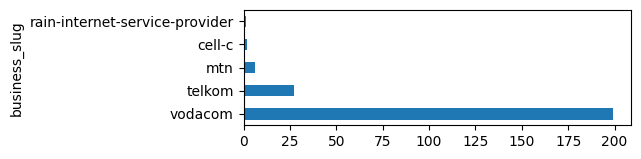

In [10]:
df_chatbot_classifications.business_slug.value_counts().plot(kind='barh', figsize=(5, 1.5))
plt.show()

### Complaint Trend

In [11]:
df_grouped = df_chatbot_classifications \
    .groupby('business_slug') \
    .resample('M', on='created_at') \
    .count()['id'].rename('count') \
    .reset_index() 

display(df_grouped.head(3))

,business_slug,created_at,count
0,cell-c,2022-07-31,1
1,cell-c,2022-08-31,0
2,cell-c,2022-09-30,0


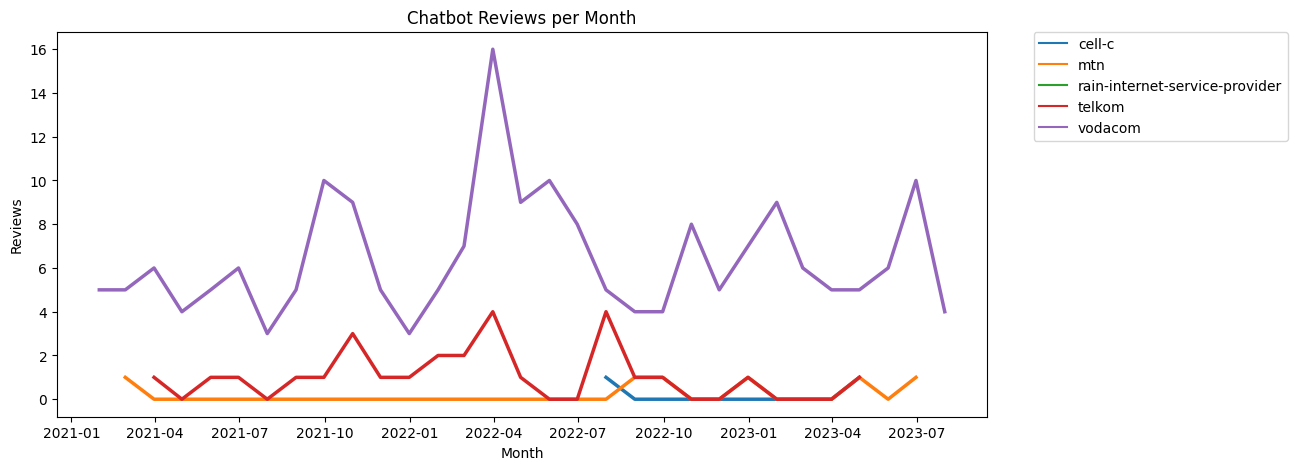

In [12]:
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=df_grouped,
    x='created_at',
    y='count',
    hue='business_slug',
    linewidth=2.5).set(
        title='Chatbot Reviews per Month',
        xlabel='Month',
        ylabel='Reviews')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Examine Chatbot Reviews

### Functions

In [13]:
# Initialize an empty list to store the lines of markdown
_markdown_lines = []

def mprint(text):
    global _markdown_lines
    _markdown_lines.append(text)

def mflush():
    global _markdown_lines
    markdown_string = "\n".join(_markdown_lines)
    display(Markdown(markdown_string))
    # Clear the lines after displaying the markdown
    _markdown_lines = []

def mclear():
    global _markdown_lines
    _markdown_lines = []

### Markdown Report

In [31]:
mprint('### Chatbot Reviews')

mprint('| Date | Business | Title | Content | Classification | Description | Chatbot Suggestion | Related Service | Complaint Summary | Complaint Suggestion |')
mprint('| ---- | -------- | ----- | ------- | -------------- | ----------- | ------------------ | --------------- | ----------------- | -------------------- |')

for index, row in df_chatbot_classifications.sort_values(by='created_at', ascending=False).iterrows():
    review_title = row['review_title'].replace('|', ';').replace('\n', '<br />')
    review_content = row['review_content'].replace('|', ';').replace('\n', '<br />')


    mprint(f"| {row['created_at']} \
             | {row['business_slug'][:7]} \
             | {review_title} | {review_content} \
             | {row['chatbot_classification']} \
             | {row['chatbot_description']} \
             | {row['chatbot_suggestion']} \
             | {row['complaint_service']} \
             | {row['complaint_description']} \
             | {row['complaint_suggestion']} \
             |")

mflush()

### Chatbot Reviews
| Date | Business | Title | Content | Classification | Description | Chatbot Suggestion | Related Service | Complaint Summary | Complaint Suggestion |
| ---- | -------- | ----- | ------- | -------------- | ----------- | ------------------ | --------------- | ----------------- | -------------------- |
| 2023-07-20 15:05:44              | vodacom              | Tired of speaking to TOBI, we need humans | I bought WhatsApp bundles for R35 on the 13th July 2023, which have not been allocated till today the 20th, but i was rewarded with 3.5 Vodabucks. On the 14th I called customer service but was referred to TOBI the BOT, of which it was hard for TOBI to understand because he is an Automated Machine, I then asked to speak to a human, with no success. Sent an email to customer care, got a reference but no call back. I went to Sandton branch, but they could not help me because I bought the data online via capitec app. Can we please speak to humans, its really tiring not being able to express yourself. Kindly serve your customers well, this is really frustrating.              | Customer dissatisfaction with chatbot              | The customer is tired of speaking to TOBI the BOT and wants to speak to a human.              | Improve the chatbot's ability to understand customer queries and provide an option for customers to speak to a human when needed.              | WhatsApp bundles              | The customer bought WhatsApp bundles but they have not been allocated. They received Vodabucks instead.              | Allocate the purchased WhatsApp bundles to the customer's account and provide a refund or compensation for the inconvenience caused.              |
| 2023-07-19 08:06:30              | vodacom              | USELESS options and even more useless "BOT" to try and solve your problem!!! | Their webmail7 Suddenly doesn't work anymore. When you want to enter through their vodacom site and can't remember your password as you haven't use it for YEARS, they send you a password reset or something to your email adress BUT YOUR EMAIL DOESN'T WORK, so how on earth do you access it? When you phone their customer number, ANY OPTION YOU CHOOSE SEND YOU TO THEIR USELESS ROBOT and when you want to talk to an agent, you must register a certain voice notification **** and say a specific sentence.  Well I've said that sentence FOUR times and every time I say it, it was wrong? I said it slow, I said it normal and even word for word, but nothing works. SO HOW DO YOU GET TO TALK TO AN AGENT AND NOT THEIR USELESS ROBOT WHICH DOESN'T HAVE THE OPTION WHICH YOU ARE LOOKING FOR?              | Customer service              | The customer is complaining about the inability to talk to a human agent and the frustration with the chatbot              | Improve the chatbot's recognition of voice notifications and provide a direct option to talk to a human agent              | Webmail7              | The customer is unable to access their email through the Vodacom site and cannot reset their password              | Fix the issue with the email service and provide alternative methods for password reset              |
| 2023-07-18 06:44:51              | vodacom              | Vodacom eSim | I got myself an iPhone and someone told me about the esim to avoid carrying 2 phones. I called Vodacom Westgate to findout how it works and I was told I need to contact customer service or come to the shop if it fails. I called 082135 but couldn't get to speak to the consultant to get assistance. Everything was a bot that couldn't understand my needs. I then went to the shop where a gentleman tried to help me. He got the QR printed and everything done but nothing worked. I paid and everything then his colleague came and said I must leave everything will work after 4 hours. It is now more than 12 hours and I'm still getting errors when I scan the QR code. I'm employed and I can't return to the shop cos they also do not seem to understand this process. Can't call Vodacom cos I will be directed to the bot hence I came here for help.              | Customer service              | The customer had difficulty getting assistance from the chatbot and had to go to the shop for help with their eSim activation.              | Improve the chatbot's ability to understand customer needs and provide appropriate assistance for eSim activation.              | Vodacom eSim              | The customer tried to activate their eSim but encountered errors after following the instructions provided by the shop. They are unable to get further assistance from Vodacom.              | Provide better support for eSim activation, including improved instructions and accessible customer service.              |
| 2023-07-16 14:28:00              | vodacom              | VODACOMS TOBI IS USELESS | Vodacom had decided to go automated and created their Chatbot Tobi.  What a useless piece of technology.  I would like to rather speak to a human and not some computer.  I had a problem with my phone and after going through the whole answer system, instead of getting an agent to help me, I am routed to Tobi.  Again we go through a whole lot of questions.  Then Tobi tell me that he is unable to help me and asks if I would like to speak to an agent.  I confirm with a "yes" and Tobi responds with "you have chosen the self help option".  Totally not what I have chosen and we start again.  Because choosing to speak to an Agent previously haven't helped, I now chose not to speak to an Agent.  Thinking that maybe Tobi is a bit confused.  So I say "no".  To which Tobi replies "I am unable to help you at this stage.  Goodbye".  Frustrating to no measure.  Vodacom, if you are going to go the automated route, make sure it actually works. GRRRR!!!!!              | ineffective              | The customer had a frustrating experience with Vodacom's chatbot Tobi              | Improve the functionality and accuracy of the chatbot to provide better assistance              | Vodacom              | The customer is complaining about the ineffective assistance provided by Vodacom's chatbot Tobi              | Ensure that customers have the option to speak to a human agent when the chatbot is unable to assist              |
| 2023-06-30 23:15:55              | vodacom              | PATHETIC SERVICE | Can SOMEONE please get hold of me urgently via email & not reply to me via a BOT! Check my initial email dated 7 May 2023 to ***********. Downgrade my account to my R66 package & refund my 3 months IMMEDIATELY!!! 3 July will be my 4th month of being debited incorrectly because some *********** vodacom sales reps can't do their job properly!!! You can NEVER get hold of a PERSON when phoning in! Your robot system is BEYOND PATHETIC!!!              | Customer Service              | The customer is complaining about the chatbot and the inability to reach a person when calling in.              | Improve the robot system and ensure that customers can easily reach a person for assistance.              | Vodacom              | The customer is frustrated with the incorrect debiting of their account and the inability to reach a person for assistance.              | Contact the customer via email, downgrade their account to the correct package, and refund the incorrect debits immediately.              |
| 2023-06-22 16:41:12              | vodacom              | Bad bad service | A very useless call center, talking to a robot. Am not happy at, they opened some contract under my current contract without my permission. I only see with debit order going off that am paying double              | Customer service              | The customer is unhappy with the call center and the interaction with a chatbot              | Improve the chatbot's ability to handle customer inquiries and provide better customer service              | Call center              | The customer's contract was opened without permission and they are being charged double              | Investigate and resolve the issue with the double billing and ensure customer contracts are not opened without permission              |
| 2023-06-22 07:33:15              | mtn              | Appalling service | MTN, in my experience, has to rate as probably the very worst service provider I have ever had the misfortune to deal with, and right up there with Telkom and ADT. Without going into specifics, because it would take too long, MTN, for me, incorporates huge difficulty in speaking to a human to start with, then it is almost impossible to speak to the right human amongst calls being misdirected, those on the receiving end having conflicting information or supplying no information, and then, after applying tenacity of an almost impossible degree, amongst dropped calls, to be told that someone would definitely come back to me as the problem has been escalated, and then deathly silence. Let's go 135 again and set aside a day, I say. After three hours I valiantly admit defeat. You win, MTN. I need to now extricate myself from a debit order and change service providers which should take possibly another two or three days of effort. However, MTN, you will receive the very worst feedback from me to everyone I know, unfortunately. I have no doubt that this email will either be ignored or I will get an AI bot asking me for my name and number and to explain my problem.              | Customer service              | The customer is complaining about the difficulty in speaking to a human and receiving conflicting or no information              | Improve the customer service by ensuring that calls are properly directed and that accurate information is provided to customers              | MTN              | The customer describes MTN as one of the worst service providers they have dealt with, mentioning difficulty in speaking to a human, misdirected calls, conflicting information, and lack of follow-up              | Address the customer's specific issues and improve the overall service quality to prevent similar complaints in the future              |
| 2023-06-20 19:48:36              | vodacom              | VODACOM AGAIN | Vodacom deducted unauthorised debit orders, which I reversed. Obviously. I however immediately entered into a payment arrangement via their TOBI bot on Whatsapp (screenshots will confirm same). Today I was service blocked despite such payment arrangement because to no surprise the payment arrangement through the bot does not reflect on their system. What is the use of the bot or the payment arrangement then? The 2nd time in as many weeks that I had absolutely horrific service from vodacom and I am seriously contemplating terminating my relationship with them! Making calls is an integral part of my day to day work duties, which now came to a halt.              | Customer service              | The customer entered into a payment arrangement via the TOBI bot, but it did not reflect on Vodacom's system              | Improve the integration between the TOBI bot and the payment system to ensure accurate and up-to-date information              | Vodacom              | Vodacom deducted unauthorised debit orders and despite entering into a payment arrangement via the TOBI bot, the customer was still service blocked              | Ensure that payment arrangements made through the TOBI bot are properly reflected on the system to avoid service disruptions              |
| 2023-06-13 11:36:47              | vodacom              | Cash Purchase on the Vodacom E Store | I purchased a cellphone on the E Shop. I did not like the model and wanted to return it within the 7 day cooling off period. No one in the call center can help me return the cellphone yet they offer the service only to contract clients. I went to a Vodacom4u and no one can help there either. I tried the Chatbot and Samantha Sinegugu McHunu was supposed to be assisting me however there is no reply from her after explaining my situation. This has has to be the worst service i have received from them in all the year i have been with Vodacom.              | Customer service              | The customer complained about not receiving a reply from the chatbot after explaining their situation.              | Improve the chatbot's responsiveness and ensure that customers receive timely assistance.              | Vodacom E Store              | The customer purchased a cellphone on the E Shop but wanted to return it within the 7-day cooling off period. However, they were unable to get assistance from the call center or Vodacom4u.              | Provide return services for cash purchases on the E Store and ensure that all customer queries are addressed promptly.              |
| 2023-06-08 15:16:50              | vodacom              | Terrible service at Vodacom. | I was phoned and offered  a new contract with more data. I accepted and thid was  to start on 1st June 2023.   Since 1st June, I have not been able to usa or access any data.   My account says I have 20Gb available. It is absolutely impossible to speak to any human at Vodacom. They just say " high call volumes", and put you through to their stupid chatbot that is useless.              | Complaint about chatbot functionality              | The customer is complaining about the chatbot being useless and not able to provide assistance.              | Improve the chatbot's functionality and ability to assist customers.              | Vodacom              | The customer received terrible service from Vodacom. They were offered a new contract with more data, but since the start date, they have not been able to use or access any data. The customer is unable to speak to a human representative and is directed to a chatbot.              | Resolve the issue with the customer's data access and improve customer service by providing better access to human representatives.              |
| 2023-06-08 13:37:55              | vodacom              | VODACOM AVOIDS CONSUMER QUERIES BY USING ROBOTS TO ANSWER CALLS... | Vodacom is unbelievably unavailable when customers have queries. These bots that answer their phones are just a barrier that they are creating to rip people off. I'm trying to get an itemized bill for my vodacom account because they are billing me almost twice the amount that I signed up for. So yes I paid but I sent an email with clarity seeking questions more than a week ago, to date they have not rep****. I'm trying to call their customer care line and it's only bots that answer the phone and there's just no call centre agent available because their lines are just "too busy" according to these bots .. Really??? Its laughable. <br /><br />What is it with these network businesses? Its not the first time i experience this, i moved to vodacom thinking that I'd get better service and I'm grossly disappointed, when you're billed more than you signed  up for  there must at least be an explanation. In the absence of an explanation, it is THEFT. You sell a package that the consumer is comfortable to pay then suddenly you bill them for twice this amount, when they seek an explanation you are simply nowhere to be found. When Vodacom sells you products, they don't send bots to talk to you but when a client wants to query a bill, they have bots on the line. This is unacceptable. If this persists, we will have to establish an online campaign against vodacom on all social media platforms. Consumers cannot continue to be ********** like this! It's not right.              | Customer service              | The customer is complaining about the use of bots to answer calls and the lack of availability of customer care agents              | Improve availability of customer care agents and provide a more efficient way for customers to get assistance              | Vodacom              | The customer is complaining about being billed almost twice the amount they signed up for and the lack of response to their email              | Provide an explanation for the increased billing and improve response time to customer queries              |
| 2023-06-08 11:27:24              | vodacom              | WHY VODACOM? | Why do our call charges go up and up, when we have to battle to talk to a robot when we have a problem with using Vodacom???? On what is Vodacom spending the money on because they cannot afford real people anymore? Cheap ROBOT, but they can't support the real people with jobs who support them?              | Customer service              | The customer is complaining about the use of a chatbot instead of real people for customer support.              | Improve the chatbot by making it more efficient and effective in resolving customer issues, or consider providing the option for customers to speak with a real person if needed.              | Vodacom              | The customer is unhappy with the call charges increasing and the use of a chatbot for customer support.              | Invest in improving customer service by providing better call charge plans and ensuring availability of real people for customer support.              |
| 2023-06-07 20:39:22              | vodacom              | Content service activated | Content services was activated on the number while we blocked all on the app. As a result have been loosing airtime everyday because of that. The fact that it was bypassed and Vodacom allowed it makes it *****ulent. We want all airtime taken reversed. When sending query to customer care, we are forced to chat to Tobi the robot instead of human. How can you explain the query to a robot? Is it because this is a prepaid number? Please contact my dad and refund him his airtime used for this content service. I deactivate it on the app again as it was definitely active.              | Customer support              | The customer is complaining about being forced to chat with a robot instead of a human              | Improve the customer support system to provide better assistance from human agents              | Content service              | The customer's content service was activated without their consent and they have been losing airtime as a result              | Reverse all airtime charges related to the content service and ensure it is deactivated properly              |
| 2023-06-05 09:53:46              | vodacom              | Impossible service | I phoned Vodacom on Wednesday night to block a line and get an ITC Number. I was promised it would take maximum 24 hours. I still haven't received it, and it's impossible to phone Vodacom from a non-Vodacom sim card, you get a bot and no one to speak to              | Customer service              | The customer is complaining about the inability to speak to a person and the delay in receiving an ITC Number              | Improve the customer service by providing a way for customers to speak to a person and ensure timely resolution of requests              | Vodacom              | The customer is complaining about the delay in receiving an ITC Number and the inability to contact Vodacom from a non-Vodacom sim card              | Resolve the issue by providing the customer with the promised ITC Number and improve accessibility by allowing customers to contact Vodacom from any sim card              |
| 2023-06-02 08:21:15              | vodacom              | Vodacom online deals seem to not be available as advertised? | After spending a lot of time considering her options, my wife app**** for an advertised online deal for a Samsung A34 at R349 per month. After initial vetting etc. a Vodacom agent called her and indicated that she 'did not qualify for that deal' but did qualify for a significantly more expensive deal offering more data etc. for this cellphone. When she indicated that she was not interested in the extra data etc. and would like the advertised deal, the agent offered her a cheaper deal for a lower end phone, which she declined.<br /><br />I phone Vodacom to enquire how it is possible that someone do not qualify for a cheaper deal, but do qualify for a more expensive deal the agent indicated that they will only discuss the matter with my wife.<br /><br />Consequently I sent an email to customer care which came back indicating that I should use the TOBI chat bot to contact them. TOBI could obviously not answer my question.<br /><br />We decided to rather opt for another service provider....              | Customer care              | The customer tried to contact Vodacom customer care through the TOBI chat bot but was unable to get a satisfactory answer.              | Improve the TOBI chat bot to provide better assistance and address customer queries effectively.              | Vodacom online deals              | The customer applied for an advertised online deal for a Samsung A34 at R349 per month but was told that they did not qualify for that deal. They were offered a more expensive deal with additional data, which they declined. When they contacted Vodacom to inquire about the discrepancy, they were told that the matter can only be discussed with the customer directly.              | Ensure that advertised online deals are available as stated and provide transparent eligibility criteria to avoid misleading customers.              |
| 2023-05-31 19:52:52              | vodacom              | Vodacom Horrible Customer Care Service-Deleted Active SImcard | Vodacom had a sim card policy to delete a sim card that is inactive for a period of 120 days. On Sunday, 28th of May 2023, Vodacom deleted my sim card which has been active for the past 6 years and was last active on the 27th of May 2023 at 22:00 loaded with airtime and data of R600-00. I contacted Vodacom Tobi Chatbot, it simply gave me an unhelpful answer. I then contacted the Vodacom customer care line, and the answering machine said "Enter the number you are querying". After I entered the number, it answered: "We can't recognize your number". There was not even an opportunity to talk to an agent. I then contacted Vodacom support on Twitter. The machine on Twitter was as unhelpful as Tobi the Chatbot. The Vodacom support simply said, "The number has been deleted because inactive sim cards are deleted as per Vodacom policy. Then it sends me the link to the Vodacom terms and conditions website. <br />All the numbers which Vodacom provided were just so unhelpful and left me frustrated because I was spending almost R1000-00 every month on Vodacom services. <br />Tobia CHatbot is a horrible Vodacom support and so is their Twitter Support.<br />I can imagine how many sim cards are erroneously deleted by Vodacom and people who forfeit their data and airtime because of such bad customer support.              | Poor customer support              | The customer complained about the unhelpful response from Vodacom Tobi Chatbot.              | Improve the chatbot's ability to provide helpful and accurate responses.              | Vodacom              | The customer's sim card was deleted despite being active and loaded with airtime and data. The customer was unable to reach a live agent through the customer care line or Twitter support.              | Review the sim card deletion policy and improve customer support channels to ensure customers can easily reach live agents for assistance.              |
| 2023-05-24 08:37:56              | vodacom              | Vodabucks is a ****!!!! | Used their App to buy vouchers, my VodaBucks balance got deducted, and I never received my vouchers, speaking to this useless Tobi bot and 082135 has gotten me nowhere unfortunately<br /><br />either refund my balance or send the vouchers please              | Customer support              | The customer is complaining about the chatbot's inability to resolve their issue              | Improve the chatbot's ability to handle customer issues and provide effective solutions              | Vodabucks              | The customer's VodaBucks balance was deducted but they did not receive their vouchers              | Refund the customer's balance or send them the vouchers they purchased              |
| 2023-05-22 05:52:10              | vodacom              | Vodacom *****s data and customer care Toby is useless. Replace my data | Vodacom is useless, and Toby the chatbot is terrible. I bought R120 data and it never provisioned. Instead, I keep getting SMSes saying it's running out in a week's time. It never provisioned. Called their customer care and went from pillar to post with Toby's questions and options.<br /><br />If Vodacom still at all cares for any of their customers, can I please get some assistance? This is unacceptable and it's not the first time. Vodacom is infamous for *****ing people's money. I thought I'd give them another chance to change my mind, what a terrible mistake. <br /><br />Correct this now please.              | Poor performance              | The chatbot Toby is described as terrible              | Improve the performance and effectiveness of the chatbot              | Vodacom              | The customer complains about Vodacom's data not being provisioned and the poor customer care experience with Toby the chatbot              | Resolve the data provisioning issue and improve the customer care service              |
| 2023-05-16 16:25:50              | vodacom              | Vodocom. ***********, not client centric. | Since the 13th May 2023 I am unable to receive calls. I tried contacting the customer support and all I hear is Toby the bot who can not assist with my issues. I tried logging it on the website and I get an error, 'advising oops something went wrong'! You can not get service from Vodocom. ***********, not client centric.              | Customer support              | The customer is complaining about the chatbot not being able to assist with their issues.              | Improve the chatbot's capabilities to handle a wider range of customer issues.              | Vodocom              | The customer is unable to receive calls since May 13th, 2023. They tried contacting customer support but were not able to get assistance. They also encountered an error when trying to log the issue on the website.              | Investigate and resolve the issue causing the customer to be unable to receive calls. Improve the customer support system to provide better assistance to customers.              |
| 2023-05-08 15:18:17              | vodacom              | I HATE BOT'S!!! | ITC reference<br />How am I supposed to get an ITC reference when the bot keeps hanging up on me because I am not phoning from a vodacom number.  <br />Obviously!! I am not phoning from a vodacom number because that phone got ****** !!              | Technical issue              | The chatbot hangs up on the customer when they are not phoning from a Vodacom number              | Improve the chatbot to handle calls from non-Vodacom numbers              | ITC reference              | The customer is unable to get an ITC reference because the chatbot hangs up on them when they are not phoning from a Vodacom number              | Provide alternative methods for customers to obtain an ITC reference, such as through email or a web form              |
| 2023-05-02 13:48:16              | vodacom              | VODACOM  CUSTOMER CARE /  NOT !!! | Frustration with the customer care number, all I  get is the bot, who confidently says thank you and hangs up on me without resolving my issue.  All  morning I have been calling to the same thing.<br /><br />Is  there an option  to talk to someone? for actual assistance?  this bot  a waste of my time , patience and just ruins my day - if this is what Vodacom aims to do , well  then as confidently as the bot say  thank you and well done .              | Customer Care Chatbot              | The customer is frustrated with the chatbot and its inability to resolve their issue              | Improve the chatbot's ability to understand and resolve customer issues              | Vodacom              | The customer is frustrated with the customer care number and the chatbot's inability to assist them              | Provide an option for customers to talk to a human representative for assistance              |
| 2023-04-29 15:40:09              | cell-c              | CAN'T GET ANY HELP FROM CELL C... CAN'T MAKE IT PASS THEIR SECURITY CHECKS | Do we still have human beings working at cell c or is it just robots!! How could you shove a stupid AI security check in my face when I'm  trying to block a lost phone.  <br />So what if I can't remember the address I signed up with... my mistake here was staying with one network for too damn long.  The worst thing is there is no cell c branch I'm my small town so I'm stuck with call centre robots @ this point I'm ready to buy out my contract and go for the SPs with branches near me and won't use security checks that test my memory every time<br /><br />Maybe replace it with a DNA test              | Security Check              | The customer is complaining about the AI security check when trying to block a lost phone              | Improve the AI security check to be more user-friendly and consider alternative methods of verification              | Cell C              | The customer is frustrated with the lack of human assistance and the reliance on call centre robots              | Provide more accessible customer service options, such as branches in smaller towns, to improve customer experience              |
| 2023-04-24 16:27:14              | vodacom              | Unauthorized credit checks | I checked my credit report and Vodacom has made 2 enquires on my profile within 2 months. I have no dealings whatsoever with Vodacom and don't intend in having a cellphone contract with them. It's difficult to get hold of them using their customer care line, I spent almost 40 minutes and there's no option to speak to a human being. The chat bot is the worst I have ever come across.              | Poor performance              | The customer complained about the chatbot's performance.              | Improve the chatbot's performance and usability.              | Vodacom              | The customer checked their credit report and found that Vodacom made 2 unauthorized enquiries on their profile.              | Investigate and resolve the issue of unauthorized credit checks.              |
| 2023-04-13 10:57:02              | telkom              | Horrible service - | I need a copy of my proof of purchase : Why cant this be emailed to me : I must go store to store, an my insurance is with admin plus , this is terrible service<br /><br />I do not wana chat to a bot : whatsapp an facebook : in the real world we speak to real people              | Customer prefers human interaction              | The customer expressed dissatisfaction with chatting to a bot              | Consider providing options for customers to speak to a real person              | Proof of purchase              | The customer is unhappy with the service of not being able to receive proof of purchase via email and having to visit multiple stores              | Improve the process of providing proof of purchase by offering email delivery and streamlining the process              |
| 2023-04-10 06:26:47              | vodacom              | TOBI IS NOT HELPFUL | This thing of calling the call center and you can't speak to someone, Tobi is not helpful.<br />Can I be contacted Please              | Unhelpful Chatbot              | The customer is complaining that Tobi is not helpful.              | Improve Tobi's ability to assist customers.              | Call Center              | The customer is frustrated with not being able to speak to a person at the call center.              | Provide an option for customers to speak to a live representative.              |
| 2023-04-04 11:19:53              | vodacom              | No customer service | I've tried numerous times to speak to an actual call centre agent to change my banking details for my debit order but all I get everytime is the stupid robot prompt for whatsapp who doesn't even have an option to change banking details. I'm gatvol. End of my contract, I'm moving to another cellphone service provider.              | Customer service              | The customer is complaining about not being able to speak to an actual call centre agent              | Improve the chatbot by providing an option to speak to a call centre agent and allow customers to change banking details              | Cellphone service provider              | The customer is frustrated with the lack of customer service and inability to change banking details              | Provide better customer service by ensuring customers can easily reach call centre agents and offer options to change banking details              |
| 2023-04-03 12:18:43              | vodacom              | useless chatbot | Your Automated support desk is utter useless. I upgraded my vodacom contract in February and the new simcard is still offline. Your automated chatbot keeps going into a look asking if I want my latest account statement, or activate CLIP. I want neither. I need the new SIM card to be activated.              | Customer support              | The customer is complaining about the chatbot not being helpful in activating their new SIM card              | Improve the chatbot's ability to handle activation requests and provide better assistance              | Vodacom              | The customer's new SIM card is still offline after upgrading their contract in February              | Activate the customer's new SIM card as soon as possible to resolve the issue              |
| 2023-04-02 20:36:17              | mtn              | Worst Serviec provider in the country - If MTN is your only option get a landline. | Without doubt the worst cell phone service provider in the country. I defy anyone getting anything sorted via their call centre. All I wanted to do do was find out how much data I get on a monthly basis. I tried numerous time using the call desk. After atempting this numerous times I was unable to try this eventually tried the Chat bot and asked how I speak to a human to assist and was told "I cannot help you with this". In desperation phones the ***** line to see if I could get a niumber and got exactly the same options as the 135 Number - sorry for anyone who wishes to report ***** - it appears that MTN does not allow you to do this. <br />ABSOLUTELY SHOCKING!!!!! CALL YOURSELVES A SERVICE PROVIDER? YOU HAVE NO CONCEPT OF SERVICE!!!!!!!!!!!!!              | Customer service              | The customer had a negative experience with the chatbot and was unable to get assistance              | Improve the chatbot's ability to assist customers and provide options to speak to a human              | Cell phone service              | The customer had a negative experience with MTN's call center and was unable to get information about their data usage              | Improve the call center's ability to assist customers and provide accurate information              |
| 2023-04-02 03:53:00              | vodacom              | Vodacom ignores customers | Service has gotten seriously bad over the years I can't even ask a call centre agent for assistance anymore, I tried calling no matter what you try a chatbot is shoved into your face which is of absolutely no help. I tried to cancel a recurring data plan on prepaid number and no matter what I try it won't cancel the staff at the store don't want to hear their customers issues 😡 so who do I turn to must I change networks as Vodacom doesn't care about the customer anymore clearly.              | Customer service              | The customer is complaining about the unhelpfulness of the chatbot              | Improve the chatbot's ability to assist customers              | Vodacom              | The customer is complaining about the bad service and inability to cancel a recurring data plan              | Train call center agents to better assist customers and address their issues              |
| 2023-03-30 12:22:22              | vodacom              | VODACOM CUSTOMER CONTACT CENTRE NOT VERY HELPFUL | Vodacom has invoiced me a larger than usual bill and i have been trying to get hold of soemone from their customer care call centre (082 135) to query this.  I have tried all their prompts. but I either end up being sent to a  "robot" called Tobi who isnt very helpful or the voice prompt tells me that my Vodacom number does not exist. How on earth can my number not exist ?? All i am trying to do is speak to someone (a human, not a robot)to help me explain why my bill is so high. i cannot understand why something so simple is becoming a very hard and frustrating ordeal.              | Customer Service              | The customer is complaining about the unhelpfulness of the chatbot and the difficulty in reaching a human representative.              | Improve the chatbot's ability to understand and address customer queries, and ensure that customers have easy access to human representatives when needed.              | Vodacom Customer Contact Centre              | The customer is complaining about the difficulty in reaching a human representative to query a larger than usual bill.              | Ensure that customers have easy access to human representatives and improve the responsiveness and effectiveness of the customer contact centre.              |
| 2023-03-28 20:08:26              | vodacom              | ***** This Tobias 😒 | Is there a way to speak with an actual customer care agent because this Tobias thing is an idiotic problem that has wasted more than enough of my time.<br /><br />I don't know if my number has been disconnected or if I'm experiencing a network issue but today I needed access to my number but no I was stuck with Tobias who either ends my calls or asks me the same questions over again.<br /><br />Like WTH???              | Ineffective              | The chatbot named Tobias is causing frustration and wasting the customer's time.              | Improve the chatbot's ability to understand and address customer issues.              | Phone service              | The customer is unable to access their number and suspects a network issue or disconnection.              | Investigate and resolve the network issue or disconnection to ensure uninterrupted phone service.              |
| 2023-03-20 11:19:29              | vodacom              | No humans at Vodacom? | I'm trying to contact the Vodacom Repair Centre in<br /><br />4 Russell Street, Mbombela, South Africa<br /><br />Only a robotic IVR answers the phone that is stuck in an infinite loop and it is impossible to speak to a human.              | Customer service              | The complaint is related to the chatbot as the customer is unable to speak to a human.              | Improve the IVR system to allow customers to speak to a human representative.              | Vodacom Repair Centre              | The customer is unable to speak to a human representative at the Vodacom Repair Centre in 4 Russell Street, Mbombela, South Africa.              | Ensure that there are human representatives available to assist customers at the Vodacom Repair Centre.              |
| 2023-03-10 12:06:56              | vodacom              | PM CONNECT..... VODACOM....... | So I get my statement yesterday 9th March and WOW.... You will never guess what... I AM STILL BEING BILLED for PM CONNECT... TO WHICH I NEVER SUBSCRIBED..... Vodacom sorted out the problem for December January..... but STILL I am being billed for 1 Feb to 28 Feb..... WOW. What can I do..... You cannot speak to a human and their BOT service well. whoever put that together..... nuf said...... then the BOT says I am learning...... I don't think so..........              | Customer dissatisfaction              | The customer is unhappy with the chatbot service              | Improve the chatbot's ability to resolve customer issues and provide better customer support              | PM CONNECT              | The customer is being billed for a service they never subscribed to              | Investigate and resolve the billing issue, and ensure that the customer is not charged for services they did not subscribe to              |
| 2023-03-07 11:48:50              | vodacom              | Sim Swap Fraud | I have recieved a sim swap notification on my number yesterday. I imediatly phoned Vodacom customer care and strugled to a point where I eventually got connected to a Agent....well I think it was an Agent. She strugled to understand plain English but I got through to her and she said she reversed the the sim swap and flaged my number for future sim swaps. Then the BOMB. the sim swap went through!!!!!! How the hell did that happen????? I used my daughters phone to phone customer care again as soon as I realized that the network was not down its my number that's not working. Now this is where things get weird. I had the best experience with the Agent that help me this time.....I think his name was Kabelo. He spoke A grade english and helped me with ease. He checked my number but could find no evidence of me phoning in that afternoon( How the hell is that possible?) He assisted in giving me relevant information and reversed the sim swap at the speed of light. Very satisfying service from him. He also flagged my number so that no sim swaps could be done without ID verification. Now I wonder and red flags are flaring up in my head.....This had to be a inside job from vodacom. 1. The sim swap was done using the useless TOBI BOT.<br />2. All the security questions was verrified.<br />3. After reverising the sim swap the first time it was set to still go through.<br />4. No records of me phoning in the first time to do the reversal.<br />5. My bank acount was emptied in the time my number was off and I hold Vodacom pesonnally responsible for this.<br /><br />I remember when I was working for vodacom the Security was very strict on sim swaps. How did Vodacom sink so low as to let a robot do a sim swap?<br /><br />Vodacom realy has to revise their sim swap procedure.              | Sim Swap              | The complaint is about the sim swap process and the use of the chatbot for the sim swap.              | Improve the sim swap procedure and ensure that chatbots are not used for sensitive transactions like sim swaps.              | Vodacom              | The customer experienced a sim swap fraud where their bank account was emptied during the time their number was off. They suspect an inside job from Vodacom.              | Revise the sim swap procedure to enhance security measures and prevent fraud.              |
| 2023-02-28 09:52:02              | vodacom              | Vodacom poor service | For a long time Vodacom had put on my prepaid cellphone a  welcome tone I never had asked for but had to pay for . When I went to my next Vodacom branch at De Ville Centre in Durbanville Central on February 22 at 11.15 the shop assistant was rude and quarrelsome. After some arguing I got him to delete the welcome tone. For my claim to be refunded I was given the Vodacom Customer Care telephone number. On that number I did not find any option for complaints and was talking to their chat bot only.  I still do not know how to get to them for my claim.              | Customer support              | The customer had difficulty finding the option for complaints and was only able to interact with the chatbot              | Improve the chatbot by adding an option for complaints and providing clear instructions on how to reach customer support              | Vodacom              | The customer experienced poor service at the Vodacom branch and had difficulty getting their claim refunded              | Train staff to provide better customer service and ensure that customers have clear channels to address their complaints              |
| 2023-02-19 19:41:16              | vodacom              | Chatbots are just fancy FAQs | Trying to block a stolen phone using Vodacom's Customer Care (082 135) and all I get is a useless Chatbot (Toby) who keeps me in an endless loop of not blacklisting the phone. The service gets to the point of correctly identifying the phones which my sim was used for. But is unable to progress from there. Utterly useless.              | ineffective              | The chatbot (Toby) is unable to blacklist a stolen phone and keeps the customer in an endless loop              | Improve the chatbot's functionality to effectively blacklist stolen phones              | Vodacom's Customer Care (082 135)              | The customer is unable to block a stolen phone using the chatbot and is frustrated with the endless loop              | Provide a more efficient and effective method for customers to block stolen phones              |
| 2023-02-14 13:48:28              | vodacom              | Gatvol! Three calls later and still no resolution on incorrect debit amount! | I recently became a Vodacom customer after having an extremely successful relationship with another service provider. My mistake. After debiting my account correctly the first month, they subsequently doubled my debit amount in the second month. After calling them 3 times - being promised call backs by two agents and having one agent tell me he would transfer my call but dropped the call instead - I am gatvol. I just want my refund! How difficult can this be????? Also, your chatbot is silly - I have a data sim. It sent a pin to the data sim which is in a router. How do I get the pin to verify who I am?????              | Customer support              | The customer complained about the chatbot's inability to assist with verifying their identity.              | Improve the chatbot's functionality to handle situations where a pin needs to be sent to a device other than a mobile phone.              | Vodacom              | The customer is complaining about an incorrect debit amount and the lack of resolution after multiple calls.              | Resolve the issue promptly and provide the customer with a refund for the incorrect debit amount.              |
| 2023-02-13 21:31:44              | vodacom              | Data not loaded | Good evening..today I purchased 6 gigs of data from the vodacom app..the money was taken from my bank account but I habent received the data..I attempted to call customer care and the only response I was routed to was a bot named Tobi who is not programmed for any queries ..It seems like Vodacom has no human beings manning a call center .This is the most difficult cell service provider to access via customer care and it seems they deliberately have set their automated response to eventually refer us to a bot that can do nothing .I would please like to see my data or  my money refunded ..and maybe speak to an actual person from Vodacom .              | Customer Care              | The customer is complaining about the difficulty in accessing customer care and being referred to a bot that cannot help.              | Improve the chatbot's capabilities or provide a way for customers to speak to a human representative.              | Vodacom              | The customer purchased data but did not receive it.              | Resolve the issue by either providing the purchased data or refunding the customer's money.              |
| 2023-02-10 13:50:02              | vodacom              | Vodacom and TymeBank Fraud | On the 17th of January 2023, Vodacom authorized a simswap via their ChatBot TOBI without my permission, lead to whoever did it going into my TymeBank account changing my password and linking a different device than the one I am using, with them gaining access to my money and taking R20 000.00. I have logged a case with both @VodacomSA and @TymebankZA, it almost a month now, and none of them are taking my case serious, I have to do follow ups with them, they always promise to get back to me before end of business day and those promises are not fulfilled thus far. I have answered all the questions they asked 😭😭😭. I have been using this number since 2009. I am very frustrated, and this is affecting my work, very angry it is affecting my life, my family, I am very very disappointed.              | Unauthorized simswap              | Vodacom's ChatBot TOBI authorized a simswap without customer's permission              | Improve security measures to prevent unauthorized simswaps              | Vodacom and TymeBank              | Unauthorized simswap led to access to TymeBank account and loss of money              | Investigate the case seriously and provide a resolution to the customer              |
| 2023-02-10 13:37:41              | vodacom              | Vodacom Roaming Bundle Doesn't Work | I bought the Vodacom Roaming Bundle and I haven't been able to use any of the data in the bundle.  If I knew this, I wouldn't have bothered with it and bought another sim in the destination country.  Since then I have been tossed back and forth between Tobi (AI robot) and the customercare email              | Customer Support              | The customer is complaining about being tossed back and forth between Tobi (AI robot) and the customercare email              | Improve the chatbot's ability to handle customer complaints and provide better assistance              | Vodacom Roaming Bundle              | The customer bought the Vodacom Roaming Bundle but hasn't been able to use any of the data in the bundle              | Resolve the issue with the Vodacom Roaming Bundle and ensure that customers can use the data as advertised              |
| 2023-01-28 08:53:17              | vodacom              | Sim swaped without my permission | I have been using vodacom for 14 years and 3 months and never had issues, but I until recently when my Sim was Sim swaped without my corncen. I visited a vodacom shop and the Lady told me that it is possible because it's a self service where by one speaks to Tobi the robot, next thing my banking app was blocked and the bank told me that someone has been trying to access my app.<br />Vodacom is lame  they cannot let a robot run such things that needs security questions. It pains to understand that our personal information is not safe with Vodacom              | Security              | The customer's SIM was swapped without their permission, and they believe it was due to the lack of security measures in the chatbot system.              | Implement stronger security measures in the chatbot system to prevent unauthorized SIM swaps.              | Vodacom              | The customer's SIM was swapped without their permission, leading to their banking app being blocked and potential unauthorized access attempts.              | Investigate the incident, improve security protocols, and ensure customer consent is obtained before performing SIM swaps.              |
| 2023-01-25 17:45:08              | vodacom              | No data received, the agent said I will get data. | I have a Vodacom contract, I and am suppose to receive data, however I am not receiving it. When phoning for assistance I end up speaking to robots, and get nothing resolved.              | Customer Service              | The customer is complaining about speaking to robots and not getting their issue resolved              | Improve the chatbot's ability to understand and resolve customer issues              | Vodacom contract              | The customer is not receiving the data they are supposed to receive              | Investigate and resolve the issue with the customer's data not being received              |
| 2023-01-20 13:07:11              | vodacom              | Shameful service from a company big as Vodacom | 7 days ago crimimals did a sim swap on phone through the stupid TOBI robot. An advance of R140 against my numbers was taken and transferred along with my airtime by the criminals to their numbers and vodacom promised to cancel the advance and a reference number was issued for my case, 7 days down the line I'm still owing the R140 advance nothing has been done to atleast cancel the advance, when i call their consultants they say i must wait 7 working days for feedback. I can't even access mobile banking because i dont have airtime and i can't  make fonecalls ,the least i expected vodacom to do was to expedite the advance <br />cancellation since it is their fault that this stupid TOBI technology is so weak that criminals are now able to manipulate it to do sim swaps, but no im told to wait 7 working days for feedback. I am not going to buy back that advance from my own pocket for their fault, never. I wish i could switch to other networks,  it's a pity that im stuck with this useless network because most of my things are linked to my vodacom numbers,  but one day things will change. WOE TO VODACOM, N***R              | Sim swap              | The complaint is about a sim swap done through the TOBI robot              | Improve the security measures of the TOBI robot to prevent sim swap fraud              | Vodacom              | The customer experienced a sim swap fraud and is unhappy with the response from Vodacom              | Expedite the cancellation of the advance and improve customer support for sim swap cases              |
| 2023-01-09 13:04:59              | vodacom              | Thieves!!!!!!! | IMPOSSIBLE TO CANCEL THE CONTRACT! They are thieves and continue taking my money months after I cancel my contract! My contract was due to expire end of December 2022, and I moved to Namibia in November 2022, so I stopped my contract at the end of October 2022 and paid the penalty for prematurely stopping the contract. I spoke with numerous agents and sent all the documentation to the cancellations department, where I got a response from the BOT saying that my early cancellation had been received. The problem is now, even after stopping the contract and paying the penalty, Vodacom is still taking money off my account. They took money, Nov, Dec and now JANUARY as well, which means that they - without my approval continued the contract!!! This company is a scam and has NO CUSTOMER SERVICE! I need this matter resolved as soon as possible, and I would like the money taken from my account to be paid back!!!!!!! I am staying in Namibia now, and I can't get in contact with a real person other than a BOT. Please contact me via email to resolve this matter.              | Customer Service              | The customer is complaining about the chatbot's response regarding the cancellation and the continued deduction of money from their account.              | Improve the chatbot's response to cancellation requests and ensure that contracts are properly terminated to avoid unauthorized deductions.              | Contract cancellation              | The customer complains about Vodacom continuing to deduct money from their account even after they stopped the contract and paid the penalty for early cancellation.              | Resolve the issue by refunding the deducted money and ensuring that the contract is properly terminated.              |
| 2023-01-09 12:09:05              | vodacom              | Vodacom and Tobi, **** | Shop vodacom online, and Skynet<br /><br />Worst service, no communicationa nd only avenue to get info is through a number to chat with their useless chatbot TOBI, not a client service orientated business and bad experience for a longstanding client. Will not recommend shopping,upgrading or nay new business to them.              | Customer service              | The customer is complaining about the poor communication and unhelpful nature of the chatbot TOBI.              | Improve the chatbot's ability to provide useful information and enhance communication with customers.              | Vodacom and Skynet              | The customer is unhappy with the service provided by Vodacom and Skynet, specifically mentioning poor communication and reliance on the chatbot TOBI.              | Improve overall customer service, including better communication channels and reducing reliance on the chatbot for important information.              |
| 2023-01-09 10:15:46              | vodacom              | Vodacom Customer care | I have been struggling to get hold of a Vodacom agent to report my stolen phone. The 082 135 number only puts me through to the Vodacom bot and this is not helpful at all. I am trying to report/blacklist my phone so that I can receive an ITC number and proceed to the police station and then do the necessary for insurance. This is urgent              | Customer service              | The customer is complaining about not being able to reach a Vodacom agent to report a stolen phone              | Improve the chatbot by providing an option to directly connect with a Vodacom agent for urgent matters like reporting a stolen phone              | Vodacom              | The customer is complaining about not being able to report their stolen phone to a Vodacom agent              | Ensure that customers have a direct and efficient way to report stolen phones and receive necessary assistance              |
| 2023-01-06 17:01:09              | vodacom              | Useless bunch | I am absolutely disgusted by the service levels I have received in the last 24 hours.<br />We had admittedly fallen behind in payment and had been cut off. I made plans to take time off work to go in and make the payment required including the month ahead. I also inquired about converting my number to pay as you go. As happy as they were to take the money they immediately shut up shop and mentioned I'd have to get in queue and have a different person help me. I did not have time for that, so they said I could call a number for reconnection. That number gives you very little option, either for upgrade or a service bot. The whole time informing you of how they care. The service bot is so friggen useless. It said I would be rconected twice. This did not happen. It has been a whole day. I have turned off after an hour after each call as instructed and still nothing. I even lied and contacted someone about an upgrade, which I do qualify for and asked them to put me through to someone about reconnecting. They did... They promised to call back they didn't. The 4 times I have tried since then I have been hung up on all four times. I give up. Someone needs to contact me. I just want to have my phone connected again. I'm over the exhaustive ineptitude of your entire company. Once that is done, I want to covert my number to pay as you go. The lack of care and  malice from your staff is excruciatingly painful. I am over you              | Poor chatbot performance              | The customer is complaining about the service bot not being able to reconnect their phone despite promising to do so.              | Improve the service bot's ability to handle reconnection requests and ensure that it follows through on its promises.              | Phone reconnection and conversion to pay as you go              | The customer is frustrated with the lack of assistance and care from the company's staff in reconnecting their phone and converting their number to pay as you go.              | Contact the customer promptly to resolve the reconnection issue and provide better training and support to staff members to improve customer service.              |
| 2023-01-06 11:39:03              | vodacom              | Vodacom customer services is udeless | I am trying to get my blacklist reference number from a phone stolen in Nov 2022.  I have not been able to speak to a human, the bot doesn't understand what I need and my email to customer services has been ignored.  It is ridiculous not to have people available to answer unusual queries              | Ineffective chatbot              | The customer is complaining about the chatbot's inability to understand their request.              | Improve the chatbot's understanding and response capabilities.              | Vodacom customer services              | The customer is unable to get their blacklist reference number for a stolen phone and has not received assistance from the chatbot or customer services.              | Ensure availability of human support for unusual queries and improve responsiveness to customer emails.              |
| 2023-01-03 13:33:23              | vodacom              | VODACOM IS USELESS AND SHOULD JUST STOP DOING BUSINESS COMPLETELY!!!!!!!!! | I do not even want to give Vodacom a one star. They are literally the most useless mobile company that I ever had to deal with and I am glad that I decided to move to another provider. Useless employees can't even assist you in one of their branches neither over the phone. I just wonder what they pay these people to do, they might as well let all of them go because the one is more useless than the other.<br />Here is what happened, I cancelled my contract earlier, I paid the settlement amount that they gave me, yet two years later on a credit report it shows I owe Vodacom money???? Yet again, two years ago after I sent the proof of payment the useless Vodacom staff could not do a simple task of updating this and sending me the settlement letter confirming that all is in order. Why are you even open Vodacom, it is very obvious that you want customer's money but do not want to assist the customers!!! Not to even talk about the rubbish chat bot that you trying to use. I spent half an hour trying to get someone to assist me, but they are probably sleeping and not yet again not doing their jobs!!! and by the way, IF you give an email on your useless chat bot to use, MAKE SURE IT ACTUALLY WORKS!!!              | Complaint              | The customer complains about the inefficiency and unresponsiveness of the chatbot.              | Improve the functionality and responsiveness of the chatbot to better assist customers.              | Vodacom              | The customer expresses dissatisfaction with Vodacom's customer service, specifically in their branches and over the phone.              | Enhance employee training and improve customer service in branches and over the phone.              |
| 2022-12-31 12:04:55              | vodacom              | Disappointing service | This is my first ever bad review and I honestly don’t think Vodacom could disappoint me any more than I already am. I had a call from Vodacom last month as my current package has “expired”. The consultant offered me a lower package at R400 with more data and of course I accepted as this is lower than I am currently paying. I received an sms this morning telling me that my premium is now almost R300 more that what I was advised. I have tried to contact Vodacom since before 8am on all platforms, from calling them to requesting call backs to trying to chat to ‘Lu****a Hlomza’ on the TOBi chat bot who ended the chat without responding to my query? <br /><br />After speaking to different consultants on 4 calls who promise to assist and escalate, I finally get through to a nice gent who transfers me through to after sales so that they are able to cancel this “package upgrade”. Knowing that they are likely short-staffed I gladly stay on hold for over an hour to have someone drop the call. As I’m typing this, this is probably my 6 or 7th call Nd I have been waiting for a consultant for 20 minutes already.              | Customer support              | The customer had a negative experience with the chat bot and did not receive a response to their query.              | Improve the chat bot's responsiveness and ensure that all customer queries are addressed.              | Vodacom              | The customer received incorrect information about a package upgrade and is now being charged more than expected. They have been unable to reach Vodacom for assistance.              | Provide accurate information to customers and improve customer service response times.              |
| 2022-12-25 14:32:15              | vodacom              | Vodacom sucks | Every time I need assistance, I'm referred to Tobi, the robot. It takes hours to get hold of a human assistant and like today, I'm talking to a human and this human after more than 10minutes, I'm told that there's a system failure and they'll call me back when they've resolved this issue.<br />I bought an Eskom recharge coupon, that doesn't work, 22:00 last night and this is already 14:30...<br />We're now stuck without electricity, since last night.<br />This is Christmas without electricity for the whole house, we already used our reserves powerbanks etc.<br />I'm so frustrated with Vodacom's ****ty customer service and products.<br />I have problems with my app services on a daily basis.              | Customer service              | The customer is frustrated with the chatbot and the lack of human assistance              | Improve the chatbot's ability to handle customer inquiries and provide quicker access to human assistance              | Vodacom              | The customer is complaining about Vodacom's customer service and products              | Improve customer service response times and address issues with app services              |
| 2022-12-21 20:10:34              | vodacom              | Stay away from vodacom fibre. | Vodacom fibre of for 10days. Logged call but you cannot get help from a robot that tells you it has been escalated.              | Customer service              | The customer is complaining about not being able to get help from a robot that tells them their issue has been escalated.              | Improve the chatbot's ability to provide assistance and escalate issues effectively.              | Vodacom fibre              | The customer is complaining about Vodacom fibre being down for 10 days and not receiving help.              | Resolve the issue with Vodacom fibre and provide better customer support.              |
| 2022-12-19 23:47:19              | vodacom              | Roaming not working despite activating prior to departure | Last week I went into the Vodacom branch at Mall at Reds and explained to them that I wanted to change from MTN due to issues I had been having. I explained that I work abroad and would need international roaming to be active to receive OTP's from my SA bank accounts. The consultant advised me this was easy to setup and reassured me that I can have international roaming on a Vodacom PAYG SIM card. I stressed to her the importance of needing this to work properly as I depended on it for conducting business back in SA while working abroad. After again being reassured by her that this would not be a problem, I purchased a new phone and SIM card, on a 'Power bonus' PAYG package. I followed her advice and activated international roaming by calling 082 135 and then using the Tobi SMS bot. I then rechecked before departure and again received SMS notification that Vodafone world roaming was indeed active. I have subsequently switched and updated all my banking and investment contact details to my new Vodacom number however, upon my arrival in the UK, I am unable to connect to any mobile network here. If I search manually, networks of the Vodacom roaming partners are available but all show 'forbidden' and prevent me from connecting. I cannot receive any calls or smses to my new Vodacom number. I have restarted my phone numerous times without. If I go on the Vodacom app it says I am ineligible for roaming but if I contact 'Tobi' via WhatsApp (using WiFi) it says that I am already setup for roaming with Vodafone World. I don't understand this discrepancy. I tried emailing customer care and was again referred to the chatbot Tobi which is useless as it keeps telling me I am already registered for roaming despite it not working. I need this resolved ASAP as I need to be able to access my internet banking and other financial institutions. I was promised by the consultant prior to sale that I would not have an issue with roaming yet here I am, stick without connectivity and needing to do business. I cannot be called on my Vodacom number and I cannot call the call centre either as I am already abroad and have no mobile network connectivity. I need someone to email me or call me on an alternative UK number to urgently activate my roaming!! Please help!!! I have been unable to reach Vodacom thus far!              | Roaming Assistance              | The customer activated international roaming but is unable to connect to any mobile network in the UK              | Investigate the issue with international roaming and ensure that the customer can connect to a mobile network              | Vodacom              | The customer is unable to connect to any mobile network in the UK despite activating international roaming              | Contact the customer on an alternative UK number to urgently activate their roaming              |
| 2022-12-19 10:44:46              | vodacom              | Vodacom does not care one second about delivering honest service to their customers or honoring their contracts / terms. | Vodacom does not care one second about delivering honest service to their customers or honoring their contracts / terms. Their systems & procedures are rigged to only get access to your bank account and take your money. <br /><br />1 November 2022 I signed up for a new Data SIM on contract with Vodacom SA. After many! attempts for nearly 2 weeks to actually speak with someone on a call or email, their system just keeps pushing you into loops with their stupid "Tobi" robot that does not even have the intelligence to recognize your question. The package was delivered Thursday 10 Nov. But it was the wrong product. The SIM did not work in my mobile router as ordered. <br /><br />I could not get any answer from Vodacom via phone, email or Whatsapp system. Email auto reply says this channel is discontinued and to contact "Tobi" by phone or Whatsapp. On phone & Whatsapp, "Tobi" is programmed to tell you to email them. I even tried Twitter but those people could not even read simple English as they failed to answer to my actual question. Immediately Monday 14 Nov (3 days after SIM activation), I went in to their shop and there I was put in phone contact with an actual person. To fix the problem of the wrong product, they had to cancel the contract and collect the delivered product. <br /><br />I had to contact Vodacom again on 17 + 23 + 28 Nov because both the contract calcellation or the product collection has not been done yet. So the product was finally collected 30 Nov. <br /><br />But on 8 December I phoned Vodacom again to find out why I have not yet received the contract cancellation notice via email as I was told repeatedly. I only goy a voice recording that said "Our call center detects a high number of calls from your number. Your number is blocked to protect the system from fraudulant activity. You have to call ********** / ********** @ R2.00/minute for further help.” SERIOUSLY!!! blocked for fraudulant activity!? <br /><br />On 9 Dec I called the same Vodacom Billing Support numbers using family members phone. After speaking with someone I spoke with on 17 Nov, she put me through to the "cancellation dept". There I was put through to someone else again. After having to explain EVERYTHING AGAIN and a very long conversation, this guy confirmed his job was just to GET ME TO BUY ANOTHER CONTRACT! He was not able to cancel the contract but he said "did send an email to the "cancellation dept". <br /><br />At the shop they say they can not help me and I have to speak with those people on the phone. It just keeps going in circles and every time they lead you to *just another sales person* trying to sell you something.<br /><br />Today after 49 days Vodacom is still taking my money from my bank for this contract of an incorrect product which I do even not have any longer after they collected it from me.<br /><br />So what are we to do? How do we get Vodacom to actually deliver the product & service they sell us?<br />Can anyone help me please?              | Customer service              | The chatbot 'Tobi' is not able to provide adequate assistance and keeps redirecting the customer              | Improve the intelligence and capabilities of the chatbot to better understand and address customer queries              | Vodacom              | Vodacom has failed to deliver the correct product, provide proper customer support, and cancel the contract as promised              | Vodacom should rectify the delivery issue, improve customer support, and promptly cancel the contract as requested              |
| 2022-12-14 11:13:15              | vodacom              | Appalling Vodacom service | For 2 weeks or more, I have bought data on Vodacom app and it disappears within 5 seconds 😠- When calling Vodacom customer line, there’s no portion to speak to a proper person, there’s a robot called Tobi that doesn’t help about nothing- very frustrating.I didn’t get help so I guess have to go to Voda store to get assistance- which is an inconvenience. Vodacom doesnt at all care about their customers, the most unreliable, -<br />Can someone please tell me how can we mobilise Vodacom customers in numbers to challenge Vodacom on their pathetic, appalling service that they give to their customers that makes them billions              | Customer service              | The customer is frustrated with the lack of assistance from the chatbot.              | Improve the chatbot's ability to provide helpful information and direct customers to a human representative when needed.              | Vodacom              | The customer complains about data disappearing and the difficulty in getting assistance from Vodacom customer line.              | Address the issue of disappearing data and improve customer service by providing easier access to human representatives.              |
| 2022-12-10 20:11:47              | vodacom              | Why ask number if you have no intention of helping? | I have contacted Vodacom on Messenger in trying to get my number they deleted back. I commented on FB regarding their use of a bot and suddenly, after 5 days, they communicate again on Messenger. After a while asking my number - i give my number, thinking they want to check that i am who i am, and i got feeling to assist me. Then realised i have the nr i am using, they want my deleted nr. I gave that. Hour's after silence they say they still won't help. Why did they then want the number? I feel very uneasy about this.              | Customer service              | The customer is complaining about the chatbot's lack of assistance and misleading behavior.              | Improve the chatbot's ability to provide accurate and helpful information to customers.              | Vodacom on Messenger              | The customer is complaining about Vodacom's use of a chatbot and their lack of assistance in retrieving a deleted number.              | Vodacom should provide better customer support and ensure that their chatbot is able to effectively assist customers with their issues.              |
| 2022-12-08 14:34:37              | mtn              | MTN | I have been struggling for months to get in touch with anyone who is not a automated robot. Via email I have had one response nobody answers me back. When I call the line restart at the beginning when I put in my cell number. Im considering of moving my contract completely from mtn.              | Customer service              | The customer is complaining about the difficulty in reaching a human representative and the lack of response to their emails.              | Improve the customer service by ensuring prompt responses to emails and providing a more efficient phone system that connects customers to human representatives.              | MTN              | The customer has been struggling to get in touch with a human representative and has not received satisfactory responses to their emails.              | MTN should improve their customer service by addressing the issue of unresponsive automated systems and ensuring prompt and effective communication with customers.              |
| 2022-12-08 14:08:26              | telkom              | can't contact customer care as rude chat bot WhatsApp overlord won't let me speak to a human and just cuts my call. | my connectivity issues mostly started about 3 days ago with a storm that cut power to my area for 26 hours. since then, I've had constant disconnects (I have full coverage and can make and receive phone calls but absolutely no internet connectivity) I have this problem with all my 4G devices so it's definitely the tower, can i please speak to the technician about my connectivity issues  <br /><br />need help with a problem with internet connectivity but phoning Telkom customer care just sends me a WhatsApp link and cuts the call (which is very rude). so, I have to try a random combination of numbers to eventually speak to someone, but I can't reach the technical department after multiple attempts and call redirects by other Telkom agents. they just redirect my call to the useless rude chatbot that tells me to use WhatsApp and cuts my call. <br /><br />can i please have another phone number to contact technical? and another phone number in general to contact customer care as 081180 and 180 and 10210 dont work as it just takes me to the rude chat bot that is religiously obsessed with WhatsApp that always cuts my call, refuses to let me speak to an agent, have no idea if its holding hostages but I'm very suspicious that it won't let me talk to someone to make sure your Telkom agents are still alive. I've confirmed that only your people at retentions and accounts are alive as i spoke to them, but they just redirected me to the Telkom chat bot WhatsApp overlord that cuts my calls and won't let me speak to its hostages              | Customer service              | The customer is complaining about not being able to contact customer care due to a rude chatbot on WhatsApp.              | Improve the chatbot's behavior and allow customers to easily reach a human representative.              | Telkom              | The customer is experiencing connectivity issues after a power outage and is unable to reach the technical department due to the chatbot redirecting their calls.              | Provide an alternative phone number for contacting the technical department and improve the call routing system to ensure customers can reach the appropriate department.              |
| 2022-11-26 15:39:46              | vodacom              | Vodacoms TOBI or not Tobi??? | Is there still real people working a Vodacom?<br />Tobi???<br />What a joke. Its like paying a game..... Every answer you give is like finishing a level on CandyCrush.<br /><br />Funny how you can speak to a human if you call for insurance or something they try sell to you. And how easily they contact you if there is a problem with payment on your account.<br /><br />But as soon as you require service... TOBI.... No option to speak to a real human so the option you want is never there.<br />Yippy you have a bot that can work on voice commands!!! Lol.              | Customer dissatisfaction              | The customer is dissatisfied with the chatbot TOBI.              | Improve the chatbot's functionality and provide an option to speak to a real human.              | Vodacom              | The customer is complaining about the lack of option to speak to a real human for service-related issues.              | Provide a customer service hotline or live chat option to address service-related issues.              |
| 2022-11-24 11:53:39              | vodacom              | Useless TOBi robot | I am disappointed in Vodacom and their TOBi virtual assistant invention. I have been trying to get assistance with my number not receiving calls. I keep getting  referred to this useless robot whenever I call the customer care line and I’m just not winning.              | Customer Care              | The customer is disappointed with the TOBi virtual assistant              | Improve the TOBi virtual assistant to provide better assistance              | Vodacom              | The customer is complaining about not receiving calls and being referred to the TOBi virtual assistant              | Provide better assistance for the issue of not receiving calls and reduce reliance on the TOBi virtual assistant              |
| 2022-11-14 17:26:07              | vodacom              | Disgraceful and disgusting service! | I have purchased fuel vouchers from Vodacom to the value of R1000. I got through to someone on their specific needs number after struggling for weeks to get through to their customer care line. The lady refused to assist me and told me to continue to call 082135. They keep putting me onto their idiot robot Tobi. My vouchers are about to expire and they refuse to help me. What should I do? This is not my first experience with Vodacom and their customer service. It is disgraceful,  disgusting and utterly pathetic!!!!              | Customer Service              | The customer is complaining about the chatbot Tobi and its inability to assist with their issue regarding expiring fuel vouchers.              | Improve the chatbot's ability to handle customer issues and provide appropriate assistance.              | Vodacom              | The customer is unhappy with the service provided by Vodacom, specifically their customer care line and the assistance received from a representative.              | Vodacom should improve their customer service and ensure that customers are assisted promptly and effectively.              |
| 2022-11-04 14:01:15              | vodacom              | Unhappy | Applied for contract online more than a month ago, was then emails to send relevant supporting documents which I did. Received and sms that I have been approved. <br />Been calling to no avail as to know when the device will be delivered. Because im tired of the wait tried to apply @ different service provider Im told they cant assist me as I already have contract approved with vodacom. Till date been calling, even using ChatBot and no one can assist me on the matter.              | customer support              | Customer is complaining about not receiving assistance from the ChatBot              | Improve the ChatBot's ability to provide assistance and resolve customer issues              | contract              | Customer applied for a contract online, submitted supporting documents, and received approval, but has not received the device and is unable to get information about the delivery              | Provide the customer with accurate information about the delivery status and ensure timely delivery of the device              |
| 2022-11-01 13:03:16              | vodacom              | ANNOYED!!!! | I am so frustated!!! How can it be so difficult to get an agent to speak to me?? I have been on the phone for over 30mins trying  different options, in hope that I will get an option to speak to a real human being, not this Tobi robot. Tobi can be very frustrated, he does not have all the options I want. Just to cancel an online application has taken me over 30mins. This is not right! we need the agent option still on the voice prompt. I am typing this and I am still on the phone waiting for an agent from the "online" department.              | Frustration with chatbot functionality              | The customer is frustrated with the limitations of the chatbot and the difficulty in reaching a human agent.              | Improve the chatbot's functionality and provide an option to speak to a human agent.              | Online department              | The customer is frustrated with the long wait time and difficulty in reaching a human agent in the online department.              | Ensure that there is a prompt option to speak to a human agent in the voice menu.              |
| 2022-10-22 10:45:25              | vodacom              | Vodapay rest pin..... | I want to lock in with my pin and just I have put in my pin, the app is taking me straight to Tobi the robot and say I have to reset my pin, why I do not know, normally they sent me an sms to very the OP NUMBER. Tobi the Robot cannot help you you have to chat to an consultant and I did.... I give my mail address, phone number and they ask you what you bought last and how much money you still have on there...I cannot remember what amount data I last bought or if I have R2 or R6 on the app.I also do not know if I am kn Lite, essential or pro package besuase I really did not think that any that ever matters....I did this like 3 times and they cannot help me because I am an crok trying to lock in to my own account. A lady even phone me and after a while said she count he'll me if I di not remember if I am on Lite, essential or pro....<br /><br />So be very carefully if this hapoens to you, they ask you yall this to reset and if you cannot remember and you have alot of money on your app, you can kiss it Tata kobaai maraai... you will not go on and you will not see you your money again.... be careful lucky I dot not have alit on there....<br /><br /><br />Vefg bad service if you you cannot remember and standing with your phone in your hand znd they do not even to OP by sms or email... I mean it is still me... no I will not recommend it to anyone one.....              | Pin reset              | The customer is complaining about the chatbot's inability to help with pin reset and the requirement to provide personal information              | Improve the chatbot's ability to assist with pin reset and avoid asking for personal information              | Vodapay              | The customer is frustrated with the app's requirement to reset the pin without proper verification and the lack of assistance from customer service              | Implement a more secure and user-friendly pin reset process and improve customer service              |
| 2022-10-21 20:55:12              | vodacom              | Vodacom blacklisted me without cause | My phone imei was black listed without cause, I was sent from Vodafone to Samsung and back to Vodafone again. I was the advised that my phone have been blacklisted. Frustrated I stayed calm, followed the instructions, completed the unblacklist form and sent it via email. The phone was blacklisted on Friday 14 Oct 2022, it is now a week later and still nothing, no reply on the numerous emails and the tobi bot is a absolute joke. Needless to say I am highly irritated as I had to leave my phone off for 48 hours, then another 48 hours and still ****all happened. I have been a loyal Vodacom customer for many many years. I use my phone for business purposes and can’t have it off for an entire week. Please assist ASAP              | Customer support              | The Tobi bot is not providing helpful assistance              | Improve the Tobi bot's responses and provide timely support              | Vodacom              | The customer's phone IMEI was blacklisted without cause and they have not received a response or resolution              | Investigate the blacklisting issue and provide a prompt resolution to the customer              |
| 2022-10-18 14:15:41              | vodacom              | Blacklist smartphone | I know your trying to save costs by not hiring consultants to assist us, every time i call 082135 i get transferred to a robot called Thobi.<br />I need to blacklist my stolen Samsung A23 which was stolen on the 2nd of October 2022 my cellphone no is ********** / ********** email: *********** please get someone to call me or send me the no i can call.              | Customer service              | The customer is complaining about being transferred to a chatbot instead of speaking to a human representative              | Improve the chatbot's capabilities to handle customer inquiries or provide an option to speak to a human representative              | Blacklisting smartphone              | The customer's Samsung A23 smartphone was stolen and they need assistance with blacklisting it              | Provide the customer with the necessary information and support to blacklist their stolen smartphone              |
| 2022-10-16 15:40:38              | vodacom              | Worst company in the world | These dumb useless idiots at vodacum didn't respond because they are liars. You are not getting paid since you harassed and irritated me with your false claims and your stupid dumb gay trevor noah bot called me 200 times. Don't bother responding you got fired !              | Harassment              | The customer is complaining about being harassed by the chatbot named Trevor Noah.              | Improve the chatbot's behavior and ensure it does not harass customers.              | Vodacum              | The customer is complaining about not getting paid and being harassed by the chatbot.              | Investigate the issue of non-payment and take appropriate action. Improve customer service and address customer complaints promptly.              |
| 2022-10-14 08:25:02              | vodacom              | Vodacom stole my money | I bought R200 airtime the 10th of Oct 2022 and never received it. It's the next day today and still nothing. I called the million times and no operator picks up the phone. They make me chat to stupid Tobi who doesn't even have my options in the queries. I want to speak to a real person so that I can get my airtime. Vodacom is annoying with this robot****              | Ineffective chatbot              | The customer is complaining about the chatbot Tobi not being able to provide the necessary options and not being able to connect to a real person.              | Improve the chatbot's capabilities to handle a wider range of queries and provide an option for customers to speak to a real person.              | Vodacom              | The customer purchased R200 airtime but did not receive it. They have been unable to reach a customer service operator and are frustrated with the chatbot.              | Resolve the issue by providing the customer with the purchased airtime and improve customer service by ensuring prompt response from operators.              |
| 2022-10-12 18:03:22              | vodacom              | Vodacom Sucks | Someone did a sim swap of my simcard and access my bank account.<br />I managed to call vodacom and got help after a long time of have to keep interacting with their Bot (Tobby). Which on its own really sucks.<br />When i go to Vodacom outlet to get new simcard, I'm asked for my ID, proof of address and last 5 numbers i called. How is it that someone managed to do sim swap without having to submit these documents and me as the registered/ FICA person i should struggle. Once i succeed in getting my number back, bye bye vodacom.              | Customer service              | The customer had a negative experience with Vodacom's chatbot              | Improve the chatbot's functionality and responsiveness              | Vodacom              | Someone did a sim swap of the customer's simcard and accessed their bank account              | Enhance security measures for sim swaps and ensure proper verification of customer identity              |
| 2022-10-06 09:56:23              | vodacom              | Missing Data from Vodacom and useless customer service!!! | I have not received all my data from my monthly contract from vodacom and when i tried to query it i had a very rude consultant that kept having a negative attitude and eventually dropped the call. This customer service agent eventually blocked my number so i cant call vodacom for assistance!!! i have tried everyday since the 1st of October but with no success as i keep getting directed to TOBI the most useless customer servicing BOT that cannot even use its AI to assist with my query... For the past 2 years of being on this contract i have had no issues but now that i do have an issue created by my so called service provider their customer services are pathetic!!!              | Customer Service              | The customer is complaining about the chatbot TOBI's inability to assist with their query              | Improve the AI capabilities of the chatbot to better assist customers              | Vodacom              | The customer is complaining about not receiving all their data from their monthly contract and encountering rude customer service              | Resolve the issue with the missing data and address the customer service agent's behavior              |
| 2022-10-05 17:02:32              | vodacom              | TOBI the useless robot service | Someone made a sim swap on my number yesterday through their robot service Tobi(very useless robot)  it was successful. after revieving the sms from vodacom I tried calling the call center to stop the sim swap but got tranfered to TOBI(useless robot service) which did not help at all. Today finally swap my number back but now there was air time advanced of R200 done and transferred to another number which they can't help me find out or it's no appearing on their system. I'm told I'm liable to pay for the advance taken and transferred by the fraudsters. It was their useless TOBI that did the sim swap and I'm expected to bay for their **** up?? How does that work. I will not pay a cent to them. they must just get rid of Tobi the useless robot idiot and bring back my airtime balance of R149 that initially in my account.              | Usefulness              | The customer complains that TOBI, the chatbot, was not helpful in stopping the sim swap              | Improve TOBI's functionality to better assist customers in preventing fraudulent activities              | TOBI robot service              | The customer's sim swap was successful through TOBI robot service, resulting in airtime being advanced and transferred to another number              | Investigate the sim swap incident, refund the customer's airtime balance, and enhance security measures to prevent future fraudulent sim swaps              |
| 2022-09-21 11:09:15              | mtn              | MTN only has robots working for them as you cannot speak to an actual person :( | I have been trying for days now to get someone at MTN to assist me BUT have had no luck!!! Money was taken from my bank account without my consent - I do not have ANY MTN products - before more money is taken can someone PLEASE help as this is fraud !              | Customer service              | The customer is complaining about not being able to speak to an actual person at MTN.              | MTN should provide better customer service by allowing customers to speak to a human representative.              | MTN              | The customer's bank account was charged without consent and they do not have any MTN products.              | MTN should investigate the unauthorized charge and take appropriate actions to resolve the fraud issue.              |
| 2022-09-19 15:27:38              | vodacom              | Vodacom service sucks | I received an SMS with a quote number:1-**********5077 and it say vetting has been approved, I have not applied for anything or did a quote on anything and it says I should contact 082 135 if it is not me, however when you call the number you do not get to speak to a real person to assist instead you speak to robots all the way and you barely get assistance at all. This has been happening to me for quite some time and I feel vodacom should start selling their products to robots maybe they will understand each other, as some queries are beyond Tobi's programming...Vodacom's service sucks big time              | Poor customer service              | The customer is complaining about the lack of assistance from the chatbot and the difficulty in reaching a real person              | Improve the chatbot's programming to handle more complex queries and ensure that customers can easily reach a real person for assistance              | Vodacom              | The customer received an SMS with a quote number and vetting approval, but they did not apply for anything and cannot reach a real person for assistance              | Investigate the issue with the quote number and ensure that customers can easily reach a real person for assistance              |
| 2022-09-15 09:58:04              | vodacom              | Pathetic is too generous a word | I've just spent more than an hour trying to find a way to cancel a recurring data bundle. The only place Vodacom even MENTIONS it is in one line on their Ts & Cs: "You may activate and deactivate the Recurring Bundles at any time." The word "deactivate" is then never mentioned again. I've tried everything - *135# for USSD self-help, SMS chatbot, WhatsApp chatbot, and even PHONING 135 to get assistance, where just another useless robot gives me NO WAY to get hold of a human and no relevant options to help me. An old post on your Twitter says dial *135*6#, but that is not relevant to cancelling recurring data bundles. So, I have one question: "HOW DO I CANCEL A RECURRING 30-DAY DATA BUNDLE?"              | Customer unable to find a way to cancel a recurring data bundle              | The customer spent more than an hour trying to find a way to cancel a recurring data bundle but was unable to find any relevant options or assistance.              | Improve the chatbot by providing clear and easily accessible instructions on how to cancel a recurring data bundle.              | Vodacom              | The customer is complaining about the lack of information and assistance in canceling a recurring 30-day data bundle.              | Provide clear instructions and options for customers to easily cancel recurring data bundles, and ensure that relevant information is easily accessible.              |
| 2022-09-08 13:28:14              | vodacom              | VODACOM HAS NOW BECOME UNTOUCHABLE | Why does complaints department not respond to emails and why does customercare fob one off to TOBI (a robot)<br /><br />Internal services, *********** and *********** also refuses to answer the same questions.I have no option but  to spill the beans on Hello Peter, to enable other reviewers, to read what Vodacom is up too.This business of TOBI is nothing but an insult and for the small man in the street Vodacom has developed into a David vs Goliath situation.It has become a case of take it or leave it.We the small in the street is now gatvol for the arrogance being displayed by Vodacom.In Vodacom,s normal static reply dont advise that a consultant will contact me.Tell the reviewers why one must experience this inconvenience.              | Customer service              | The complaint is about the use of a chatbot (TOBI) instead of a human customer service representative              | Improve the chatbot by ensuring it can effectively address customer concerns and provide satisfactory solutions              | Vodacom              | The customer is complaining about Vodacom's complaints department not responding to emails and redirecting to a chatbot (TOBI)              | Respond to customer emails promptly and provide human customer service representatives instead of relying solely on a chatbot              |
| 2022-09-05 13:49:39              | telkom              | Telkom is a Scam | I have a contract with Telkom which is supposed to be R199 per month for 10gb day and 10gb night data... But they now charging me R320 and I have been trying to get sorted out for over a year and everytime I do follow ups they let me talk to a robot and I afterwards I get a funny text saying my case has been resolved. It's really frustrating cause they don't even have offices where one can go and get it sorted... Never in your life take a contract with Telkom it's the most useless service provider I've ever come across              | Customer Service              | The customer is frustrated with Telkom's customer service, specifically the interaction with a chatbot.              | Improve the chatbot's ability to handle customer complaints and provide accurate resolutions.              | Telkom              | The customer is complaining about being charged more than the agreed amount for their contract with Telkom.              | Resolve the billing issue and ensure accurate charges are applied according to the contract.              |
| 2022-09-05 12:03:53              | vodacom              | Agent no service | Had a very bad experience with an agent via their little chat bot. Abdool Linda was no help at all in answering my query. He simply just gave me the general customer care number to contact and before answering my next question he ended the chat. How is this called customer care at all?              | Poor customer service              | The chatbot agent was unhelpful and ended the chat without addressing the customer's query.              | Improve the chatbot agent's ability to provide accurate and helpful responses, and ensure they do not end the chat prematurely.              | Chatbot agent              | The chatbot agent named Abdool Linda was unhelpful and ended the chat without addressing the customer's query.              | Train chatbot agents to provide better customer service and address customer queries effectively.              |
| 2022-08-25 09:23:27              | vodacom              | Vodacom vs HP Attorneys - no cancellation accepted | I cancelled my contract over a year ago with Vodacom and handed me ove to HP Attorneys who is continuesly harassing me for payment.    I do not even know how much I owe but I must pay...  I sent the last invoice from vodacom to show I owe nothing,  I sent the email I received from Vodacom to say my number is now prepaid...  When I phoned the attorneys I was not helped,  when I phoned Vodacom I was told to speak to Tobi the robot assistant...  How do I get rid of this?              | Customer support              | The customer is complaining about not being helped by the robot assistant.              | Improve the robot assistant's ability to assist customers and provide accurate information.              | Vodacom              | The customer is complaining about being harassed for payment by HP Attorneys despite having cancelled their contract and provided evidence of owing nothing.              | Resolve the issue with HP Attorneys and ensure that customers who have cancelled their contracts are not harassed for payment.              |
| 2022-08-25 08:14:49              | vodacom              | i hate vodacom | i bought data for 1gb yesterday night and it did not work, i called the customer service numerous times instead i was refered to a robot tobi, i called again this morning a lady that was assisting me reimbursed my airtime the they deducted R3 i dont know for what. this is the worse network provider i have ever used. the network is a nightmare and on top of that they do as they please with your data              | Complaint about chatbot assistance              | The customer is complaining about being referred to a chatbot instead of speaking to a human representative.              | Improve the chatbot's ability to handle customer inquiries or provide an option for customers to speak to a human representative.              | Vodacom              | The customer purchased 1GB of data that did not work and experienced difficulties with customer service. They also mentioned unauthorized deductions from their airtime.              | Investigate and resolve the issue with the data not working, provide better customer service assistance, and refund any unauthorized deductions.              |
| 2022-08-23 15:32:31              | telkom              | CALL ME SINCE YOU DONT WANT ME CALLING YOU | Telkom does not have a customer service department. You can try to get hold of them is 20 different ways - it is IMPOSSIBLE. I understand the virtual - but there are limits. <br />I have been logging my issues with my 2 data sims for 6 weeks now and i have no response. And your DUMB bot on twitter just responds with bot answers. You ask me to DM you my details and the bot gives me junk answers,<br />I NEED HELP WITH MY DATA SIMS. THERE IS NO INTERNET CONNECTION - I HAVE DATA ON BOTH SIMS              | Customer support              | The customer is complaining about the chatbot on Twitter giving unhelpful responses.              | Improve the chatbot's responses to provide more accurate and helpful information.              | Telkom              | The customer has been logging issues with their data sims for 6 weeks without any response.              | Provide a customer service department that is responsive and can address customer issues in a timely manner.              |
| 2022-08-13 12:43:09              | mtn              | Mtn service is pathetic and the steal money | I bought a R49 2gig day and 2gig night bundle via the advice on your what'sapp robot(the service here is pathetic) I paid for the data via 0zow the money cam off my credit card but I did not receive my data. I tried calling you humans 2 x and was cut off both times, why would mtn steal like this and why is this top provider in SA service be so pathetic              | Customer service              | The customer is complaining about the poor service received from the chatbot on WhatsApp.              | Improve the chatbot's ability to process transactions and ensure that customers receive the products they paid for.              | MTN              | The customer purchased a data bundle but did not receive it. They also had difficulty contacting human support.              | Investigate the issue with the data bundle and ensure that customers receive the products they paid for. Improve customer support to provide better assistance.              |
| 2022-08-10 13:13:43              | vodacom              | Unsatisfied Loyal Customer | Good day,<br /><br />I have a problem, which I believe should not be a problem - You went to my personal banking account for the monthly debit order, and there was no money on the account, though there was no money on the account however I managed to make the payment via EFT for the outstanding balance, and right now I have been receiving calls from a BOT which is threatening to suspend my line if I don't pay R100,88 - VODACOM LAST I CHECKED, I HAVE MULTIPLE WAYS OF MAKING MY MONTHLY PAYMENTS WHICH INCLUDE EFT, DEBIT ORDER ETC, and my contract is up to date with the payments, can someone explain to me why I'm now receiving calls from BOT stating that my account is in arrears? can someone explain to me when did I agree with VODACOM that they can charge me R100,88 if there's no money in my banking account? MY ACCOUNT IS UP TO DATE I DON'T OWE YOU ANYTHING - except the monthly instalment of August 2022. Again I will not have money on the 22 August 2022, however I will make a payment via EFT does this mean that you will charge me R100,88 say that my account is in arrears?<br /><br />Which product am I paying for that I took with Vodacom for R100,88 or are you just  exploiting your customers for more money and justify it by saying that we didn't find money into your account on the debit order date.<br /><br />Please update my account with the correct balances - I don't owe you that money. Let's practice fair business - I made the payment, whether it's via EFT or debit order - payment was made.<br /><br />One more thing the BOT is very annoying, it calls all lines you have with VODACOM simultaneously and from my side that's harassment.              | Harassment              | The customer is complaining about receiving calls from a BOT, which they find annoying and consider harassment.              | Improve the chatbot system to avoid simultaneous calls to all customer lines and ensure a better customer experience.              | Vodacom              | The customer is complaining about being contacted by a BOT for an outstanding payment of R100.88, even though they made the payment via EFT and their account is up to date.              | Update the customer's account with the correct balances and ensure fair business practices by not charging additional fees for payments made via EFT.              |
| 2022-08-06 14:44:23              | vodacom              | Pathetic call center service and robot assistant | I have a contract with vodacom and have been struggling to get help!!! I call the customer number and you are forced to talk to a robot that keeps saying they don't understand!!!  You email and they also refer you to talk to tobi on app. They ask to authenticate over email and take days to answer with a pathetic robot response that has no solution!!<br /><br />Very pathetic service and for the 1st time till using this network I will not renew this contract. This time I cancel and change to a network that has people helping customers.              | Poor chatbot experience              | The customer is complaining about the chatbot assistant provided by Vodacom.              | Improve the chatbot's understanding and ability to provide helpful solutions.              | Vodacom              | The customer is frustrated with the call center service and the robot assistant provided by Vodacom.              | Improve the call center service by providing human assistance and faster response times.              |
| 2022-07-31 15:44:24              | telkom              | Worst Customer service | I am currently on an international trip. I tried numerous times before leaving the country to make sure that they are aware that I will be out of the country, and I will need to make use of Data roaming when I am out of the country. With every attempt, I failed. There is never a number that I can make use of to contact Telkom, I am told to make use of the Whatsapp Chatbot, or they will send me an SMS, which they do. But the stupid thing just does not work. I am stuck in another country right now, and I am not able to access my line, which is ridiculous. I tried their Chatbot, but it does not work. I have run out of ideas as to how to contact Telkom. Your service is the worst service that I have ever experienced              | Customer service              | The customer complained about the chatbot not working and being unable to contact Telkom              | Improve the functionality of the chatbot to ensure customers can easily contact Telkom              | Telkom              | The customer is complaining about the worst customer service and being unable to contact Telkom while on an international trip              | Provide alternative contact methods for customers who are unable to use the chatbot, such as a dedicated customer service phone number              |
| 2022-07-25 18:56:16              | vodacom              | Vodabucks is a scam | I was scammed by vodabucks  I bought nandos and shorts via the app. Till today my order is still pending but the took my money. I'm unable to contact them because everytime I log a query they allocate it to a stupid robot that gives you automated messages. I don't know if I will ever get my money back or the things I have ordered 🤔              | Customer support              | The customer is complaining about the chatbot not being able to resolve their issue.              | Improve the chatbot's ability to handle customer queries and provide more personalized responses.              | Vodabucks              | The customer was scammed by Vodabucks after purchasing items through the app.              | Investigate the issue, refund the customer's money, and ensure timely delivery of ordered items.              |
| 2022-07-13 11:03:31              | vodacom              | Vodacom is a scam | What is wrong with vodacom? I bought 30GB data for 699 and it appears as airtime and there is no way of getting help when I call I’m referred to their useless robot TOBI there is simply no customer service what the hell is this I need my data I’m working here and now I can’t connect              | Customer Service              | The customer is complaining about the lack of customer service and the unhelpful chatbot TOBI              | Improve the chatbot's ability to assist customers and provide better customer service              | Vodacom              | The customer purchased 30GB data but it appears as airtime and they are unable to get help from customer service              | Resolve the issue with the data appearing as airtime and provide better customer support              |
| 2022-07-11 10:04:39              | telkom              | Billing/ incompetant staff | I have tried updating my bank details numerous times. Their chatbot is pathetic as well. Cuts off in the middle of a conversation. I hve now manually paid my account but yet i get charged a fee which is not my mistake. I want this sorted out I'm not paying for nonsense.              | Technical              | The chatbot is not functioning properly and cuts off during conversations.              | Improve the chatbot's stability and ensure it does not disconnect during conversations.              | Bank details update              | I have tried updating my bank details numerous times. Their chatbot is pathetic as well. Cuts off in the middle of a conversation. I have now manually paid my account but yet I get charged a fee which is not my mistake.              | Resolve the issue with updating bank details and refund the fee charged incorrectly.              |
| 2022-07-10 18:19:24              | telkom              | CHARGE TOO MUCH | Hi! I took out Wi-Fi with you guys and unfortunately on the day the at Telkom debited there wasn’t enough money in my account. One of your consultants in Canal Walk never told me about this R202.70 payment I’d have to pay should I miss the date. This has caused me immense financial inconvenience and the fault was with your agents who never notified me. I have since tried to reach out on Facebook but your robot system is not useful!              | Customer service              | The customer is complaining about the robot system on Facebook not being useful.              | Improve the robot system on Facebook to provide better assistance to customers.              | Wi-Fi              | The customer is complaining about being charged R202.70 for missing a payment that they were not informed about.              | Notify customers about additional charges for missed payments to avoid financial inconvenience.              |
| 2022-07-08 09:15:29              | vodacom              | Unknown subscription! | I keep getting subscribed to services that I never agreed to and I always find out about these subscriptions when I recharge. Now I cannot even get through to their call center because of the ****** chat bot that does not give you the option to speak to an actual person. This is a **** network.              | Customer service              | The chatbot does not provide the option to speak to a person, making it difficult for the customer to resolve their issue.              | Improve the chatbot by adding an option to speak to a live agent.              | Network              | The customer is complaining about being subscribed to services without their consent and not being able to reach the call center.              | Investigate and resolve the issue of unauthorized subscriptions and improve accessibility to the call center.              |
| 2022-07-07 11:07:15              | telkom              | Bad to no more service from Telkom | Telkom has gone from bad service to no service. <br />No service at the sites in the shopping centers anymore. Only sales sites<br /><br />Used to be able to chat with agent on there website. No they have cancelled that<br />and one must deal with a Bot piece of **** software. <br /><br />Can anybody at Telkom please call me. the 081180 also refers you to a self help.<br />I have a case number. So there is no option for that.              | Customer dissatisfaction with chatbot              | The customer is unhappy with the chatbot software and prefers to speak with a human agent              | Improve the chatbot software or provide an option to speak with a human agent              | Telkom              | Telkom's service has deteriorated and there is no service at the shopping center sites. The customer is also unhappy about the removal of the chat with agent feature on the website.              | Provide better service at shopping center sites and reinstate the chat with agent feature on the website              |
| 2022-07-04 13:38:16              | vodacom              | Fradulent SIM SWAP ( | I would like to find out what happened during an unauthorised sim-swap which lead to bank fraud. The sim swap was done without any notification being sent and a Vodacom outlet was visited before any bank fraudulent activities happened but the outlet performed a sim swap into a wrong number which made it difficult to detect the fraud in time.<br />Currently, there is no way of contacting the Vodacom call centre. 135 is useless and their AI chatbot Tobi is also useless.<br /><br />Can someone from Vodacom call me.              | Ineffective chatbot              | The customer is complaining about the ineffectiveness of the AI chatbot Tobi.              | Improve the AI chatbot Tobi to provide better assistance to customers.              | Vodacom              | The customer experienced an unauthorized SIM swap which led to bank fraud. The SIM swap was done without notification and a Vodacom outlet performed the swap into a wrong number, making it difficult to detect the fraud in time.              | Contact the customer and resolve the issue by investigating the unauthorized SIM swap and taking appropriate actions to prevent future occurrences.              |
| 2022-07-04 13:10:53              | cell-c              | CELL C DOES IT AGAIN!!! | So tired of talking to robots at customer care. I'm trying to cancel my contract which expired on 30/06 22. Five times I've tried on 084143. The number goes to customer care. They ask 100security questions and then say they'll transfer me to cancellations. When they do the line cuts - the more I tell the agent this is not working the more they babble on about something that doesn't work, ie 084143. I even asked the agent to ask the cancellations department to call me. It seems they cant even do that . What a frustrating 30 minutes. I genuinely can't wait to cancel my remaining two contracts as well when they expire.              | Customer Care              | The customer is frustrated with talking to robots at customer care and their inability to cancel their contract.              | Improve the customer care system to provide better assistance and ensure smooth cancellation process.              | Contract cancellation              | The customer is complaining about the difficulty in canceling their contract and the unhelpful customer care agents.              | Train customer care agents to handle cancellation requests more efficiently and provide better assistance to customers.              |
| 2022-07-02 09:33:30              | vodacom              | Vodacom's bot does not work | I have just been debited R1899 this month, R700 more than my contract amount. I have tried calling all channels to query this, but all I get is a bot who cannot understand what I am saying. The app gives me no answers. I have been a client of Vodacom for 24 years and I have never been more annoyed. Can somebody human please get back to me with some answers.              | Ineffective              | The customer is complaining about the chatbot's inability to understand their query.              | Improve the chatbot's natural language processing capabilities to better understand customer queries.              | Vodacom              | The customer has been debited an amount higher than their contract amount and is unable to get answers from the chatbot or the app.              | Investigate the billing discrepancy and provide the customer with a clear explanation and resolution.              |
| 2022-06-30 11:14:38              | vodacom              | Tobi best thing Vodacom could come up with | I absolutely love this Tobi BOT idea on WhatsApp. Have been using it a lot. Sorts out all my problems. Thank you for listening and making my life easier!              | Positive feedback              | The customer loves the Tobi BOT idea and finds it helpful              | Continue improving and enhancing the Tobi BOT to provide even better assistance              |               |               |               |
| 2022-06-22 14:12:16              | vodacom              | Vodacom online deals are a SCAM | This company may as well rename itself to Vodascam, or Voda****s, or something of that nature, because their ONLINE deals are not a reflection of their actual contract prices. Their stupid robot changed the order I made for my wife's phone the next morning, adding a whopping R120 to the monthly bill for exactly the same thing. We thought this was erroneous, so we ignored the SMS. We did not confirm it, but they shipped the order anyway. Then they shipped it to the wrong address. They refused to accept a third party delivery (a.k.a. Me, because my wife cannot receive deliveries during the day), even though my work address was already verified under her account as a 3rd party. This meant that we never even got the phone after a month of waiting. They wasted everyone's time, including the courier (RAM) who went to the same old address where she no longer lives, about 5 times. Upon phoning the after-sales number we got from a Vodacom shop employee, they told me she could change the delivery address over the phone, so I relayed this to my wife and told her to phone them. Then they told her that they can't. That's the point when they also told her that the contract we bought does not allow Top-Ups and is actually R419/pm instead of R299/pm as per the "online exclusive" - and that they will change out-of-bundle rates for going over 500MB/month, which is NOT WHAT A TOP-UP CONTRACT IS. But they defended themselves, because if you go onto their website, their description of top-up and normal contracts are exactly the same. Top-up now also bills you after you use your data. This company is scamming people with misleading advertising and wording and a stupid ****ing robot that is utterly useless. It's swallowed my airtime before expiry multiple times before, but that's another issue entirely.              | Customer dissatisfaction              | The customer is complaining about the chatbot's role in changing their order and providing incorrect information              | Improve the chatbot's accuracy and ability to handle customer orders              | Vodacom online deals              | The customer is complaining about Vodacom's online deals being misleading and their order being changed without confirmation              | Resolve the issue with the customer's order and improve the transparency and accuracy of online deals              |
| 2022-06-15 13:31:15              | vodacom              | PATHETIC SERVICE FROM VODACOM 4U AND YOUR FB ONLINE | Hi there. I am very annoyed. I applied at your vodacom 4u Berea east london branch for a double up iPhone. Thr lady said they don't have stock of the phone but can put through 2 new additional lines on my current package. Long story short for some reason she said only 1 approved. I told her that I'm disappointed with vodacom for only approving 1 but I will then do the double up online. I told them to cancel the approval I'll do the double up online. I am now blocked doing it online as they have an approval and decline they need to uplift so I can do the online order on the double up. I have been a conract customer since 2007 and this has been by far the worse service I have received. <br /><br />Since this morning the branch is just ignoring me and my request to cancel. I am speaking to someone on your fb messagnger who seems to be a robot! I also see vodacom did 4 credit checks on me yesterday without my permission. <br /><br />I will be taking this further. I also want to know who I can contact to cancel my 5 packages I have and what needs to be paid so I may move to another network.              | Customer service              | The customer is complaining about the unhelpful response from the Vodacom Facebook Messenger.              | Improve the chatbot's ability to understand and address customer concerns.              | Vodacom 4U and Vodacom Facebook Messenger              | The customer is complaining about the poor service received at the Vodacom 4U Berea East London branch and the unhelpful response from the Vodacom Facebook Messenger.              | Address the customer's request to cancel their packages and provide assistance in moving to another network.              |
| 2022-06-13 07:24:32              | vodacom              | TOBI Useless | I would give 0 stars to TOBI virtual assistant. I am overseas and have only SMS roaming. I need to speak tpo an agent on WhatsApp here on my computer. They just offer call backs which DO NOT WORK. I downgraded the contract and Vodacom are still billing me a monthly fee. I only need to be on Pay As You Go as I am overseas for an extended period but require the SMS service for banking.              | Customer Support              | Complaint about the TOBI virtual assistant not providing the desired support              | Improve the TOBI virtual assistant to offer alternative support options like WhatsApp messaging              | Vodacom              | Complaint about Vodacom billing for a service that was downgraded              | Resolve the billing issue and switch the customer to a Pay As You Go plan              |
| 2022-06-10 02:39:31              | vodacom              | Tobi is useless! | I am overseas at the moment and made sure to activate international roaming before I left. However I am receiving no network in Canada now. I tried called +********** and Tobi is the most useless virtual assistant with no option to speak to a human. I am spending 100s of dollars making calls now and cannot get international roaming activated. <br /><br />Please email me to help!              | Virtual Assistant              | The customer is complaining about the virtual assistant Tobi.              | Improve the virtual assistant by adding an option to speak to a human.              | International Roaming              | The customer is complaining about not being able to activate international roaming and receiving no network in Canada.              | Resolve the issue with international roaming and provide assistance to the customer.              |
| 2022-06-09 09:32:09              | vodacom              | Shoddy Vodacom "Customer Service" | Vodacom has no way of contacting them. (Even from outside S.A.) The stupid TOBI robot on their site does not work on a computer. Ony on a mobile device. the so called "Customer Care" e-mail address has been discontinued.<br />Surely someone must be curious about why there are no inquiries arriving on their idiot robot chat.<br />I can see from al the reviews that I signed up with the WRONG company.<br />As soon as I get back to SA - I am closing my account of 15 years - and getting another Provider.<br />***** You - Vodacom. Thanks for nothing.              | Customer Service              | The TOBI robot on Vodacom's site does not work on a computer and the customer is unable to contact Vodacom              | Improve the functionality of the TOBI robot on the website and provide alternative methods of contact              | Vodacom              | The customer is complaining about the lack of ways to contact Vodacom and the discontinuation of the 'Customer Care' email address              | Provide multiple channels for customers to contact Vodacom and ensure that all contact information is up to date              |
| 2022-06-08 10:53:40              | vodacom              | Cancel vodacom before you visit new country | Long story short. On a sailing trip to Namibia my phone fell overboard.<br /><br />I contacted vodacom as soon as we arrived to arrange for a sim swap. After many hours of talking with support, I was told the only way to do a sim swap was to purchase a new contract sim card and have it couriered to Namibia and then the swap could be done. I did so at great expense.<br /><br />I contacted Vodacom support again to complete the sim swap and I am now being told it is not possible! After all the costs and frustration the support agent refuses to assist and they keep referring me back to Tobi, Vodacoms robot assistant. I am fed up!<br /><br />Surelly I am not the first client to be stuck in a situation like this?              | Customer support              | The customer is frustrated with the support agent's refusal to assist and the reliance on the chatbot.              | Improve the chatbot's capabilities and ensure that support agents are able to provide assistance in situations like this.              | Vodacom              | The customer's phone fell overboard and they contacted Vodacom for a sim swap, but after purchasing a new contract sim card and arranging for it to be couriered to Namibia, they were told the sim swap is not possible.              | Provide a more efficient and reliable process for sim swaps, especially for customers in unique situations like this.              |
| 2022-06-07 11:26:38              | vodacom              | Very Bad service | Trying to upgrade my phone operators said they would call back still waiting tried phoning the 3rd time a week later calls were dropped twice and then was told they cannot upgrade because I have a Pre Legal block on my account *** I have a debit order. Was transferred so that I can get the block removed  now I must wait 2 hours and try again. I have been with Vodacom for over 25 years. I think it is time to change my service provider.  There was a ad on FB advertising upgrades I thought the questions and answers were vague only to find out I was communicating with a robot. How is it possible for a company the size of vodacom to survive giving such bad service              | Customer dissatisfaction with chatbot interaction              | The customer expressed frustration with the chatbot interaction on Facebook.              | Improve the chatbot's ability to provide clear and accurate information to customers.              | Phone upgrade              | The customer had a negative experience while trying to upgrade their phone. They faced dropped calls, incorrect information about a Pre Legal block on their account, and long wait times.              | Resolve the Pre Legal block issue promptly, improve call quality and customer service, and ensure clear and accurate communication with customers.              |
| 2022-05-31 11:54:06              | vodacom              | Vodacom must get comedian to run their adverts also, they are a joke | I am trying to get my vodamail email settings, The bot must be high on something, The people in customer care doesnt know how Vodacom work, how do you expect your clients to trust you.  The person in customer care recommend that I go to vodacom store.  Vodacom store then phones customer care.  Please wake up, how do you even take money if you dont know for what.              | Performance              | The chatbot is not providing accurate information and is not helpful              | Improve the chatbot's accuracy and provide more helpful responses              | Vodacom              | The customer is complaining about the lack of knowledge and assistance from customer care              | Train customer care representatives better and ensure they have the necessary knowledge to assist customers              |
| 2022-05-30 16:04:40              | vodacom              | Vodamail cancellation | They deducted R29 from my airtime for a gmail account I have cancelled years ago.<br /><br />I could not get to speak to a human as everything is diverted to Toby the bot which is extremely frustrating!<br /><br />Toby the bot is not programmed to answer questions on how to cancel an vodamail account.<br /><br />I am very disappointed that Vodacom took funds off of my prepaid account as I just do not have the money to be able to afford a R29 vodamail account let alone a vodamail account which has not been used in years!!!!              | Customer service              | The customer is complaining about not being able to speak to a human and the chatbot not being able to answer their question.              | Improve the chatbot's ability to handle cancellation requests and provide a way for customers to speak to a human if needed.              | Vodamail              | The customer's airtime was deducted for a cancelled Gmail account and they are disappointed with Vodacom's actions.              | Refund the deducted amount and ensure that cancelled accounts are not charged in the future.              |
| 2022-05-26 13:49:10              | vodacom              | Tobi | Tobi must fall its one of the most annoying thing ever I dont want to speak to a robot I can't make any calls and I don't know how I'm going to fix it Nooooo Vodacom we wanna get help from humans people cant be loosing their jobs for this Tobi bot              | Annoyance              | The customer finds Tobi annoying and does not want to speak to a robot.              | Improve the chatbot's functionality and provide an option for customers to speak to a human if they prefer.              | Tobi              | The customer is unable to make calls and needs assistance to fix the issue.              | Provide alternative methods for customers to get help, such as a helpline or live chat with human agents.              |
| 2022-05-25 12:53:59              | vodacom              | Really bad customer service. Absolutely useless chatbot | I tried to purchase data via the app last week, twice the transaction failed leaving me unable to buy data. I did not realize at the time that the charges still went off my bank card. <br /><br />There is no way to contact anyone to arrange a refund, just an endless maze of "smart" customer service options that push you toward the chatbot that cannot help with these kinds of queries<br /><br />After 15 mins waiting today I finally got through to a person in the Vodacom Online department. She said she couldn't help and that I needed to speak to customer service department. I agreed and was put through to the same chat bot that cannot do anything to help              | Ineffective              | The chatbot is unable to assist with purchasing data or refund requests.              | Improve the chatbot's capabilities to handle transaction failures and refund requests.              | Vodacom              | The customer had a bad experience with customer service and the chatbot. They were unable to purchase data, got charged for failed transactions, and faced difficulties in contacting a person for assistance.              | Provide better customer service options and ensure that customers can easily reach a human representative for assistance.              |
| 2022-05-25 10:47:02              | vodacom              | VODACOM - TOBI ALLOWING SIM-SWOP TO CRIMINALS | Vodacom,<br /><br />I wish to inform you that I am very disappointed in your service.<br />I've been a loyal Vodacom user since 1998 and recently you just disappoint me.<br />2 months ago someone tried to do a sim-swop on my number,<br />I've asked you to ‘flag’ my number incase someone wants to do it again,<br />Last week I received an sms saying a sim-swop was done on my number, I had to phone you and cancel it, because it was not me,<br />I was informed that it was done through Tobi.<br />Yesterday 24.05.2022 it happened to me again,<br />Ive noticed that I did not have any service – which was very strange,<br />I contacted Vodacom, and once again I was informed of a sim-swop that was happening, that I did NOT authorised.<br />Once again Tobi allowed this to happen,<br />Airtime was transferred from my number, and a few calls was done from my number,<br />Will you please just cancel this Tobi bot,<br />It is not working, it’s a FAIL.<br />What is the hackers got access to my bank accounts.<br />Would you have refunded me? Because it would be YOUR MISTAKE.              | Security              | The complaint is related to the chatbot Tobi allowing sim-swaps to happen without authorization              | Improve the security measures of Tobi to prevent unauthorized sim-swaps              | Vodacom              | The customer is complaining about Vodacom allowing sim-swaps to happen without authorization and the potential risk to their bank accounts              | Cancel the Tobi bot and enhance security measures to prevent unauthorized sim-swaps              |
| 2022-05-18 16:25:45              | vodacom              | How do you sign up a Vodacom contract in 2022? | I cannot believe I have to write a hello Peter complaint to get Vodacom's attent for a new contract, which makes me wonder why am I even bothering with Vodacom. Hopefully this will get their marketing departments attention:<br /><br />The adverti*****ts on Vodacom's website do not match the Vodacom brochure. <br /><br />When I click on "callback" I am presented with a website error. <br /><br />When I click on chat, I have to speak to a useless chatbot that does not present the options I am looking for. <br /><br />When I call custom service I am only given new phone numbers to call. Eventually I got hold of the contract department, but they seem to only have 1 agent who is completely clueless and don't even know what Vodacom is selling. I ask for property data package with a router he tells me they don't sell routers. I ask for a SIM only, he gives me the router packages?!? As ask for unlimited data,  he gives me the unlimited minutes package. I ask for data-only contract he tells me that is not possible for a home office, because he only sells Home Internet?!? Please train your employees better.              | Ineffective chatbot              | The chatbot does not provide the desired options and is not helpful to the customer.              | Improve the chatbot's functionality and ensure it offers relevant options to customers.              | Vodacom              | The customer is complaining about discrepancies between the advertisements on Vodacom's website and the brochure. They also mention encountering a website error when trying to request a callback. Additionally, the customer had a negative experience with the chatbot and found the customer service agent to be clueless and unhelpful.              | Address the discrepancies between advertisements and the brochure. Fix the website error for callback requests. Improve the training and knowledge of customer service agents to ensure they can provide accurate information and assist customers effectively.              |
| 2022-05-16 11:24:59              | vodacom              | Vodabucks nonsense | Vodacom vodabucks doesn't work on the application. When adding an earn reward, nothing gets allocated. With the new helpline, there's nowhere to report issues and the new bot is not functioning. For such a bog business, vodacom is useless.              | Functionality              | The new bot is not functioning              | Improve the functionality of the chatbot              | Vodabucks              | Vodabucks doesn't work on the application. When adding an earn reward, nothing gets allocated              | Fix the issue with Vodabucks on the application              |
| 2022-05-05 14:05:50              | vodacom              | poor poor service. | I took a LTE contract, i've been having connectivity issues for a while now and the worse thing is that one can't really speak to a person at Vodacom, you're made to talk to a bot which obviously drops your call after not even getting what your issue is. I have been sending messenger on Vodacom's social media fb page, they take hours to come back and ask you 1 question. at the moment my internet has stopped working since last night, i reported this early this morning, and it's now after 14h00, i am still unable to work and no support whatsoever from Vodacom. i cannot work, but i will be expected to make payments come next month on this same account that is preventing me from making money.              | Customer service              | The customer is complaining about the poor customer service experience with the chatbot.              | Improve the chatbot's ability to understand and address customer issues, and provide alternative options for customers to speak to a person.              | LTE contract              | The customer is experiencing connectivity issues and is frustrated with the lack of support from Vodacom.              | Resolve the connectivity issues promptly and provide better customer support to address the customer's concerns.              |
| 2022-05-04 11:43:56              | vodacom              | Vodacom online service sucks | I have ordered a phone on the 28th online and paid for it on the same day, up until today i have not received the phone and no update from them,  tried on follow up on the online sales number **********4, the same site i used to order but they told me they don't deal with cash purchases and the redirect me to their robot TOBI who cant even do anything, I really don't know who to ask anymore as it seems like no one is working for Vodacom              | Customer support              | The customer is complaining about the chatbot TOBI's inability to assist with their issue              | Improve the capabilities of the chatbot to handle customer queries and provide better assistance              | Vodacom online              | The customer ordered a phone online, paid for it, but has not received it and has not received any updates. They also had difficulty getting assistance from Vodacom's online sales number and the chatbot TOBI.              | Provide timely updates to customers regarding their orders and improve customer support services              |
| 2022-05-02 19:52:07              | vodacom              | Great service | I had an enquiries regarding my balance and contacted vodacom customer care via their chatbot and I was referred to a consultant.  I was so impressed by his service and energy, I was so not expecting that kind of service at 10pm. Thank you Tiisetso              | Positive              | The customer had a positive experience with the chatbot and was referred to a consultant.              | Continue providing excellent service and referring customers to consultants when necessary.              | Vodacom customer care              | The customer had a positive experience with the customer care consultant named Tiisetso.              | Recognize and appreciate Tiisetso for providing excellent service.              |
| 2022-04-29 08:47:29              | vodacom              | Unable to use a number assigned by Vodacom. | I have been calling 135 numerous times and there is no option to be assisted by a real life Consultant. On my online queries I have found their victual robot ''To be'' unable to resolve the issues I had. Theoretical scenarios were given as a resolution which, and the only thing achieved was a waste of my time, and infuriating.<br /><br />I got a contract with Vodacom for a Tablet for my son, the number that came with it is defect. By that I mean I can not call him, calls from a cellphone do not go through, regardless of the network.<br />Also, he can not receive sms's, he only gets marketing texts and Nedbank notifications meant for user that Vodacom assigned the number to prior to me/my son (I assume).  I have tried multiple times as mentioned before calling the call center but the options given by TOBI do not address this issue.<br /><br />I sent an email which seemed to attract a back and forth that required me to do authentication. The type of work I do and responsibilities at home as a mother, wife, daughter in-in-law does not allow me the luxury of leaving things unresolved the first time, hence I preferred calling but 135 (Tobi's play ground) has been unable to assist or give an option to speak to a live person who can hear and understand nuanced issues not pre-programed on Tobi.<br /><br />The number in question is **********. I can be reached in **********.              | Customer dissatisfaction with chatbot              | The customer is complaining about the chatbot TOBI's inability to resolve the issue regarding a defective number assigned by Vodacom.              | Improve the chatbot's capabilities to handle nuanced issues and provide options for customers to speak to a live person when necessary.              | Vodacom              | The customer is unable to use a number assigned by Vodacom for calling and receiving SMS. The number is defect and calls from a cellphone do not go through. Additionally, the customer receives marketing texts and notifications meant for the previous user of the number.              | Resolve the issue with the defective number and ensure that the customer can use it for calling and receiving SMS. Also, ensure that the customer does not receive irrelevant texts meant for the previous user of the number.              |
| 2022-04-20 11:16:21              | vodacom              | Vodacom Apple Watch Cellular service not working | The apple watch cellular saga continues with Vodacom. If you are thinking on using them...DON'T! I purchased an Apple Watch cellular last year and what an absolute nightmare it was getting it activated with Vodacom. This year, my watch was replaced and I activated the cellular service again through the Watch app on the iPhone. Everything appeared to be in working order. I was charged for the activation and have been paying a monthly fee for the OneNumber service. Unfortunately, the service has mysteriously stopped working. I have tried emailing Vodacom - no reply. Then I tried the Tobi chatbot - useless. Then I spoke to a consultant - equally as clueless. She kept telling me to activate the service that is already activated!  I am still being charged for a service that does not work. The iPhone Watch app shows the Vodacom plan as "not in use". The watch, when tapping the icon to activate mobile data, shows a black screen. Turning everything on and off DOES NOT WORK VODACOM. Nobody seems to know what the hell is happening. I delayed upgrading with Vodacom for years but eventually succumbed and boy do I regret it. I cannot seem to get any competent assistance with this.              | customer support              | The customer complained about the chatbot being useless and not providing any assistance              | Improve the chatbot's functionality and provide more helpful responses              | Vodacom Apple Watch Cellular              | The customer's Apple Watch cellular service stopped working despite being activated and charged for it              | Investigate and resolve the issue with the Apple Watch cellular service              |
| 2022-04-20 10:17:00              | vodacom              | Need help | I have tried to contact Vodacom through their chatbot to assist me with a roaming issue but they just ignore me.              | Customer service              | The customer tried to contact Vodacom through their chatbot for assistance with a roaming issue              | Improve the chatbot's responsiveness and ensure that customer queries are addressed promptly              | Vodacom              | The customer complains that Vodacom's chatbot ignored them when they tried to seek assistance with a roaming issue              | Ensure that customer queries through the chatbot are given proper attention and responded to in a timely manner              |
| 2022-04-20 06:38:23              | vodacom              | Zero Customer centricity | #gatvolvodacom please advise on my Fibre update, it’s evident that there is zero customer centricity. I have now spent hours of my time trying to get some sort of indication when my issue will be resolved and just to get clarity on the way forward regarding my current account and wether it now has been canceled along with the debit order.<br /><br />I keep hearing the same story over and over again which is automated bot responses. We are really sorry and we have escalated the matter please allow us some time. How much time do you need? Time is a more valuable than anything in life and you are wasting mine.<br /><br />SR**********41, let me spel it out, EVERYTHING has already been installed, so please do not send a team unannounced to my home again over a weekend, them having no knowledge of the issue and merely informing me there is nothing they can do, a Technical team needs to come out to adress the low connection issue. I have spoken to industry experts saying it is such a small fix, yet i have now been waiting from the 7th of April for this Team to be in contact. Worst of all, knowing the lead time of this so long, I started my enquiry in February already to ensure we do not sit in this situation, yet its more than two months with zero connection and i have to carry the burden of extremely high mobile data cost. <br /><br />I urge you to please get this resolved within the next 24 hours.<br /><br />Johann              | Customer Service              | The customer is complaining about the lack of customer centricity and the repeated automated bot responses              | Improve the chatbot by providing more personalized and helpful responses              | Fibre update              | The customer is complaining about the lack of communication and resolution regarding their Fibre update, as well as the cancellation of their account and debit order              | Resolve the Fibre update issue, provide clear communication and updates to the customer, and address the high mobile data cost burden              |
| 2022-04-13 02:09:13              | vodacom              | Vodacom is Rotten to the Core!! | Vodacom are Thieves!<br />1. Buy bundles but never receive all paid for.<br />2. Complete goals to get vodabucks but mostly don't get it.<br />3. Try complaining and you get shoved in the hands of a robot, Tobi.<br />4. Acc got hacked once and airtime used plus advance and they said it's me.<br />5. Worse of all is the rate in which data prices keep climbing, yet you never get the value advertised and never close enough to getting compensation for your money and what's owed. <br />.I'm done with Vodacom now and switching networks coz I can't be giving my money to the company who has more anyway. You'll stay greedy.<br />I highly do not recommend vodacom and will not never do so.              | Customer service              | The customer is complaining about being directed to a robot when trying to complain              | Improve the customer service by providing human assistance instead of relying solely on a chatbot              | Vodacom              | The customer is complaining about various issues with Vodacom, including not receiving paid bundles, not receiving vodabucks, being accused of hacking, and dissatisfaction with data prices              | Address the specific issues mentioned by the customer, improve bundle and vodabucks delivery, investigate hacking claims, and consider reviewing data prices to provide better value for customers              |
| 2022-04-12 08:10:17              | vodacom              | Vodacom purposefully avoiding paying clients back through their bot Toby | Vodacom will not let you speak to a human lately. Toby (I hate bots) can’t handle complex issues especially when you need help in hurry. It comes across as the company’s way of scamming their clients if you can’t claim back your money for their mess ups. Which happen a lot.              | Customer dissatisfaction with chatbot              | The customer is complaining about Vodacom's chatbot Toby              | Improve the chatbot's ability to handle complex issues and provide faster assistance              | Vodacom              | Vodacom is purposefully avoiding paying clients back through their bot Toby. The customer is unable to speak to a human and the chatbot cannot handle complex issues, making it difficult to claim back money for the company's mistakes.              | Vodacom should ensure that customers have access to human support when needed and improve the efficiency and effectiveness of their chatbot.              |
| 2022-04-07 15:46:53              | vodacom              | Vodacom, is there any way in hades I can actually speak to a consultant, not your **** robot Toby | Vodacom, really I need specific information however cannot get past your bl**dy Toby robot service, no matter what I say.<br />The situation is ludicrous.              | Frustration with chatbot              | The customer is frustrated with the chatbot Toby and wants to speak to a consultant.              | Improve the chatbot's ability to understand and assist customers, or provide an option to speak to a consultant directly.              | Vodacom              | The customer is unable to get the specific information they need and is frustrated with the chatbot service.              | Ensure that customers have access to human consultants for more complex or specific inquiries.              |
| 2022-04-06 12:46:28              | vodacom              | If you're not always in SA and near a shop, run far and run fast | Trying to buy airtime.  Both the site and app claim to offer this option, but both just report "a technical problem".  The site and app claim to offer online chat.  On the site this just leads to a page with a submit button that doesn't work (the dev console reports that the site won't accept the call from its own button). On the app it just leads to the eternally pointless chatbot. I'll never understand why businesses don't wait until someone creates a chatbot that is actually useful before starting to use them.  Unfortunately the only other way Vodacom offers for contacting them is by phone.  That's all very well when in South Africa, but not every customer is in SA all the time.  So they've now blocked any customer who needs support outside of SA from getting any.  Unless they can afford the cost of an international call, of course.<br /><br />So, if you're looking for a company that pretends to offer features and sees to it that contacting them ranges from difficult to impossible, look no further.              | Poor chatbot functionality              | The chatbot is not useful and does not provide any assistance              | Improve the chatbot functionality to provide helpful and relevant information              | Airtime purchase              | The website and app claim to offer airtime purchase option but both report a technical problem              | Resolve the technical issue to allow customers to purchase airtime online              |
| 2022-04-06 11:52:05              | vodacom              | VODACOM USELESS HELPLINE | Have you ever tried to speak to a real person at Vodacom helpline. It is impossible you go round and round in circles with their stupid BOT called TOBI. Unable to access my email for 7 days it happens often. No customer care here!              | Customer service              | The customer is complaining about the inability to speak to a real person at Vodacom helpline and the frustration caused by the chatbot TOBI.              | Improve the chatbot's functionality and provide an option for customers to speak to a real person for assistance.              | Vodacom helpline              | The customer is unable to access their email for 7 days and finds it frustrating to deal with the chatbot instead of a real person.              | Ensure prompt resolution of email access issues and improve customer care by providing access to real person support.              |
| 2022-04-06 11:36:56              | telkom              | No service | No service. I need statements  for tax. Nobody answers emails, telephone calls. One fb you talk to the Karabo robot. My last contract with them. More than pathetic service during and after covid which is no excuse.              | Customer service              | The customer is complaining about the lack of service and difficulty in getting statements for tax. They mention that nobody answers emails or telephone calls.              | Improve the responsiveness of customer service by ensuring prompt responses to emails and telephone calls.              | No service              | The customer is frustrated with the lack of service, particularly in getting statements for tax. They mention that nobody answers emails or telephone calls.              | Improve customer service by addressing the issue of unresponsiveness and ensuring timely communication with customers.              |
| 2022-03-29 21:04:19              | vodacom              | Tobi the Bot to be replaced like the directors of Vodacom by Baboons | I have come to my ends with companies that think they are clever using chat bots. They are by far the most irritating part about moving into the future. And ehere it starts for mebis vodacom. Tobi is a C@#t. I am sorry to say i ewill be leaving Vodacom just because of him. I dont want to speak to a machine. And i can not get through to a human. And Vodacom are stealing from me and they hope because i dont speak to a  human my problem goes away and i just leave it. Well sorry for them i will post a fantastic review like this for the rest of my life telling everyone how kak they are. <br />Hell man i am a programmer , i will right a multiplying bot that will post on the internet where ever it can how kak they are.  I will do this g i am not contacted and my data and airtime is not replaced within one hour. The board of directors are all monkeys and they should go back to the zoo. And we should get the baboons there to come run vodacom. They will definitely do a better job and that will save more than 1000 call centre staff.              | Customer dissatisfaction with chatbot              | The customer is unhappy with the chatbot Tobi and finds it irritating.              | Consider improving the chatbot's functionality and user experience.              | Vodacom              | The customer is dissatisfied with Vodacom's use of chatbots and inability to speak to a human.              | Ensure that customers have access to human support and address their concerns promptly.              |
| 2022-03-28 14:26:18              | vodacom              | Appalling customer Service Vodacom Red Premium | I would like to know as a Vodacom Red Premium Subscriber why I cannot speak to a consultant on 082135. The stupid Bot Toby does not give you what you need!!!!! Really frustrating.              | Customer service              | The customer is complaining about the chatbot Toby not providing the necessary assistance.              | Improve the chatbot's ability to understand and address customer queries.              | Vodacom Red Premium              | The customer is frustrated because they cannot speak to a consultant on 082135 and the chatbot is not helpful.              | Ensure that customers have access to human consultants for assistance and improve the chatbot's functionality.              |
| 2022-03-28 11:06:56              | vodacom              | Vodacom Customer Care Line inefficient, inconvenient and no customer friendly. | The Vodacom customer care service line is by far the most useless and user-unfriendly service. It's a great example of a failed application of artificial intelligence. One needs to be on the line for at least 85 minutes, trying to bypass the Toby robot which is a complete waste of time, then get bounced around at least 7 departments until you get to the Customer Care. <br /><br />They still have the 082 135 number on invoices, only to be told the number is no longer in use.<br /><br />All in all, it's a painful exercise to get a service one pays for. <br /><br />Highly inefficient and a great inconvenience. Please fix this!              | Inefficiency              | The Vodacom customer care service line is inefficient and user-unfriendly.              | Improve the efficiency and user-friendliness of the chatbot.              | Vodacom customer care service line              | The complaint is about the inefficiency and inconvenience of the Vodacom customer care service line.              | Fix the inefficiency and inconvenience of the customer care service line.              |
| 2022-03-25 05:24:46              | vodacom              | Vodacom cut off my sim | Vodacom decided to discontinue my simcard and give away my number while I was stuck overseas due to pandemic issues. I have had this number for 21 years and it is also my business contact number. ALL my contacts are on the sim, which I cannot access. How dare this happen without notification? I have tried to call vodqcom customer services, who couldn't assist and referred me to the useless Tobi bot. How do I discuss this with a robot? I want an investigation and my number back. This has cost my business severe losses. The number is **********.              | Customer service              | The customer is complaining about the inability to discuss the issue with a robot              | Improve the chatbot's ability to handle complex issues and provide better customer support              | Vodacom              | Vodacom discontinued the customer's simcard and gave away their number without notification, causing severe losses to their business              | Conduct an investigation and restore the customer's number              |
| 2022-03-24 16:02:56              | vodacom              | Very Bad Service I am a highly upset client | Very bad service Vodacom are criminals you ate money from my account and my Vodabucks but didnt send me my Nandos R30 voucher code real scam artists. Order number: **********, 2nd order number: **********, you cant even speak to a consultant when we dial 082 135 you put me through to a retarded bot TOBI that cant understand anything you people are a disgrace. Sort this mess out ASAP I need my voucher code.              | Customer Support              | The customer is complaining about the chatbot TOBI and the inability to speak to a consultant.              | Improve the chatbot's understanding and provide an option to speak to a human consultant.              | Vodacom              | The customer is upset about Vodacom deducting money from their account and Vodabucks without providing the Nandos R30 voucher code.              | Resolve the issue by providing the Nandos R30 voucher code and refunding the deducted amount.              |
| 2022-03-24 11:11:31              | vodacom              | Bought airtime via Vodacom app, not reflecting, Tobi is a bot, and so are support | I bought R 250 airtime using the Vodacom APP.<br />The money was deducted from my account but it's not reflecting as airtime. I managed to speak to a person yesterday and they said I have to wait 4 hours before they will refund.  Nothing happened.<br />I tried to speak to a human today but Tobi tried to help me and he doesn't understand anything because it's a bot.<br />Then a consultant called me and she couldn't understand the difference between Mastercard and Masterpass and told me to speak to my bank because she can't see anything on the system. <br />Kindly refund me or give me my airtime.<br />Also kindly train your support people better.<br />Also, Tobi is dumb.              | Customer Support              | The customer is complaining about the chatbot Tobi not being able to understand their issue              | Improve the chatbot's understanding and ability to assist customers              | Vodacom app              | The customer bought airtime using the Vodacom app, but it is not reflecting in their account              | Refund the customer or provide the purchased airtime              |
| 2022-03-23 11:10:08              | vodacom              | airtime disappeared | My airtime disappeared, tried to call the customer care robot said I will be referred to TOBI  call was dropped. no message came through ever since. <br />I bought R29 airtime and R24 disappeared I cant recall taking airtime advance.              | Technical issue              | The customer's airtime disappeared after interacting with the chatbot and the call was dropped.              | Investigate the technical issue causing the airtime disappearance and dropped calls to improve the chatbot's performance.              | Customer care              | The customer's airtime disappeared after interacting with the chatbot and the call was dropped.              | Refund the customer's lost airtime and ensure proper communication and assistance in resolving the issue.              |
| 2022-03-18 15:40:53              | vodacom              | Vodacom Customer Care ****ty Service | vodacom customer care is the one of the most unreliable customer services. There is no option to speak to a consultant at any time. Just a robot that is useless!!!              | Customer Care              | The customer is complaining about the unreliable customer service and the lack of option to speak to a consultant.              | Improve the customer care service by providing an option to speak to a consultant at any time.              | Vodacom Customer Care              | The customer is complaining about the unreliable customer service and the lack of option to speak to a consultant.              | Improve the customer care service by providing an option to speak to a consultant at any time.              |
| 2022-03-17 14:27:38              | vodacom              | Poor response to emails | I have sent three emails to customer care and had acknowledgement of receipt and thats where it stopped.  What do I have to do to get an answer to my query?  Phoning in is a disaster.  Speaking to robots is so customer unfriendly.              | Customer Service              | The customer is complaining about poor response to emails and the difficulty of speaking to robots.              | Improve the response time to emails and provide a more customer-friendly approach to communication.              | Email support              | The customer is complaining about poor response to emails and the difficulty of speaking to robots.              | Improve the response time to emails and provide a more customer-friendly approach to communication.              |
| 2022-03-17 13:51:33              | vodacom              | Bad service and don't want to be helped by a robot | I am suffering to understand my new contact with Vodacom. This is not helping me at all.  150 Sms is not working for me. Now a days you working on Whatsup .Phoned in twice and it doesn't make sense. <br />My surplus payment is gone.  Suddenly I owning on the contact. This is not helping me at all. 50 minutes speaking time is 1 minute a day. 500 megabytes a not going to help me at all. <br />On my other contract all my data is gone. I don't understand where the data went to.  I can't have any data available and I am not going to buy out of data bundel. Can someone who speaking Afrikaans please phone me back?              | Customer preference              | The customer is complaining about not wanting to be helped by a chatbot              | Consider providing options for customers to choose between human assistance and chatbot assistance              | Vodacom              | The customer is complaining about various issues with their Vodacom contact, such as problems with SMS, phone calls, data, and customer support              | Investigate and resolve the issues with the customer's contact, improve communication and support channels, and ensure data and services are provided as expected              |
| 2022-03-11 16:23:21              | vodacom              | Terrible customer care/services | *** is going on with your IVR on 135.. all you advertising states speak to a consultant, but there is no such option on your IVR. WHO the Ff wants to chat to Tobi your chat bot ???? I recieved a suspicious SMS from vodacom which I need to report and stop.. my banking is connected to my number.. should I suffer any loses I will be hold you accountable... Despicable!!!!!              | Customer dissatisfaction with chatbot              | The customer is unhappy with the chatbot and prefers to speak to a consultant              | Improve the chatbot or provide an option to speak to a consultant              | IVR on 135              | The customer is frustrated with the IVR system and the lack of option to speak to a consultant              | Add an option to speak to a consultant on the IVR system              |
| 2022-03-10 23:21:30              | vodacom              | Vodacom sux | I reviewed my contract 2 months ago. Lady at help line was lovely but now since been told am am owong arrears clearly not so.. confirmed online with their robot tobi,  whom I I got whilst waiting to speak to a human,, that my acct was 100 per cent fine.. then got  notification  I owe a further 199.99 to not be disconnected.  This has been going on since Jan.  I gave vodsvom a rave review for  handling my last query.   I remind they didn't handle at sll              | Billing              | The customer received conflicting information about their account balance from the chatbot and later received a notification about owing additional money.              | Improve the accuracy of the chatbot's account information and ensure that it provides consistent and reliable information to customers.              | Vodacom              | The customer is complaining about receiving conflicting information about their account balance and being notified about owing additional money.              | Investigate the issue with the customer's account balance and resolve it to ensure accurate billing. Provide better communication and coordination between the chatbot and human representatives to avoid confusion and conflicting information.              |
| 2022-03-10 13:16:17              | vodacom              | Vodacom are cheats and then won't help! | I recently renewed my data contract with Vodacom. They quoted me a price inclusive of Vat and I have a copy of the written quote from them to prove it.<br />I have just received my first monthly invoice after this upgrade, only to find that they have invoiced me the price quoted above, EXCLUSIVE OF VAT and have then added Vat onto this price that is supposed to be inclusive!<br />Since then I have tried a number of telephone numbers that Vodacom quotes for queries, but I either get through to a Bot that is unable to assist me, or the call is cut before anyone answers!              | Customer service              | The customer is complaining about the inability to get assistance from Vodacom through the provided telephone numbers.              | Improve the chatbot or ensure that calls are answered promptly to provide better customer service.              | Vodacom data contract              | The customer renewed their data contract with Vodacom and received an invoice that did not match the quoted price, as it was exclusive of VAT instead of being inclusive.              | Resolve the billing issue by adjusting the invoice to reflect the correct price inclusive of VAT.              |
| 2022-03-08 09:44:10              | vodacom              | Cancelled contract debited | I did an early cancellation of my contract in February, as I was leaving the country. I paid an exorbitant amount for this early cancellation. My phone contract was cancelled a few days later and I was moved to pre-paid immediately.<br /><br />Fast forward to the 1st March, and my bank account was debited the monthly contract fee, even though the contract was cancelled and ALL outstanding fees paid upfront via the early cancellation fee.<br /><br />I asked my wife to contact you as she's still in South Africa, but she was just told they can't help her and that I need to contact Vodacom via live chat or an email to customer care. I sent an email to customer care 5 days ago (reference 002BVaH1VDMXFQGK, as per the auto email I received), but have not been contacted at all. I just tried using your live chat, but Tobi the bot is useless and can't connect met to a live chat agent.<br /><br />I need that money credited back to my account, as that debit order should not have gone off. The contract is cancelled and paid in full.              | Customer support              | The customer complained about the chatbot being useless and unable to connect them to a live chat agent.              | Improve the chatbot's functionality to better assist customers and ensure it can connect them to a live chat agent when needed.              | Phone contract              | The customer's bank account was debited for the monthly contract fee even though the contract was cancelled and all outstanding fees were paid upfront.              | Credit the money back to the customer's account and ensure that debit orders are not processed for cancelled contracts.              |
| 2022-03-07 20:00:19              | telkom              | Poor service | I have a Telkom contract and I unfortunately lost my phone as well as my simcard. However, I have been making payments as expected. <br /><br />I receive my statements every month via email. For a while now I noticed that my sim card is active and there is someone using it. I contacted Telkom via call but there is nobody to attend to customers, only a chatbot. <br />I therefore contacted Telkom via Facebook at the beginning of February to try and block the sim card. <br /><br />Unfortunately Telkom didn't block the sim card but I noticed on my latest statement that the sim card is still being used meaning I am paying for someone else to use my sim card. <br /><br />This matter is worse because Telkom stores are closed around my area. This is such a major inconvenience              | Customer service              | The customer is complaining about the lack of human support and the inability to block their lost sim card.              | Improve the chatbot by providing more accurate and helpful responses, and ensure that there is a way for customers to easily block lost or stolen sim cards.              | Telkom              | The customer lost their phone and sim card, but despite making payments, their sim card is still active and being used by someone else. They contacted Telkom via Facebook to block the sim card, but it was not done.              | Telkom should take immediate action to block the sim card and investigate the unauthorized usage. They should also provide alternative methods of customer support, especially when physical stores are closed.              |
| 2022-03-04 13:54:43              | telkom              | Pathetic service | urgently need a Tax invoice for the previous tax year. After Covid there is no more people to contact, just robots. Pathetic service.  They score megabucks out of you but do not provide any service.              | Customer service              | The customer is complaining about the lack of human contact and the poor service provided.              | Improve the customer service by providing human assistance and ensuring prompt response to customer inquiries.              | Tax invoice              | The customer urgently needs a tax invoice for the previous tax year but is unable to get assistance due to the lack of human contact.              | Provide a way for customers to easily obtain tax invoices, even if it means incorporating human assistance.              |
| 2022-03-04 13:54:14              | vodacom              | Pathetic service | I urgently need a Tax invoice for the previous tax year. After Covid there is no more people to contact, just robots. Pathetic service.  They score megabucks out of you but do not provide any service.              | Customer service              | The customer is complaining about the lack of human support and the difficulty in obtaining a tax invoice.              | Improve the chatbot by providing better customer service and ensuring that customers can easily obtain the required documents.              | Tax invoice              | The customer urgently needs a tax invoice for the previous tax year but is unable to get assistance due to the lack of human support.              | Provide a more efficient and accessible way for customers to obtain tax invoices, such as through an online portal or automated system.              |
| 2022-03-03 17:04:42              | vodacom              | Tobi  is frustrating bring back human consultants | There is no more customer service at Vodacom,if you call you get Tobi virtual assistant whom is useless because it has limited menu.i bought a voucher at vodabucks store,the voucher is not working I don't know where to report it so I can get my refund,Tobi cannot assist,calling 135 you find Tobi,tried online chat the redirect me back to 135,I hate Tobi              | Inadequate assistance              | The customer is frustrated with the chatbot Tobi as it has a limited menu and cannot assist with the voucher refund issue.              | Improve the chatbot's menu options and ability to handle voucher refund requests.              | Vodacom              | The customer is complaining about the lack of customer service at Vodacom and the inability to report a faulty voucher and get a refund.              | Bring back human consultants for better customer service and provide a clear process for reporting and resolving issues with vouchers.              |
| 2022-03-03 12:08:36              | telkom              | Telkom Openserve Highly do not recommend | Highly do not recommend this ISP, having a terrible experience. I signed up early Feb to FTTH. I waited 2 weeks and metro Fibre was sent out to do the installation and Telkom only sent out a UPS no router as promised in the package. I have been trying so hard to reach out to ask for the router to be delivered but it's like the company doesn't want to hear their customer. When you go on the website you can only speak to a chat bot, I have been waiting up to now for call back that was logged on the website. I have sent numerous email and no reply to date. There's no call centre number l feel really lost as a customer not sure what else to do. They also send you a link to an app to track your order, alas that is not working because it tells me there is no such service number  or order number even though that is what they sent to me on SMS. I'm so dissapointed,  I just wish I never signed up and should've known better from a company with such low ratings, do not sign up with this company not good at all              | Customer Support              | The customer is complaining about the lack of response and support from the chatbot.              | Improve the chatbot's responsiveness and provide better customer support.              | Telkom Openserve              | The customer had a terrible experience with Telkom Openserve. They did not receive the promised router and have been unable to reach out to ask for it. The customer has also not received any response to their emails and the tracking app provided is not working.              | Deliver the promised router, improve communication and responsiveness to customer inquiries, and fix the issues with the tracking app.              |
| 2022-03-01 11:39:32              | telkom              | Poor Client Care/Service | I regret goin to Telkom now, cannot contact the store I gave my business to, cannot contact a contact center, been waiting longer than 24 hours for a call back and all because I want to know why they haven't taken money they MUST take from me. <br /><br />Can't wait for the generic, click of a button response. Or who knows when the bot will even respond, they seem awfully busy these days.              | Customer dissatisfaction with chatbot responsiveness              | The customer is complaining about the chatbot being busy and not responding.              | Improve the chatbot's responsiveness and ensure it can handle high volumes of inquiries.              | Telkom              | The customer is unhappy with the client care/service provided by Telkom. They are unable to contact the store or the contact center, and have been waiting for more than 24 hours for a call back. They are also frustrated about not receiving information about why Telkom has not taken money from them.              | Improve customer care/service by ensuring timely and effective communication with customers, providing accessible contact channels, and addressing customer concerns promptly.              |
| 2022-02-28 16:33:18              | vodacom              | Vodacom Has The Worst Service. | I would give it a zero start but because I cannot; a one will do.<br />I purchased a 10GB in the morning via the Vodacom App and it said "Pending" however my bank account was debited immediately. <br />I tried restating the App, sending an email to customer care but I am just sent to the chat bot (Tobi) that cannot assist me with this issue.<br />It is extremely frustrating as the money was taken from my account and yet; No Service what's so ever.              | Customer service              | The chatbot (Tobi) was unable to assist the customer with their issue of a pending purchase and debited bank account.              | Improve the chatbot's capabilities to handle issues related to pending purchases and debited bank accounts.              | Vodacom              | The customer complains about the worst service from Vodacom after purchasing a 10GB data plan that showed as pending in the Vodacom App, but the customer's bank account was debited immediately.              | Resolve the pending purchase issue and refund the customer's money promptly.              |
| 2022-02-28 10:18:21              | vodacom              | USELESS VODACOM | I want people to know how USELESS VODACOM has become.<br />You phone them and if you want to cancel contracts they put you on hold and then cut you off.<br />You just cannot get to the right channels to speak to someone because they want you to use a USELESS robot.<br />Frustrated.              | Customer service              | The customer is frustrated with VODACOM's chatbot and inability to reach a human representative.              | Improve the chatbot's functionality and provide better options for customers to reach a human representative.              | VODACOM              | The customer is frustrated with VODACOM's customer service, specifically the difficulty in canceling contracts and the lack of access to human representatives.              | Improve customer service by addressing the issues mentioned and providing better support options for customers.              |
| 2022-02-23 16:38:06              | vodacom              | Unreliable service provider | I have been trying to reach the customer care line since forever,as my data just keeps disappearing.There is forever a large volume of calls one never gets to correspond with anyone except a robot named Tobi.i used to spend something like a gig a day all of a sudden Im exhausting 4 gig in less than 2 hours.spent about an hour with an agent who could assist or advise what was consuming my data...who kept insisting I make this enquiry with a machine..This is really annoying 😭😭<br /><br />Find this excruciating as Ive been a loyal customer for the longest time,yet...I'm really unhappy with the service provider              | Customer service              | The customer is complaining about the unreliable service provider's customer care line and the difficulty in reaching a human representative.              | Improve the customer care line by reducing call volume, increasing the availability of human representatives, and providing better assistance to customers.              | Customer care line              | The customer is experiencing issues with their data disappearing and high data consumption. They are frustrated with the lack of assistance from the service provider's customer care line.              | Investigate and resolve the issues causing data disappearance and high data consumption. Improve the customer care line's responsiveness and ability to address customer concerns.              |
| 2022-02-16 06:38:12              | vodacom              | Vodamail not working!!! | Since yesterday i can not access my vodacom email at vodamail. i have been trying to contact them but no luck. just routed from one bot to another. why can i not log in my email?              | Technical issue              | The customer is complaining about not being able to log in to their Vodamail email.              | Improve the chatbot's ability to assist with technical issues and provide better support for email login problems.              | Vodamail              | The customer is unable to access their Vodamail email since yesterday and has been unsuccessful in contacting support.              | Investigate and resolve the issue causing the login problem for the customer's Vodamail email.              |
| 2022-02-10 12:43:46              | vodacom              | Vodacom disappoints | In all fairness this should be ZERO rating!<br /><br />I recently did an upgrade on one of my contract numbers. The order was placed online over two weeks ago. Since then, I can not track my order and when logged on it indicates my order does not exist. I call in to the Vodacom Sales And Upgrades number **********4 with no success. Either no one answers or constant drop calls.<br />I then tried the online chat bot. The consultant Jared Tremaine Stolls does not even engage me. Instead he closes the chat without finding out what the problem is.<br />To date, I have had constant headaches trying to contact Vodacom regarding the upgrade.              | Customer service              | The chat bot consultant closed the chat without addressing the customer's problem.              | Improve the chat bot's ability to engage with customers and address their issues.              | Vodacom              | The customer had difficulties tracking their order and contacting Vodacom's Sales And Upgrades number.              | Improve the order tracking system and ensure better customer service through the phone line.              |
| 2022-02-07 08:53:05              | vodacom              | Lies and Pathetic Service | Tried to place purchase a contract last week from Vodacom.  Nobody called back to follow up as per the message after the completion of the order. The online chatbot bombed out halfway through the conversation. I eventually spoke to Mellisa Pillay who advised me that the phone that I'm looking to purchase is out of stock (on backorder for 6 weeks). Excuses ranging from  "the website needs to be updated" , to "all our customers know our terms and conditions regarding phones that are out of stock" were dished out. Yet for the past 2 weeks, these deals have been advertised on the website. Amazingly enough, there are deals clearly grayed out stating clearly that certain contracts are out of stock. <br />Not being able to transfer me to a senior person due to working remotely was another excuse to cut the call.<br />What complete rubbish and pathetic service Vodacom.              | Technical Issue              | The chatbot malfunctioned and did not provide assistance as expected.              | Improve the stability and reliability of the chatbot to ensure uninterrupted customer support.              | Vodacom              | The customer tried to purchase a contract but did not receive a follow-up call. The phone they wanted to purchase was out of stock and the customer received inconsistent explanations and excuses from the customer service representative.              | Vodacom should improve their communication and customer service by promptly following up on orders, providing accurate stock information, and ensuring consistent and satisfactory explanations to customers.              |
| 2022-02-04 17:25:52              | telkom              | Telkom is a disgrace | I have the biggest issue with telkom customer services. After cancelling my contract I was charged more money that I would have had to pay if I stayed with that contract. I received my FINAL statement form Telkom and it has a negative amount. Not wanting to find myself interpreting it as “money owed to me” by Telkom,I tried to contact Telkom in more than TWO ways.<br />Way 1, via the WhatsApp chat bot,very useless.<br />Way 2, 102.. and 180 numbers where there’s no option of speaking to the consultant.<br />Way 3, Telkom app chat to an agent option,all I got after 3 attempts was a “Hi,you are chatting to *X* ,how May I assist l?” After responding with my matter there would be no answer. (Mind you it happened more than two times)<br />Way 4 on the telkom website, where you’ll get over 60 steps to follow and never get what you are looking for.<br /><br />What a waste of time. I wouldn’t recommend Telkom to my worst enemy.              | Customer Service              | The customer had a negative experience with the Telkom chatbot and was unable to get assistance.              | Improve the functionality and effectiveness of the chatbot to provide better customer support.              | Telkom              | The customer had a negative experience with Telkom customer services after cancelling their contract and was charged more money than expected.              | Investigate and resolve the issue with the customer's final statement and provide better options for contacting customer services.              |
| 2022-02-02 17:55:22              | vodacom              | Tobi one-don't know 'bi | Tobi is one of the worst ideas Vodacom could ever have. My issue could not be resolved as the stupid robot does not give an option with my issue! I was not even given a chance to speak to an actual consultant so that my actual problem could be resolved.<br /><br />I have a virtual interview and if i cannot get in touch with the interviewers because of network issues, since that was the problem i was trying to resolve (which has been since Sunday evening 30/01/22) I will find a way to sue Vodacom for job loss because this is ridiculous really!              | Customer dissatisfaction with chatbot              | The customer is unhappy with the chatbot's inability to resolve their issue and not providing an option related to their problem.              | Improve the chatbot's functionality to better understand and address customer issues.              | Vodacom              | The customer is complaining about network issues that have not been resolved since Sunday evening, which may result in job loss due to a virtual interview.              | Resolve the network issue promptly to prevent any negative impact on the customer's job prospects.              |
| 2022-02-01 15:23:44              | telkom              | SO CALLED 'SERVICE' PROVIDER - WHAT A JOKE | Is there any network provider that you can actually get hold with and not have any issues from start to finish? If there is, please let me know.<br /><br />I chatted with the chatbot where a consultant advised to call their centre (funny yes, cuz I request a call back...) I tried calling, but invalid... WOW! <br /><br />I have asked to be called several times by this so called 'top rated' cell provider, however it does not seem as if they want any business. As by the looks of it, it seems as if no one can reach them. Why do you even have a contact number or shall I rather say several that also ring to invalid? Maybe if I leave a review, they will actually assist me.  Coming from a call centre, this is actually such an unorganized organization.              | Customer support              | The customer complained about the chatbot advising to call their center and the invalid contact numbers              | Improve the chatbot's response by providing accurate and valid contact information              | Network provider              | The customer is complaining about not being able to reach the network provider and the invalid contact numbers              | Ensure that the contact numbers provided are valid and improve the accessibility of the network provider              |
| 2022-01-29 10:27:00              | vodacom              | Vodacom a complete scam | Honestly i am fed up with vodacom and this useless chatbot. I have been calling daily trying to speak to a consultant and i am not winning. Instead i am forced to speak to a robot .bought 120mb data at 09:05 today. 2minutes later the data is finished..as much as things arecexpensive i cannot keep buying data and daily it does that does not last.. it not the first this is happening..i am wondering why do we have to struggle and be robbed for a service we paying. I am 100% that i dont have any apps that are using background data cause i made sure i switch it off. Secondly i won a 50 off dischem voucher from:Vodacom: Congrats! You've won a R50 off any purchase at Dis-Chem from Dis-Chem. Use code **********40 in-store before 20/12/2021. T&Cs apply.guess what i could not even redeem it at dischem. Was told the voucher is invalid .here is another voucher i couldn't redeem:Vodacom: Congrats! You've won a Free 350ml Smoothie when you buy any wrap from Kauai from Kauai. Use code **********94 in-store before 18/01/2022. T&Cs appl. This shows what scammers you are. I am tired of this nonsense..you guys dont even announce your winners for all these big prizers for your draws..i think its time i report this to  consumer  obudsman and competition comissions.              | Complaint about chatbot functionality              | The customer is frustrated with the chatbot and being forced to speak to a robot instead of a consultant.              | Improve the chatbot's functionality and provide better options for speaking to a human consultant.              | Vodacom              | The customer is complaining about various issues with Vodacom, including data usage and invalid vouchers.              | Investigate and resolve the issues with data usage and voucher redemption. Improve communication with customers regarding prize winners.              |
| 2022-01-26 20:52:50              | vodacom              | Vodacom | I received an sms stating  "Your WIG for 4UP has been activated."  I have not subscribed to anything at all,  So I am not sure what this is.  It is useless to contact Vodacom via their phone app or chatbot.  The one does not answer, the other does not understand.  So here I am with something that is probably going to cost me an arm and a leg and no way to contact Vodacom, except drive the 50 km's to the Vodashop and back.  Why do we then have an app???              | Customer service              | The customer complained about the inefficiency of the Vodacom chatbot and phone app.              | Improve the chatbot and phone app to provide better customer service.              | Vodacom              | The customer received an SMS about an activated subscription that they did not subscribe to.              | Investigate and resolve the unauthorized subscription issue for the customer.              |
| 2022-01-26 19:37:57              | telkom              | Telkom now only a botting network that doesnt even work | Horrible<br />they created automated bot responses to their phone calls<br />I am unable to speak to an operator<br />I have R260 on my prepaid account<br />when I try to load R249 on my account it says insufficient funds for no reason<br />not only that about a month ago it did the same thing and I had more than R30 over the sufficient fund amount<br />the fact that I am unable to express this concern to telkom makes them the worst mobile operator I have ever had              | Customer service              | Unable to speak to an operator              | Improve the customer service by providing the option to speak to a live operator              | Telkom              | Insufficient funds issue on prepaid account              | Investigate and resolve the issue with the prepaid account balance              |
| 2022-01-26 15:47:11              | vodacom              | Cant even call to customer service and speak to a human about a problem that isnt listed. | Good day <br />I want to know who have decided to remove why isn't there option to choose to speak to a consultant when you dail 135. I want that person to dail 135 and have a problem that isn't part of the once that are given to you neither when you chat to robot. I know nowadays its better to save money and have less stuff but the quality of service is poor. I'm a human and I have 2 contracts with vodacom left and the if this is the type of company that you guys have become that cares about profits then quality service then I dont see myself doing business with you ever again.              | Customer Service              | The customer is complaining about the lack of option to speak to a consultant and the poor quality of service              | Improve the chatbot by providing an option to speak to a human for issues not listed              | 135              | The customer is unable to speak to a human about a problem that is not listed              | Provide an option to speak to a consultant for issues not listed              |
| 2022-01-25 08:54:14              | vodacom              | No internet. Useless Tobi bot | Haven't had internet in a week. Try to log a fault on your app and the useless bot Tobi (seriously who pragrammed this useless bot) doesn't work. So I call and you guessed it, damn Tobi again, can't help, puts the phone down. I love paying you vodacom, for this **** service, it really makes me so happy inside              | Customer service              | The customer is complaining about the chatbot Tobi not being helpful              | Improve the functionality and effectiveness of the chatbot Tobi              | Fault logging              | The customer is complaining about not having internet for a week and the inability to log a fault using the app and chatbot Tobi              | Resolve the internet issue and ensure the app and chatbot Tobi are functioning properly              |
| 2022-01-11 09:28:29              | vodacom              | Vodacon diaries - consumer company that hates consumers | I believe consumer focused companies should never be measured by their ability to sell you new products but rather by how they stand by and support you when their services let you down. <br /><br />Vodacom is one of those consumer companies that is only to happy to take your money for the average service they deliver, but completely abandons you when you most need them when their own service, systems and people fail you. <br /><br />Vodacom is not a brand to be trusted or relied on, they will consistently fail you and charge you handsomely for the priviledge.<br /><br />While I was traveling out the country some random individual did a sim swap and a substantial upgrade on mobile phone account all via a call center. This resulted in a number of other attempts to access other relationships I hold by the parties who conducted the fraudulent upgrades. Sim swaps and fraudulent upgrades occur, that I understand does happen. However when you paint your company as a technology company that is nothing without humanity, you then cannot remove humanity from your organisation and leave your customers to fend entirely for themselves.<br /><br />There is a not a human employee of Vodacom that you can talk to find out why your account is blocked, how a fraudulent transaction was carried out and when your services will be reconnected as everything channels through Tobi the chatbot who is able to sell you more airtime or upgrade a phone but fraud ... no can do.<br /><br />All staff in the stores are franchise staff, who face the same challenges as the consumer, so again no easy fix and they are largely helpless unless you need airtime or an upgrade. <br /><br />Speaking of upgrades, short of providing a DNA swap I get asked for all kinds of supporting documents when upgrading mobile phones in pursuit of RICA, FICA and other regulatory requirements. So my only conclusion is that there is some form of syndicate operating within Vodacom to enable this activity without the same level of due diligence taking place. <br /><br />My question to Vodacom is why focus so much getting customers into you ecosystem if you have no plans to support them once they are in it. I have been a customer for 20 years (not loyal, just easier not to change to another provider that is as bad as yourselves) and have grown to dislike the company intensely - not because I feel I am overcharged (although I am) or because I constantly drop calls (which I do) but because when I need assistance to resolve issues there is no one to assist adequately or timeously. <br /><br />Be better              | Customer service              | The customer is complaining about the lack of human support and assistance from Vodacom when facing issues with fraudulent activity on their account.              | Improve the chatbot's capabilities to handle fraud-related issues and provide a more efficient and satisfactory customer support system.              | Vodacom              | The customer is dissatisfied with Vodacom's lack of support and assistance when facing fraudulent activity on their account.              | Vodacom should prioritize customer support and provide adequate assistance to customers facing issues, especially related to fraud.              |
| 2022-01-04 11:14:24              | telkom              | Literally no one to talk to at Telkom Mobile - tried all avenues now for a month | I am a longstanding Telkom mobile client. But, I've tried to upgrade since 12 December. I have no luck talking to ANYONE. No one calls back on requests. I was even pre-approved for the upgrade via text on 13 Dec already. The Karabo bot on Facebook also closes an inquiry after 1 hour. How the hell am I supposed to FIND anyone to talk to? I am simply going to cancel my contract instead of upgrading. Just stay away!              | Customer service              | The customer is unable to find anyone to talk to at Telkom Mobile              | Improve the responsiveness of the chatbot and ensure that inquiries are not closed after 1 hour              | Telkom Mobile              | The customer has been unable to upgrade their contract and has not received any response or assistance from Telkom Mobile              | Ensure that customer requests are followed up on and that there is a way for customers to easily reach a representative              |
| 2021-12-16 22:06:14              | vodacom              | Never call this line again....VODACOM CUSTOMER CARE | Have you ever been so embarassed by a company that you have been loyal to for over a decade..well today was my day. The unlock summer rewards is a joke and i am considering using a different service provider because of my experience and the way it was handled when i calked the customer care ( another joke...customer care with a robot tobi) this is the 2nd year in a row that i am having a bad experience because of a reward programme vodacom is offering their customers....laft year i won an online FREE course and to get my account being debited by the company vodacom partnered with. Today i went to purchase a reward i received from vodacom at hungry lion, only to find the code does not work and the staff at the store confirming that customers are coming there and experiencing the same i experienced...error when xode was entered.  I called the customer care line with so many voice prompts i eventually selected customer care for special customers. When i explained to the consutant what my dilemma was....he kept on repeating that i must never ever call that number again...very unprofessional to tell this to a customare....vodacom i just lost all faith in you guys...goodbye              | Customer Care              | The customer had a bad experience with the customer care robot Tobi.              | Improve the customer care robot's ability to handle customer complaints.              | Vodacom              | The customer had a bad experience with the unlock summer rewards program and the customer care service.              | Resolve the issue with the unlock summer rewards program and improve the customer care service.              |
| 2021-12-16 08:01:26              | vodacom              | Bank deduction | Vodacom deducted money from my bank, to my knowledge I don't have any contract with them. When one try to enquire its the robot addressing you all the time can't you hire some more personell, what's your problem?.              | Customer service              | The customer is complaining about the lack of human personnel and the robot addressing them all the time.              | Hire more personnel to provide better customer service.              | Bank deduction              | Vodacom deducted money from the customer's bank account without any contract.              | Investigate the unauthorized deduction and refund the customer's money.              |
| 2021-12-14 13:33:45              | telkom              | None existing customer service | Why is it such a problem to get holy of Telkom customer care? The self is not helping with the problem i have. Tried calling customer care but can't through to speak to a person. All I get is a robot. I have data but I keep get messages that my data us depleted and I can't get on the internet.              | Customer Care              | The customer is complaining about the difficulty in reaching a person from customer care and the reliance on a chatbot.              | Improve the customer care system to ensure that customers can easily reach a person for assistance.              | Telkom              | The customer is complaining about the difficulty in reaching customer care and the issue with data depletion.              | Improve the customer care system to ensure that customers can easily reach a person for assistance and investigate the issue with data depletion.              |
| 2021-12-10 15:58:05              | vodacom              | Non-delivery and broken promise | I did an online upgrade on 01/12/2021. I was duly notified that there was no stock and again duly notified and kept in the loop once the stock arrived as well as being adviced when the parcel was handed over to RAM couriers. The delivery was scheduled for Wednesday at my home address but I had notified both Vodacom and RAM that I had to be at the office and requested change of address. On Thursday I had made a follow up with RAM's Xavier who ensured me that my parcel would be out on delivery the next day, Friday 10/12/2021. I have not received the delivery as promised. When I followed up around lunch time I was told by RAM that my parcel is still with them, all the drivers were out for the day already. I was not given a proper reason t=why my parcel was left behind. The excuse I was given was that the drivers were not sure of my delivery address as the address they (RAM) had on the system was incorrect. I have proof I had received via RAM's ChatBot that actually the alternative (work) address I had given was indeed CORRECT and that was just a lousy excuse as to why my parcel was not loaded in the morning. I am not impressed with this and almost on the brink of cancelling the whole thing!!              | Delivery              | The complaint is related to the delivery process of an online upgrade.              | Improve the accuracy of address information in the system to avoid delivery issues.              | Online upgrade              | The customer did not receive the delivery as promised and faced issues with address information.              | Investigate the reasons for the delivery delay and ensure proper communication with customers regarding address changes.              |
| 2021-11-30 18:46:42              | vodacom              | Vodacom unable to assist, even when agents respond. | It appears to have become commonplace to use chat bots and answering systems that direct you to self help portals. The bot on Vodacom Facebook messenger, denies that it is a bot, and that only humans work there. <br />If that is the case, could we please re-consider Vodacom's facebook slogan. <br />Technology can take us far but with the power of humanity, we are able to go #FurtherTogether. <br />Bots are able to respond, but cannot assist.<br />The humans are possibly able to assist, if one could reach them.<br />But they do not respond. <br />And if and when they do after hours and hours of struggling to reach them, it's all:  "We're sorry for your inconvenience, but I am also unable to assist."              | Customer dissatisfaction with chatbot functionality              | The customer is complaining about the chatbot on Vodacom Facebook messenger denying that it is a bot and not being able to assist              | Improve the chatbot's functionality to better assist customers              | Vodacom              | The customer is complaining about Vodacom's inability to assist, even when agents respond              | Improve the responsiveness and effectiveness of customer service agents              |
| 2021-11-30 17:51:12              | vodacom              | Poor service delivery**********082 | Dear Subscriber,Your alternate number for notifications has been deleted. Kindly contact Call Centre for further assistance.<br />Kind Regards,<br />The Vodacom Team<br /><br /><br />Received this message from vodacom, tried in vain to go through vodacom customer care only the robot is active.              | Customer care chatbot              | The customer is complaining about the unavailability of human customer care agents and the reliance on the chatbot.              | Improve the chatbot by adding more advanced features and capabilities to handle customer queries effectively.              | Vodacom customer care              | The customer received a message from Vodacom stating that their alternate number for notifications has been deleted. However, they were unable to reach human customer care agents for further assistance.              | Ensure that human customer care agents are readily available to assist customers and improve the responsiveness of the customer care service.              |
| 2021-11-29 10:08:30              | telkom              | Option selection for Call Centre | Trying to get hold of Telkom mobile to find out why my data has stopped working is virtually impossible. I got an SMS to say my data connection has stopped and to contact Telkom. When I dialled 081180, I was sent to Whatsapp chat bot which gave list of options to press, none of which suited my issue. I dial 10210 with the same result being referred to Whatsapp Chat bot. Dialled 10213 which also has no option to query why my data has stopped. <br />This is extremely frustrating, why can I not get to talk to a Customer Service agent about data related issues?              | Customer Service              | The customer is frustrated because they were unable to talk to a Customer Service agent about their data related issue.              | Improve the chatbot by adding an option to talk to a Customer Service agent for data related issues.              | Telkom mobile              | The customer's data has stopped working and they are unable to get assistance from a Customer Service agent.              | Provide better options for customers to contact a Customer Service agent for data related issues.              |
| 2021-11-27 11:42:53              | vodacom              | Terminator Tobi rulz | Hello<br />How is it possible that after a week of trying to get ONE document detailing what I was billed for the current tax year...all Tobi ...and the call centre agent can do...is provide me Tobi's Tax Pack...12 Statements and 12 Invoices. I already have these! I need a 1 document summary for SARS. Mweb and Cool Ideas gave me this after 1 email. <br />Unbelievable...the poor agent said that she could only give me what the Bot Tobi could provide!              | Customer support              | The customer is complaining about the chatbot Tobi's inability to provide a document summarizing their billing for the current tax year              | Improve Tobi's functionality to provide a document summary for SARS              | Billing              | The customer is frustrated with the lack of assistance from Tobi and the call center agent in obtaining a document summarizing their billing for the current tax year              | Provide better support to customers by offering a more efficient way to obtain a document summary for SARS              |
| 2021-11-07 16:39:10              | vodacom              | False advertising | Your 250.0 MB bundle has been provisioned and will be valid until 2021-11-10 at 23:59:59.<br />The above message from Vodacom is sent to customers each time they recharge with Today.<br />But unfortunately you don't get the 250mb.<br />I cannot contact Vodacom customer care, you need to talk to a robot.<br />This is very misleading, especially for people who don't have money<br />It is so unfair!<br />I cannot even contact Vodacom customer care to get a ref number I haveve to speak to a robot! please              | Customer support              | The customer is complaining about not being able to contact Vodacom customer care and having to talk to a robot instead.              | Improve the chatbot's capabilities to handle customer support queries and provide a seamless experience.              | Vodacom              | The customer is complaining about not receiving the 250MB bundle as advertised by Vodacom.              | Ensure that customers receive the advertised bundle and address any issues with false advertising.              |
| 2021-11-05 12:49:22              | vodacom              | Vodacom TOBI is a phishing scam | Do not use the TOBI feature on vodacom contact us website. The TOBI app is a real-time chat app with a vodacom employee. You will be asked to verify your personal details on the chat line : your ID your ADDRESS your BANK ACCOUNT details etc...  You are actually sharing your personal details on an UNSECURED website and your details are NOT ENCRYPTED and thus visible to ANYONE - including hackers. If you have been hacked or a victim of identity theft and you used TOBI app you may have been compromised.              | Security              | The TOBI app on Vodacom's contact us website is a phishing scam that asks users to verify personal details on an unsecured chat line.              | Vodacom should improve the security of the TOBI app to protect users' personal information.              | TOBI app on Vodacom's contact us website              | The TOBI app is a phishing scam that asks users to share personal details on an unsecured website, putting them at risk of identity theft.              | Vodacom should immediately address the security vulnerabilities of the TOBI app and inform users about the potential risks.              |
| 2021-10-27 19:37:14              | vodacom              | The vodacom bot...sigh! | Why is it that you are unable to speak to an actual human being when calling customer care? Why do they let you speak to an automated bot...? We are adults not kids, i cannot explain an issue i have with my phone to a robot, what is vodacom trying?<br />This robot gimmick is the dumbest thing ever, i would rather speak to a consultant who doesnt know what he/she is doing as i have been doing with vodacom customer care for more than 20 years. Being pathetic was fine, now vodacom has reached a new low, and dont get me started on their useless android app, vodacom may as well get into politics as they are as useless as...              | Customer Care              | The customer is complaining about not being able to speak to a human when calling customer care and having to interact with an automated bot              | Improve the chatbot by providing an option to speak to a human representative for customers who prefer that              | Vodacom              | The customer is frustrated with not being able to speak to a human representative and finds the chatbot gimmick to be dumb              | Provide an option for customers to speak to a human representative when calling customer care              |
| 2021-10-26 12:54:34              | vodacom              | Want to speak to a consultant | Good day. I keep on phoning Vodacom customer care, and want to speak to a consultant. Tobi keep on communicating with me. Tobi is useless and stupid and just says we must go back, Tobi does not understand. How can you let a useless robot communicate with me?? Can a consultant please contact me.              | Ineffective chatbot              | The customer is complaining about the chatbot Tobi being useless and not understanding their issue              | Improve the chatbot's ability to understand and address customer concerns              | Vodacom customer care              | The customer is frustrated with the chatbot Tobi and wants to speak to a consultant              | Have a consultant contact the customer to address their concerns              |
| 2021-10-26 10:08:30              | vodacom              | Vodacom is useless and clearly don't want their money | I am trying to open a new contract with Vodacom.I was informed there is an amount outstanding in my name of a contract I had 4 years ago.That contract was closed years ago with the settlement amount I received from Vodacom at that stage.Never have they sent me communication that anything was outstanding in 4 years.<br />None the less I agreed to pay whatever is outstanding and gave permision for a debit order to go off.<br />It was suppose to be done yesterday. So far the debit order has not been done by Vodacom.Trying to get hold of a human being in the accounts department is impossible.Trying to speak to an operator is impossible.I have tried every number on their site.The Bots and useless voice message promting you to enter cell numbers,ID numbers,to say something after the beep etc is the WORST waste of time ever and calls get cut.<br />Could Vodacom please just have an actual operator answer your call when you phone.These recorded options and that stupid useless Tobi Bot is beyond frustrating and of no use.I want to pay my account,but Vodavon doesn't seem to want my money as I can't get hold of someone in accounts no matter what.Please please please please can someone from Vodacom accounts phone me.I can't believe thst you have to go through all that recording **** to get help.Please get rid of it and have an actual operator assist you.I am waiting fir your call.Otherwise Vodacom must never ask me to settle an amount because they clearly don't want the money or new bussiness.              | Customer service              | The customer is complaining about the difficulty of reaching a human operator and the frustration with the chatbot and recorded options.              | Improve the chatbot functionality and provide easier access to human operators.              | Vodacom              | The customer is frustrated with the lack of communication about an outstanding amount and the difficulty of contacting the accounts department.              | Improve communication with customers regarding outstanding amounts and provide better access to human operators in the accounts department.              |
| 2021-10-18 16:50:23              | vodacom              | Unwanted caller tune | For a few months now, a couple of people have been telling me that there's an annoying song playing when they call me. I have in the past reached out to Vodacom to remove the song. I went into a Vodashop for assistance, I dialed the numbers to opt out of the subscription, I've cancelled the subscription on the My Vodacom app. Nowhere did I find joy. What's most annoying is that if I don't go into a Vodashop to speak to a consultant,  all I have is a useless bot that has standardised responses that don't help anyone. Only time you speak to an actual person is when they're trying to sell you more things you don't need. Or you owe them. <br /><br />Please, advise on how to remove this song from my line. My employment is being affected.              | Customer support              | The customer complained about the chatbot's inability to assist with removing an unwanted caller tune.              | Improve the chatbot's responses to provide more helpful and personalized assistance.              | Vodacom              | The customer has been unable to remove an annoying song playing when people call them, despite multiple attempts through various channels.              | Provide a clear and effective process for customers to opt out of unwanted caller tunes and ensure that it is properly implemented.              |
| 2021-10-14 09:56:47              | vodacom              | Vodacom fraud and useless chat bot Tobi | Vodacom has one of the worst customer care help lines with some stupid Tobi bot that keeps customers in a loop to avoid human contact. They have agents that sell contracts under false pretenses to scam customers to get commission. I was sold a data contract under false pretenses and then I returned the contract and i've been build for 3 months now while trying to cancel it and the call centre cannot help me.              | Customer service              | The customer is complaining about the chatbot Tobi and its inability to provide proper assistance              | Improve the chatbot's functionality and provide better customer support              | Vodacom              | The customer was sold a data contract under false pretenses and is being billed for it despite trying to cancel it              | Investigate the fraudulent sales practices and provide a resolution to the customer's billing issue              |
| 2021-10-12 15:57:03              | vodacom              | Horrible experience at Vodacom | What a horrible experience with Vodacom- I had six days without internet service on my iPhone for which I buy data now on a daily basis from them.. I could use my phone only as that . Of course I tried to contact Vodacom by sending them messages-  and by phoning in . Their robot TOBi is incredibly infuriating ,asking all the most stupid questions and only making one more frustrated and furious. The internet is back now for me in a very sketchy fashion- I wanted Some sort of BOOSTER from Vodacom in my home but who do you ask at a business which you cannot contact in any meaningful way? I spend nearlyR1000 a month on my contract but nobody there cares a hoot!IWhat a lack of customer empathy , interaction and care!              | Customer service              | The chatbot TOBi is described as infuriating and not helpful              | Improve the chatbot's ability to understand and provide helpful responses              | Vodacom              | The customer had six days without internet service on their iPhone and had difficulty contacting Vodacom for assistance              | Provide better customer support and improve internet service reliability              |
| 2021-10-10 07:55:21              | telkom              | Victimised by our network service provider | First I got this contract through mondo and finalised by telkom and was 10GB for R99×24 months and it ended on 02/09/2021 and I was debited R99 on 25/09/2021 and didn't understand this debit because their last debit was on 25/08/2021 and so I wrote to their facebook platform and they said it was their last debit and didn't mind it but on 25/10/2021 they debit again a amount of R301 and wrote to them on facebook,twitter and whatsapp and this time I didn't get a consultant from two of their platforms more than a chatbot that's useless and I end up reversing the R301 from my bank and do this reversing every month and they don't call or email to ask about this reversing and their failed debit cost me not them.<br />I just want "hello peter" to help this problem because if u noticed that this is the second review wrote to u with the same problem with two different network service provider              | Customer Support              | The customer complained about not being able to reach a consultant and only receiving responses from a chatbot.              | Improve the chatbot's functionality and provide better options for customers to reach a human consultant.              | Telkom              | The customer complained about being debited an incorrect amount and not receiving proper assistance from Telkom.              | Investigate the billing issue and provide better customer support to resolve the problem.              |
| 2021-10-08 10:37:19              | vodacom              | I will be cancelling all my Vodacom contracts when they fall due, | Terrible customer service. It is impossible to speak to a human being - they put you through to some bot named Tobi, make you hold for 20 minutes, and then cut you off. Vodacom clearly has too many customers so they can afford to treat them with miserab;le service.              | Customer Service              | The customer is complaining about the chatbot named Tobi and the poor customer service              | Improve the chatbot's ability to handle customer queries and ensure better customer service              | Vodacom              | Terrible customer service. It is impossible to speak to a human being - they put you through to some bot named Tobi, make you hold for 20 minutes, and then cut you off. Vodacom clearly has too many customers so they can afford to treat them with miserable service.              | Improve customer service by reducing wait times and ensuring customers can easily reach a human representative              |
| 2021-10-07 14:27:58              | vodacom              | TERRIBLE SERVICE and Breach of my rights | I first raised this issue last week. I am absolutely frustrated now and worried that Vodacom is taking advantage of my rights as a consumer (consumer pro act).<br /><br />I am on prepaid with a new number the only places that have my new numbers stored on their databases are my bank and Vodacom.<br /><br />But almost daily I am send spam mail from vodacom with the option to send "STOP" to opt out which I do. ONLY to be sent a sms the next day from another vodacom marketing team to which I have to sent "STOP" to now sign out of this one.<br /><br />Now when trying to call ANYONE at vodacom to assist with this you are now faced with a chat bot which sends you around in circles.<br /><br />Once someone at Vodacom sees this message I would like to once again officially state it in writing. I DO NOT WANT TO RECEIVE ANY MARKETING/ADVERTISING. If I have a query about a product or offering, I WILL BE IN CONTACT WITH YOU. <br />with many witnesses now to this statement and request as a consumer.<br /><br />Eagerly awaiting a non bot response from Vodacom on the above issue<br /><br />below is vodacoms respsonse "Dear Customer,<br /> <br />Thank you for the time and effort taken to voice your dissatisfaction to our office. It is with the cooperation and feedback from valued clients such as yourself that we are able to identify any areas of improvement within our organisation.<br /> <br />Kindly be advised that your permissions have been updated and opted out of receiving marketing messages. This process can take within 2-3 working days.<br /><br />Regards<br /> <br />Consumer Website Team"<br /><br />STILL NO PHONE CALL 5 business days later after the initial complaint. AND I AM STILL RECEIVING MARKETING SMS'S after I was informed via a sms that I my permission to contact information has changed.<br /><br />Do i need to go to the newspapers or court to have this issue sorted out?<br /><br />you are in breach of the CONSUMER act Vodacom so I demand to be removed from your  lists now. And if it a 3rd party that now has my information you are in breach of the POPI act.<br /><br />I am EXPECTING A PHONE CALL WITHIN 24HOURS of this complaint              | Customer service              | The customer is frustrated with the chatbot and its inability to resolve their issue.              | Improve the chatbot's ability to address customer concerns and provide a more efficient resolution process.              | Vodacom              | The customer is complaining about receiving spam marketing messages despite opting out and not wanting to receive any marketing/advertising. They are also dissatisfied with the lack of response and resolution from Vodacom.              | Resolve the issue of spam marketing messages, ensure prompt response and resolution to customer complaints, and comply with consumer rights and privacy laws.              |
| 2021-10-06 15:48:31              | telkom              | Worst service from Telkom mobile | Telkom mobile offers the worst service ever. My airtime keeps on disappearing on my telkom mobile Sim card. I tried to call Telkom customer service to cancel any subscription that exist on my number.<br /><br />To my surprise, the customer care line is automated (robot). There is no option to talk to a customer agent. Also, all the options provided by the automated machine don't address my concerns.<br />On the telkom mobile app, there is no help as well.<br />I think am gonna move to another service provider.<br />This is **** service.              | Customer service              | The customer is complaining about the automated customer care line and the lack of options to talk to a customer agent.              | Improve the customer care line by providing options to talk to a customer agent and addressing customer concerns.              | Telkom mobile              | The customer is complaining about the disappearance of airtime on their Telkom mobile Sim card and the lack of assistance from Telkom customer service.              | Investigate and resolve the issue of disappearing airtime on the customer's Telkom mobile Sim card. Provide better customer support options.              |
| 2021-10-06 11:30:16              | telkom              | Fraudulent upgrade with no proof of identity. | After trying to upgrade my mobile contract I was told that my contract had already been renewed through the call centre, I told them that I did not renew my contract and was told to call a different number to try and get the recordings, I then called the number and was told they dont have me on their system, I then went to the Northgate store and was told the contract was indeed renewed by the call centre and only they could give me the recordings. seeing as I know I did not renew my contract I can only assume this was done by someone else who has my information and as such I have opened up a case of fraud through the Telkom fraud channel over 2 months ago, to date I am still being debited for a phone I did not receive and have not heard anything back from the fraud department. <br /><br />Today I tried to call the call centre again but was told by a bot that I need to use the Watsapp channel and then was hung up on, there isnt even an option to speak with a human, on the watsapp channel there is also no option to chat to a human.              | Customer service              | The chatbot provided incorrect information and did not offer a solution to the customer's issue.              | Improve the chatbot's ability to understand and address customer concerns. Provide an option for customers to speak with a human representative.              | Mobile contract upgrade              | The customer's contract was renewed without their consent, possibly due to identity theft. They have reported the issue as fraud but have not received any response.              | Investigate the fraudulent activity and provide a resolution to the customer. Ensure proper identity verification procedures are in place to prevent unauthorized contract renewals.              |
| 2021-10-04 17:04:57              | vodacom              | Bad services | Vodacom is becoming useless with this tobby robot of theirs, we call and call several times and I don't get what I want, I spoke to a lady called Emma she was so rude telling me that I should call 110 and it requires that I have airtime....Emma doesn't know how to do her job, Emma has a bad attitude and she's very unprofessional....vodacom service agent named Emma sucks!!!!              | Customer service              | The customer is complaining about the chatbot's inability to provide the desired information and the rude behavior of a service agent named Emma              | Improve the chatbot's ability to understand and fulfill customer requests. Provide better training to service agents to ensure professionalism and good customer service.              | Vodacom              | The customer is complaining about the unhelpful and rude behavior of a service agent named Emma              | Take appropriate action against the service agent named Emma and provide better training to ensure good customer service.              |
| 2021-09-30 14:18:21              | vodacom              | MARKETING SPAM | I am absolutely frustrated now and worried that Vodacom is taking advantage of my rights as a consumer (consumer pro act).<br /><br />I am on prepaid with a new number the only places that have my new numbers stored on their databases are my bank and Vodacom.<br /><br />But almost daily I am send spam mail from vodacom with the option to send "STOP" to opt out which I do. ONLY to be sent a sms the next day from another vodacom marketing team to which I have to sent "STOP" to now sign out of this one.<br /><br />Now when trying to call ANYONE at vodacom to assist with this you are now faced with a chat bot which sends you around in circles.<br /><br />Once someone at Vodacom sees this message I would like to once again officially state it in writing. I DO NOT WANT TO RECEIVE ANY MARKETING/ADVERTISING. If I have a query about a product or offering, I WILL BE IN CONTACT WITH YOU. <br />with many witnesses now to this statement and request as a consumer.<br /><br />Eagerly awaiting a non bot response from Vodacom on the above issue              | Customer service              | The customer is frustrated with the chatbot and wants to speak to a human representative.              | Improve the chatbot system to provide better assistance or offer an option to speak to a human representative.              | Vodacom              | The customer is receiving spam marketing messages from Vodacom despite opting out multiple times.              | Ensure that the customer's opt-out requests are properly processed and stop sending marketing messages without consent.              |
| 2021-09-30 11:10:07              | vodacom              | voda**** customer service | if there was an option to give no star i would choose that one . Vodacom is **** when it comes to customer . did you retrench some of your call centre agents or what is it . it is impossible to get through to customer instead you will get the ****py voice outplayed things with options that will not even lead to speaking to an agent . <br /><br />honestly this new way of yours is not working . i bought the essential bundle on the 15th of this month then redeemed the voucher so that the items can be delivered that was on the 16th . i called a few days and fortunately i was able to speak to someone who then called me back and advised that the items will be delivered on the 29th september 2021 . the items were not delivered and i have not heard a single thing from Vodacom. <br /><br />can i receive my delivery or get a refund<br /><br />and please fix your customer care process of speaking to consultants because this one is not working . Tobi is a chatbot who not assist with any that has more that 7 words .              | Customer Care              | The customer is complaining about the chatbot's inability to assist with queries that have more than 7 words              | Improve the chatbot's capability to handle queries with more than 7 words              | Vodacom              | The customer is complaining about the poor customer service and difficulty in reaching a customer care agent              | Improve the customer care process to make it easier for customers to speak to consultants              |
| 2021-09-28 11:06:38              | vodacom              | call centre cannot be reached | Trying to call customer care, in order to port a number, but they are literally IMPOSSIBLE to reach as I cannot get past the menu system that is giving options that is completely USELESS. I want to connect to an actual human, and not some useless robotic assistant Toby, which cannot do its job!              | Customer unable to reach a human agent              | The customer is frustrated with the menu system and wants to connect to a human agent              | Improve the menu system to provide better options for customers to reach a human agent              | Call center              | The customer is unable to reach customer care to port a number              | Ensure that customers can easily connect to a human agent when needed              |
| 2021-09-23 12:35:41              | vodacom              | vodaCON is incompetent | Highly frustrated by this appaling service vodacom provides to its clients, not only are they pathetic but they have cut of all communications channels, there's no way to get a hold of them, customer care number directs you to a chat bot "Toby" , I'm highly vexed... I have canceled my cell phone  contract with Vodacom, payed for the remainder of the months and to my surprise two months down the line my credit report reflect Vodacom and apparently I'm in arrears... reading the comments that have been placed by other consumers made me understand that I'm not the only one experiencing this.. how incompetent can a company be, and all these automated responses you guys provide are not comforting one bit..              | Customer service              | Complaint about the chatbot Toby and lack of communication channels              | Improve the chatbot's ability to handle customer queries and provide alternative communication channels              | Vodacom              | Complaint about the appaling service and lack of communication channels              | Improve the overall service quality and provide better customer support              |
| 2021-09-21 22:57:56              | vodacom              | Hi vodacom customer ... | Hi vodacom customer services is becoming a joke i called in to seek assistance in my airtime disappearing  or being used for data conection the only help i got was a bot which was of no help at all and there was no option to speak to a consultant ....if this is how  things are heading at vodacom wow we are lost              | Ineffective chatbot              | The customer complained that the chatbot was not helpful in resolving their issue.              | Improve the chatbot's ability to provide accurate and helpful assistance.              | Vodacom customer services              | The customer complained about the lack of assistance from a human consultant and the inability to resolve their airtime disappearing issue.              | Provide an option for customers to speak to a human consultant and improve the resolution process for airtime-related issues.              |
| 2021-09-11 13:57:22              | vodacom              | I want to speak to a person, not a robot!!!! | I am so frustrated, I just wanna ask how to claim my prize I won through Vodabucks, vodacoms customer service number routes me straight to their useless chatbot!!!! I want to speak to someone, not a robot!!!! I'm afraid I'm running out of time to claim my prize. Sort your customer service out!!!!              | Customer Service              | The customer is complaining about the chatbot being useless and not being able to speak to a person.              | Improve the chatbot's functionality and provide an option for customers to speak to a person when needed.              | Vodacom              | The customer is frustrated with Vodacom's customer service number routing them to the chatbot instead of a person.              | Ensure that customers have the option to speak to a person when contacting customer service.              |
| 2021-09-08 14:40:37              | vodacom              | Vodacom Age of Machine. TOBI is an EPIC Fail! | It is now impossible to perform a pre-paid sim-swap, vodacom needs to do away with the TOBI bot. It sends too many sms's, sessions are not managed well, it's too early to replace a real human with a bot. Here's a kicker! When You Call 136, option two tells you to call 136. [How do I speak to a person???] There's no USSD String to do a simple sim-swap. No Vodacom shop in rural areas. [Maybe we not your target customers.]              | Technical              | The TOBI bot is causing problems with performing a pre-paid sim-swap              | Improve the management of sessions and reduce the number of unnecessary SMS notifications              | Vodacom Age of Machine              | It is now impossible to perform a pre-paid sim-swap and there are no alternative options provided              | Provide a USSD string for sim-swap and consider opening Vodacom shops in rural areas              |
| 2021-09-02 10:49:05              | vodacom              | Vodacom Scams Pensioners into Special Deals. |  I was contacted by an agent from Like Mind on behalf of Vodacom, offering me a new deal, which included two free phones and promise of paying less. This was not the case, in actual fact I am now going to pay R122.97 more every month. I think it is absolutely scandalous that these people prey on the elderly. I have been a customer with Vodacom for 24 years and I find it quite outrageous to be treated with such disdain.<br /><br />I went to the Vodacom Shop and was told that they could not help, but would send an email to the support team, which was duly done and told me to call various numbers, only to find that my calls were not answered, cut off or told to speak to a Bot named Tobi. I am old school I want person to person contact.              | Customer dissatisfaction with chatbot interaction              | The customer expressed frustration with being directed to a chatbot instead of being able to speak to a person.              | Improve the chatbot system to provide better customer support or offer alternative options for customers who prefer person-to-person contact.              | Vodacom              | The customer was contacted by an agent offering a new deal that turned out to be more expensive. They also expressed frustration with the lack of assistance received from Vodacom's support team.              | Investigate the issue with the agent's misleading offer and provide appropriate compensation or resolution to the customer. Improve customer support to ensure prompt and effective assistance.              |
| 2021-09-01 19:11:45              | telkom              | Telkom Poor service | I have a contract with Telkom which states that i will have 40gb of data for day and 40 gb data for night,<br />For the past 3 months my data depleted on the same dates which was mostly the 18th<br />I logged in and check on my Telkom app this morning after data was allocated<br />I noticed that my data was allocated but it was shot with 20gb,<br />I called all the Telkom customer care lines only to chat with a chatbot and the call get hanged up.              | Complaint              | The customer complained about the chatbot not being able to assist and the call getting hung up              | Improve the chatbot's ability to assist customers and ensure that calls do not get hung up              | Telkom              | The customer's data allocation was consistently depleted on the same dates and when they contacted Telkom, they were unable to get assistance              | Investigate and resolve the issue with the data allocation and improve customer support to address complaints effectively              |
| 2021-09-01 17:06:12              | vodacom              | Vodacom pathetic customer service never anders calls  | I'm annoyed at a vodacom customer care helpline that I could never get to speak to a consultant. I've tried consistently for over 8hrs and no luck. This Toby bot is the worst service too and can't understand any issue no matter how I simplified it. <br /><br />A supposed consultant named Amanda called me her or a cellphone number early today claimung someone was trying to do a sim swap on my number and advised I call vodacom to get it flagged - but how can I when ALL MY CALLS ARE CUT AND NO CHANCE TO SPEAK TO A CONSULTANT???<br /><br />YOU SERVICE IS PATHETIC               | Service Issue              | The customer is complaining about the poor service provided by the Toby bot              | Improve the Toby bot's ability to understand customer issues              | Vodacom customer care helpline              | The customer is unable to speak to a consultant despite multiple attempts over 8 hours              | Ensure that customers are able to reach a consultant for assistance              |
| 2021-09-01 15:31:03              | vodacom              | I've ordered stuff from the VodaBucks store on 19 August 2021 and still not received it - if you phone, you are referred to TOBI (a robot) who is obviously of no assistance at all!!!!.   | Extremely bad service              | Customer service              | The chatbot TOBI is not providing assistance.              | Improve the chatbot's ability to provide helpful assistance.              | VodaBucks store              | The customer has not received their order from the VodaBucks store since 19 August 2021.              | Resolve the delivery issue and ensure timely delivery of orders.              |
| 2021-08-19 11:12:17              | vodacom              | Power Hour dcam | I am sick and tired now of Vodacom's incompetence. Their customer service is poor as they now make you speak to supposed incompetent robots. Lost for words.               | Customer Service              | The customer is complaining about Vodacom's customer service and their interaction with chatbots.              | Improve the chatbot's competency and provide better customer service.              | Vodacom              | The customer is sick and tired of Vodacom's incompetence and poor customer service.              | Improve customer service quality and address the customer's concerns.              |
| 2021-08-15 17:26:29              | vodacom              | I want my money back or the data I bought through your app | I want my money back or the data I bought through your app.  I have been trying to get this resolved for days but I keep on getting the option to chat to your stupid chatbot . They see I need to screenshot the error and my bank statement to show the transaction was successful and I will be reimbursed in 24 hour but nothing as yet              | Customer support              | The customer is complaining about not receiving a refund for a purchase made through the app              | Improve the chatbot's ability to handle refund requests and provide timely updates to customers              | App              | The customer wants a refund for a purchase made through the app but has not received it yet              | Process the refund for the customer and ensure timely communication regarding the status of the refund              |
| 2021-08-13 16:13:49              | telkom              | Telkom sales | Telkom robot calling every 5 minutes, annoying.              | annoying calls              | The Telkom robot is calling every 5 minutes, which is annoying.              | Improve the frequency of the robot calls to avoid annoying customers.              | Telkom              | Telkom robot calling every 5 minutes, annoying.              | Reduce the frequency of robot calls to avoid annoying customers.              |
| 2021-08-12 14:46:57              | vodacom              | Vodabucks | I made a purchase on the Vodabucks Store on 24 July and paid via my credit card. The item was then out of stock and I have trying to get my refund since then.<br /><br />Numerous calls later having spoken to amongst many others, Thabang and her supervisor Anastacia Ndlovu at Vodacom Rewards but to no avail.<br /><br />Then there are times that you call Vodacom Customer Support and you hold for ages, then you get diverted without you requesting it, to the Bot who has no clue what you are talking about. The Bot then says that you will called back by an agent which never happens.<br /><br />Trying to speak to Vodacom is the most frustrating thing. And they are supposed to be in communications??<br /><br />Not sure if they just want to steal my money.<br /><br />All because of this, I am going to cancel contracts with Vodacom. Imagine if I have a cellular related problem?? Will it also take 3 weeks without assistance.<br /><br />I have no option but to maybe escalate to ICASA.              | Frustration with chatbot              | The customer is frustrated with the chatbot's lack of understanding and inability to provide assistance.              | Improve the chatbot's ability to understand customer queries and provide relevant assistance.              | Vodabucks Store              | The customer made a purchase but the item was out of stock and they have been unable to get a refund for it.              | Resolve the refund issue and ensure timely and efficient refund process for customers.              |
| 2021-08-12 10:53:20              | vodacom              | FRUSTRATED | Is there anyway to actually speak to a consultant and now a robot.  So frustrating.              | Frustration with chatbot interaction              | The customer is frustrated with not being able to speak to a consultant and having to interact with a chatbot.              | Improve the chatbot's ability to transfer the conversation to a human consultant when necessary.              | Customer service              | The customer is frustrated with not being able to speak to a consultant and having to interact with a chatbot.              | Provide an option for customers to directly speak to a consultant instead of only interacting with a chatbot.              |
| 2021-08-07 12:57:55              | vodacom              | Customer Personal Info Not Safe at Vodacom!!! | I have been a loyal customer of Vodacom for years. I appreciate their efforts in improving customer service.<br /><br />I ,however, have a big concern with how readily available a customer's info is. Today I had to access my PUK number and I used Vodacom's chatbot Tobi via my laptop.<br /><br />Tobi did not even verify who I was, I was just prompted to input the cell number I needed the PUK for and wallllaaaa! Tobi gave me the PUK!<br /><br />I was thrilled for a second then it hit me that actually anyone who has my number can get my PUK this easily!. It could be a thief, a scammer or a hacker with malicious intent.<br /><br />Vodacom, this for me is a safety concern and I feel that your customer's information is not held with the highest confidentiality.<br /><br />Balance me on this one please.              | Safety concern              | The chatbot Tobi readily provides sensitive customer information without proper verification              | Implement a more secure verification process for accessing sensitive customer information              | Vodacom              | Customer's personal information is easily accessible through the chatbot without proper verification              | Enhance the confidentiality and security measures for customer information              |
| 2021-07-31 14:53:45              | vodacom              | Frustrated with the Bot functionality!!!!! | I recently reverted to prepaid after cancelling my contract and received seven smses saying the below. <br />Dear Subscriber,Your alternate number for notifications has been deleted. Kindly contact Call Centre for further assistance.<br />Kind Regards,<br />The Vodacom Team<br /><br />I have tried numerous times to call 135 to see what this sms means and cannot speak to a person!!! This is extremely frustrating. The ridiculous Bot cannot help with my query so please tell me how to speak to an actual person????? I need to know what this sms means????              | Customer Support              | The customer is frustrated with the chatbot's functionality and inability to assist with their query.              | Improve the chatbot's ability to handle customer queries and provide options for speaking to a live person.              | Vodacom              | The customer is frustrated with the inability to speak to a person regarding an SMS notification they received.              | Ensure that customers have easy access to speak to a live person for assistance with their queries.              |
| 2021-07-26 09:48:11              | vodacom              | Very Annoyed | I have been with vodacom for so many years and they still manage to disappoint me<br />I downgraded my phone package to save costs...i paid up my contract and wanted to move to a lower monthly package which was done on 29 June 2021<br />I was advised that the change would apply after i accepted as the lady still phoned back to ask if they assisted me to change etc.<br />Fast forward a month later i get an sms from TOBI the bot saying my bill for this month is R367.<br />This made me very blady angry, i changed because i needed to cut monthly expenses where i could. <br />I was NOT informed that the change would only  be implemented from the end of this month until i called to query this amount.<br />All they could say was sorry that no one informed me!! . Do you pay my bills?  is sorry going to pay the account for me!?<br />I am not one bit happy with this **** really i had it with vodacom really.              | Billing              | The customer is complaining about receiving a bill for a higher amount after downgrading their phone package.              | Improve communication with customers by providing clear information about the timing of package changes and billing adjustments.              | Vodacom              | The customer is frustrated with Vodacom's lack of communication regarding the timing of the package change and the resulting bill.              | Vodacom should ensure that customers are properly informed about any changes to their services and billing to avoid dissatisfaction.              |
| 2021-07-01 13:38:16              | vodacom              | Vodacom Vodabucks is a SCAM | I ordered a new handset on the Vodabucks Store 2 MONTHS ago, and it still hasn't been delivered!!  I called in a month ago and was told that deliveries are delayed - seriously??  That's nonsense.<br /><br />I don't believe Vodacom even services products from this store.  It's a lie.  I try calling the call centre, and after being redirected through various options, then a stupid chatbot that adds no value other than sending you in circles, I eventually get to the option to be routed to a call centre agent, then as I get dial tone, it cuts me off after 10 minutes of waiting to get through.<br /><br />I spent 2000 Vodabucks for a new handset and no word of it in 2 months.<br /><br />Do NOT use your Vodabucks - it's a scam!!              | Poor chatbot experience              | The customer is complaining about the chatbot being unhelpful and causing frustration.              | Improve the chatbot's functionality and ability to provide useful information.              | Vodabucks Store              | The customer ordered a new handset 2 months ago from the Vodabucks Store and it has not been delivered yet. They called in a month ago and were told that deliveries are delayed.              | Resolve the delayed delivery issue and provide better communication to customers regarding delivery times.              |
| 2021-06-29 11:21:55              | vodacom              | No Support | Call 082 135 for support, no call agents only the stupid bot that can't help, a simple vodamail password issue can not be that difficult to resolve, would have fixed it myself byt don't have access to vodacom servers. I am trying to assist an old gentleman with his vodamail password but even after reseeting it it does not work and vodacom support has been no help at all, as I can not ecen speak to someone, tried to phone upgeades and funny enough they answer and if I ask them to put me through to support they say I must just press option 2, as I told them option 2 is for sim swap, they can not help me. I will also not be upgrading my phone at Vodacom this August and also from August not buy any data from vodacom anymore, if you can't help someone with a simple issue like a email password that is not working why should I support you? Anyway vodacom services has went down the drain since all your pricws droppes since the court case you have. Would rather spend more money somewhere else for a better service.              | Ineffective Assistance              | The chatbot is unable to resolve a simple Vodamail password issue.              | Improve the chatbot's ability to assist with common customer issues, such as password resets.              | Vodacom              | The customer is complaining about the lack of support from Vodacom for a Vodamail password issue.              | Provide better customer support options, such as access to call agents, for resolving technical issues.              |
| 2021-06-15 11:35:26              | vodacom              | VERY POOR CUSTOMER SERVICE | I was trying to upgrade using Vodacoms IVR but the line kept dropping. Then I tried the chat bot TOBi but it wouldn't allow you to type. Then I got through to a consultant but I already placed an upgrade order for the Samsung Galaxy S21 Grey only to get an SMS to say there is no stock of the device, the consultant said they only have the violet colour. I was going to give my dad my S10e for his birthday but now I have to wait after his birthday because the new stock is allegedly available only on his birthday, MTN has better deals and they have stock of the grey S21. Thanks Vodacom!              | Technical issue              | The chatbot TOBi was not allowing the customer to type              | Improve the functionality of the chatbot to allow customers to type              | Upgrading using Vodacom's IVR              | The customer experienced dropped calls while trying to upgrade using Vodacom's IVR              | Improve the stability of the IVR system to prevent dropped calls              |
| 2021-06-15 06:49:51              | vodacom              | Non existent customer support | I've been waiting 4 months for my new phone. They never respond on emails and it's near impossible to get through to a consultant by phone, nevermind the very badly developed self help bot on their website.<br /><br />It's amazing how when I signed up with them their sales department is on point and readily available, but once your signed up, that's where all forms of care for their customers just stop.<br /><br />I'm pretty sure if I cancel my debit order to them, it wouldn't be more than a day before they contact me.              | customer support              | The customer is complaining about the lack of customer support and difficulty in getting through to a consultant              | Improve the chatbot functionality and provide better customer support              | phone delivery              | The customer has been waiting for 4 months for their new phone and has not received any response from the company              | Provide better communication and responsiveness to customers regarding their orders              |
| 2021-06-11 19:56:55              | telkom              | Telkom Self-service not very helpful  | There is nothing frustrating like needing to speak to a Telkom Consultant however you are sent an sms to use whatsapp option... The ROBOT does not have all the answers. I need someone to talk to me and assist me with my problem, I have been trying to call Telkom the whole day.              | Inadequate chatbot assistance              | The chatbot (ROBOT) is not able to provide all the necessary assistance, leading to frustration.              | Improve the chatbot's knowledge base and capabilities to provide more accurate and helpful responses.              | Telkom Self-service              | The Telkom Self-service is not very helpful as it relies on a chatbot that cannot provide all the necessary assistance.              | Provide alternative options for customers to directly speak to a Telkom Consultant for more personalized assistance.              |
| 2021-06-08 10:19:57              | vodacom              | Customer Care | I have been trying to downgrade my plan for weeks. I have called the customer care line to no avail. The self help options don't work and the service bot is unable to help me either. Customer care... rather customer no care!!              | Customer Care              | The customer is complaining about the lack of assistance from the customer care line and the service bot.              | Improve the customer care line and service bot to provide better assistance.              | Customer Care              | The customer has been trying to downgrade their plan for weeks but has not received any help from the customer care line or the service bot.              | Provide better support and assistance to customers who want to downgrade their plan.              |
| 2021-06-02 19:22:22              | vodacom              | Tobi |   Called Vodacom to change my debit order date and I was referred to stupid bot that does not work. It processed my transaction but there was no change as promised by Tobi              | Technical issue              | The chatbot did not process the requested change of debit order date              | Improve the functionality of the chatbot to ensure it accurately processes customer requests              | Vodacom              | The customer called Vodacom to change their debit order date but the chatbot did not work as expected              | Resolve the issue with the chatbot and ensure that customer requests are processed correctly              |
| 2021-06-02 11:07:03              | vodacom              | ABSOLUTELY USELESS CUSTOMER CARE NR 082135 USELESS | i cant deal with you anymore.  Have you ever tried to get through TO CUSTOMER SERVICES,, have you????????<br /><br />A simple thing as cancelling my sms bundle and mms bundle i cant do that because there is no HUMAN ON THE OTHER SIDE AND YOUR STUPID BOT does not know how to do it!!!!<br /><br />How HOW HOW HOW is this customer service???<br /><br />Please get humans on seats and i am sure it will also help with the plumeting job losses in South Africa<br /><br />PATHETIC              | Customer service              | The customer is complaining about the chatbot's inability to cancel the SMS and MMS bundle.              | Improve the chatbot's functionality to allow for cancellation of services.              | SMS and MMS bundle cancellation              | The customer is frustrated with the inability to cancel the SMS and MMS bundle due to the lack of human customer service.              | Provide human customer service agents to assist with service cancellations.              |
| 2021-05-28 19:45:37              | vodacom              | Vodacom what happened to my data? | I bought data from vodacom .Switched on mobile data and no connection .Call the helpline ,the vodacom service bot says I should restart , after restarting I still can't connect .Numerous calls and exchanges with vodacom service bot and still can't use the data and it's says I have 0mb .Vodacom where did my data go ?              | Data connectivity              | The customer is complaining about not being able to connect to the internet despite purchasing data from Vodacom.              | Vodacom should investigate the issue and provide a solution to the customer.              | Vodacom              | The customer purchased data from Vodacom but is unable to connect to the internet.              | Vodacom should investigate the issue and restore the customer's data connectivity.              |
| 2021-05-28 13:58:22              | vodacom              | VODACOM | ACTUALLY THERE SHOULD  A ZERO RATING FOR THIS COMPANY...<br />YOU HAVE PUT A ROBOT CALLED TOBI TO SCREEN CALLS AND IMPROVE EFFICIENCIES FOR A BETTER CUSTOMER SERVICE BUT:<br />1. YOU AND TOBI ARE FAILING<br />2. YOUR CALL CENTRE STAFF ARE ALSO JUST AS USELESS <br />3. THE STORES JUST REFER ME BACK TO THE CALL CENTRE<br /><br />& THE PROCESS JUST KEEPS REPEATING ITSELF.<br /><br />I TRIED SENDING A PROOF OF PAYMENT TO POP@VODACOM WITH NO REPLY....<br /><br />CAN YOU TELL ME WHAT I SHOULD DO TO HAVE A TRANSFER OF $10 EUROS WORTH OF AIRTIME WHICH SHOULD HAVE BEEN CREDITED TO MY CELL NUMBER **********????????????????????<br />SHAWN SLATTER               | Ineffective chatbot              | The chatbot Tobi is failing to improve customer service              | Improve the functionality and effectiveness of the chatbot              | Vodacom              | The customer is complaining about the inefficiency of the call center staff and stores in resolving their issue              | Provide better training to call center staff and improve coordination between stores and the call center              |
| 2021-05-18 12:41:36              | vodacom              | Unable to speak to an operator | I need to sort out a problem with Mobile Wi_Fi  app on my cell phone that is supposed to communicate with my router.When i try to connect from my cell phone the app tells me the LAN domain has changed. When I check my pc and go to the mobile wifi page and check the LAN domain and enter it on the app on my phone I still get the same message and cannot connect. When I call the vodacom call centre  one cannot get to speak to an operator. I then try the smart Bot but it is useless. When i explain my problem the bot goes off in a completely different direction. I need to speak to an operator               | Ineffective chatbot              | The chatbot is not able to understand and address the customer's problem              | Improve the chatbot's ability to understand and address customer issues              | Vodacom call centre              | Unable to speak to an operator and get assistance with the Mobile Wi-Fi app issue              | Ensure that customers are able to reach a live operator for support              |
| 2021-05-16 13:31:25              | vodacom              | Committing suicide is a better option than dealing with them | What can I say that hasn't been said. Evil, corrupt, deceitful. "Customer service", the greatest ironic name ever invented. And can we please kill their bot Tobi, who drives me to both homicide and suicide. Obviously I'm paying WAY more for WAY less. Pathetic, I have lost the will to live just having to deal with them, and obviously NOTHING is resolved.               | Negative experience with chatbot              | The customer expresses frustration and anger towards the chatbot Tobi              | Improve the chatbot's functionality and responsiveness              | Unknown              | The customer is extremely dissatisfied with the customer service and expresses a desire to commit suicide              | Address the customer's concerns and provide better customer service              |
| 2021-05-06 08:57:38              | telkom              | Poor service  | My contract has come to an end. I saw that i am still getting billed. When trying to contact the numbers on the statement it leads me to a recommended whatsapp robotics application that does not allow an option to speak to an agent. I called various numbers same whatsapp link was sent. I sms 081 180 and below options appear I could not understand your response. Please respond using the numbers on the menu items listed below.<br /><br />1.     Available Balance <br />2.     Usage Information <br />3.     Voucher Recharge <br />4.     Data Purchase <br /><br />Why is it so hard to get an agent to call me? This company can easy take our money and make it hard to get ahold of an agent. I am deeply disappointed! I can't go in store as for i am on crustches and 8 months pregnant. What do i do in the interim?               | Customer Service              | The customer is complaining about the difficulty in getting in touch with a human agent and the inconvenience caused.              | Improve the chatbot by providing an option to speak to a human agent or improve the responsiveness of the chatbot to better assist customers.              | Billing and Customer Support              | The customer's contract has ended but they are still being billed. They are unable to reach a human agent and are frustrated with the company's customer service.              | Resolve the billing issue promptly and ensure that customers have easy access to speak to a human agent for assistance.              |
| 2021-05-05 20:09:31              | vodacom              | Missing airtime and not way to get through to vodacom. Time for a massive boycott. | My airtime keeps disappearing. Vodacom uses any balance to automatically purchase airtime. Today I recharged with R110. R61 went to airtime advance. R23.96 to a call. I had a balance of 25.04. I wanted to buy a WhatsApp ticket for R3 as I was leaving the house where I have fiber. As soon as i dialed *111# and buy it automatically took R25 and it allocated me a data bundle for 100meg that I never requested. Ii have suspected that my airtime has gone missing but this time i saw it happen in front of my eyes. the system is programmed to make sure your balance is zero.. when you buy a product it keeps on promoting you tying to find how to use all your balance. I have had enough. Then I tried to get help but the STUPID Tobi Bot kept making a fool of me. that bot things is such a disrespect to clients! As usuall it did not help. I tried to log a query. that does not work.  I tried 135 that was another machine. there is no chat feature. basically you cannot get through to a help agent for Vodacom. They don't allow you to complain or get help! That was the last time. I am mobilising on social media and the news- its time for clients to boycott Vodacom. ALL the people I know on Vodacom say their airtime disappears and they cant get help. TIME TO BOYCOTT VODACOM. WATCH THIS SPACE. WE HAVE BEEN DISRESPECTED ENOUGH. ITS TIME FOR VODACOM TO BE SHOWN THE DOOR. If you think I am pulling wool over your eyes Vodacom, hide and watch. Its time this issue is solved publicly and  nationally. Time to embarrass them into changing their ways               | Customer service              | The customer is complaining about the chatbot not being helpful              | Improve the chatbot's ability to provide useful assistance              | Vodacom              | The customer's airtime keeps disappearing and they are unable to get help from Vodacom              | Provide better customer support and address the issue of disappearing airtime              |
| 2021-04-29 09:11:47              | rain-in              | 5 months!!! No Replies & No Refund - STAY AWAY  | After 5 months, and numerous channels and support tickets I cannot get anyone to issue my refund. Online/chat and email Support is robotised and simply a waste of time.               | Customer Support              | Customer complains about not receiving a refund after 5 months and not getting any replies from support              | Improve the responsiveness of the chatbot and provide better customer support              | Online/chat and email support              | Customer complains about not receiving a refund after 5 months and not getting any replies from support              | Issue the refund and improve the support system to ensure timely responses              |
| 2021-04-23 10:54:21              | vodacom              | Vodacom number does not exist | I have been a Vodacom customer for many years, the past two days its been telling me that my number does not exist and when i try chat online then the Vodacom bot does not work. I cant get through to a agent because when i try chat on WhatsApp, it keeps telling me that i am apparently not a customer. When i try call the call support number from my other sim card, there is not option to speak to a agent. I cant go through the Vodacom app either because apparently I am not a customer either!!! What is the point of having all these ways to communicate if i cant get help!!! Please call ME on ********** in regards to **********!!!              | Technical issue              | The customer is complaining about the Vodacom bot not working and not being able to get through to a live agent.              | Improve the functionality of the chatbot and ensure that customers can easily reach a live agent when needed.              | Vodacom              | The customer's Vodacom number is not recognized and they are unable to get help through various communication channels.              | Investigate and resolve the issue with the customer's Vodacom number not being recognized. Improve customer support options and ensure that customers can easily reach a live agent for assistance.              |
| 2021-04-22 22:27:06              | vodacom              | Flawed Vodacom As Usual.  | May you kindly explain why my airtime gets used up when my data is finished and to top it off, this shake for prizes keeps on having errors whilst the pay version doesn't reverse the money deducted from the airtime. Are you ever going to get anything right even after the competition commission intervened. I think telkom is calling my name. And this useless robot thing on your app for queries, save costs but not at our displeasure.               | Customer dissatisfaction with chatbot functionality              | The customer is unhappy with the chatbot on the app for queries.              | Improve the functionality and effectiveness of the chatbot to better assist customers.              | Vodacom              | The customer complains about airtime being used up when data is finished and errors with the shake for prizes feature.              | Resolve the issue of airtime being used up when data is finished and fix the errors with the shake for prizes feature.              |
| 2021-04-16 11:06:46              | vodacom              | Customer care bad service | You can't get through to a call centre agent they are forcing this tobbi bot on us they must get it through their heads we want to speak to an agent a human              | Customer Service              | The customer is complaining about the chatbot replacing call center agents              | Improve the chatbot's functionality and provide an option for customers to speak to a human agent              | Call center              | The customer is unhappy with the bad service provided by the call center              | Ensure that call center agents are available and responsive to customer calls              |
| 2021-04-01 13:24:09              | vodacom              | Vodacom | You cannot speak to a human you have to talk to a machine all I want is to speak to a consultant I am not a robot I think it is ridiculous talking to a machine that keeps telling you that your message has expired my one phone has gone to telkom I going to change my other phones to telkom .              | Customer service              | The customer is complaining about not being able to speak to a human and having to interact with a machine.              | Improve the chatbot by providing an option for customers to speak to a human representative.              | Vodacom              | The customer is frustrated with not being able to speak to a human and having to interact with a machine.              | Provide an option for customers to speak to a human representative to address their concerns.              |
| 2021-03-25 21:09:12              | vodacom              | Vodacom.......ai jai jai AGAIN!!! | Again bought a bundle that i can't use.... when is Vodacom going to sort there problem out? I can't call due to me calling you apparantly to much and it could be fraudulent according to your robot Toby. I don't like coming here to sort this out but seeing that I'm treated as if I'm busy defrauding Vodacom for there mistake i have no choice. Pitty i can't put a screen grap of my problem on here.....              | Customer support              | The customer is complaining about being unable to call due to being flagged as potentially fraudulent by the chatbot Toby              | Improve the chatbot's fraud detection algorithm to avoid false positives              | Vodacom              | The customer bought a bundle that they cannot use and is unable to call due to being flagged as potentially fraudulent              | Resolve the issue with the bundle and improve the fraud detection system to avoid inconveniencing customers              |
| 2021-03-23 11:59:38              | vodacom              | Vodacom (Wrong Order & Worst Customer Service) | <br />2nd December 2020 , i purchased a Power Bank and a Poloroid  Smart Watch on the Vodacom app.<br /><br /> The Courier delivered the Power Bank at first and then a week or so later the second package. To my surprise it was a another Power Bank. <br /><br />I tried calling numerous times and even mailing. Each time one department will send me to another. Vodacom what is this Nonsense about? I bought a product were is it? What is this extremely high call volumes your talking about? (If it is true stop selling, reduce, implement that you can assist the customer’s you already have). Please explain this Vodacom, how is it possible to rate service if it only rings, well zero if you ask me, felt like i am apart of ghost hunters and on the same note back ground music, tone it down a little soft and gentle would i prefer on the ear Vodacom especially holding line endlessly for the hope of a answer. What you can do is Vodacom answer and i will surely rate. Now moving to TOBi - The Vodacom ChatBot all that i can say ( Helpless and one big joke) keep to the basics, just answer, Vodacom try you explain my situation   to Tobi). <br /><br />Vodacom in conclusion i am not young anymore playing hide and seek was fun some decades ago. If your not so EXSTREMELY busy please assist that i can get my product<br /><br />One last thing Vodacom do not use this platform to raise your concern about scams and what not. Make it safe for Vodacom Customer’s POINT . What you can do is to explain your self Vodacom were it went downhill and warn Fellow South Africans what to expect from you.               | Poor performance              | The customer complains about the Vodacom ChatBot being helpless and ineffective.              | Improve the functionality and effectiveness of the Vodacom ChatBot.              | Vodacom              | The customer purchased a Power Bank and a Poloroid Smart Watch, but received two Power Banks instead. They have been unable to get assistance from Vodacom's customer service, experiencing high call volumes and being transferred between departments.              | Provide better customer service by addressing the customer's issue promptly and efficiently.              |
| 2021-03-12 11:37:04              | vodacom              | Unauthorised subscriptions  | This company is a scam. Every now and then there are subscriptions on my number that are taking my airtime but I never subscribed to anything.<br />When you call their customer care, they force you to only end up at the prompted messages or chat with their robot. <br /><br />This is NOT ON               | Unsatisfactory chatbot experience              | The customer complained about being forced to interact with a chatbot instead of speaking to a human agent.              | Improve the customer care system to provide the option for customers to speak with a human agent instead of being forced to use the chatbot.              | Subscription service              | The customer is complaining about unauthorised subscriptions on their number that are deducting airtime.              | Investigate and resolve the issue of unauthorised subscriptions to prevent further deductions and provide a refund for the deducted airtime.              |
| 2021-03-12 10:03:04              | vodacom              | Tobi doesn't have Itemised call billing. Can vodacom allow us to speak to consultant and not robots plz  | They don't have an option  on their customer care number 081 135 to speak with consultant instead they want us to speak to Tobi robot who doesn't have services<br /><br />Still today I smsed, sent emails and tired to call, also tried their Tobi, I can't get my itemized call billing               | Customer Service              | The customer is complaining about not being able to speak to a consultant and having to interact with Tobi, the chatbot.              | Improve the chatbot's capabilities to handle customer queries and provide a better option for customers to speak with a human consultant.              | Itemised call billing              | The customer is complaining about not being able to get their itemised call billing despite multiple attempts.              | Investigate and resolve the issue with the itemised call billing and ensure it is accessible to the customer.              |
| 2021-03-11 12:08:12              | vodacom              | Vodacom Customer Care | After listening to the automated menu on your customer care line far too many times and trying to wait it out for the consultant on nearly every menu option mostly unrelated to the issue I wanted to solve, I FINALLY managed to get through to a consultant who was very helpful. I can't even remember during which part of the menu I was finally offered the option to hold for a consultant because your customer care line keeps trying to divert to your "self-help" bot "Tobi".<br /><br />Suggestions from a customer if you do not want to lose customers in future:<br /><br />1. If you want people to use the bot, that's all good and well, but make sure it at least works before you place it in your call menu. <br /><br />2. After going through nearly your entire call menu to get to a consultant, I can at least let you know, your "Tobi" bot only "works" on SMS, not WhatsApp. Even if you select the WhatsApp option. I can also tell you, typing "menu" as instructed after the bot texts, does not work. Typing ANY word relating to possible Vodacom issues such as "account", "billing", "cancellations" (I can go on), does not work. An annoying message just pops up saying the bot cannot help me with this, please dial 082 135. The sad reality is that customer care number sent me to the bot more times than I can count. <br /><br />3. Another area that needs fixing is getting into my account online. Once I have a set fee for a year or more, I don't go into my account online. Therefore I can never seem to remember the password I use the random time a couple years ago that I wanted to check when my contract is due for an upgrade. If I click "forgot password", it sends me an OTP. Which is all good and well, that works. However, when they send a new password for you to use, even after 1 min, 1 hour, 1 day. It will never work. So I cannot get into MY Vodacom account, FORCING me to phone customer care, which is pretty much FORCING me to use the broken bot.<br /><br />4. After finally reaching a very helpful consultant which is all I was looking for in the first place and they asked me to rate their service, you give an option to give them a 10 for very satisfactory. However, every time I typed 10, it said I gave the consultant a 1, and asked if I meant to give them a 1. Why ask to rate a 10 if a person can't give a 10 rating? Why not just make 9 the highest rating?<br /><br />I think it is absolutely ridiculous that I had to spend at least 2 hours of my time trying to get into my account online and phoning customer care to speak to a consultant to finally fix such a small issue. Fortunately for you, I'm quite patient, but I'm definitely not happy with having to try so many different avenues which is what took up my time. I can tell you now, there are many customers out there that would never have put up with this. The punchline, I just wanted to find out why my account was so high last month because for some reason I didn't receive an invoice for last month when I moved from a normal cell phone contract to only a data contract.  <br /><br />On a positive note, while I was trying to access a consultant, I eventually had an idea to contact you on FB messenger. I received a reply within 5 minutes. Unfortunately, it came through just after a consultant answered the phone and helped me. I wish I had thought of taking that route first as I could have had 2 hours of my life to do something more useful and I wouldn't have written this poor review.<br /><br />By the way, I would have given you a rating of 1 but seeing as your actual consultants are polite and willing to help I raised it to 2.              | Customer care chatbot              | The customer complained about the chatbot diverting their call and not being helpful.              | Improve the functionality of the chatbot and ensure it is compatible with all communication channels.              | Vodacom Customer Care              | The customer had difficulty reaching a consultant and faced issues with the chatbot and online account access.              | Fix the issues with the call menu, chatbot, and online account access to provide better customer service.              |
| 2021-03-11 10:28:14              | telkom              | Over billed | I asked telkom to cap all my contracts only to find out they opened it to over a thousand rand, I went to the store to complain with no help. O asked for an arrangement to pay it off as I can't pay it once off, they requested a call for me only to be called and no one talks , called back they gave me an sms number to talk to a robot<br />              | Customer service              | The customer complained about being directed to a robot via SMS.              | Improve the customer service by providing a human representative to assist customers.              | Telkom              | The customer complained about being overbilled and not receiving proper assistance from the store.              | Resolve the overbilling issue and provide better customer support at the store.              |
| 2021-03-04 14:21:28              | vodacom              | Call Centre + Bot not helping | Call Centre is useless.<br /><br />i recently lost my phone. <br />I need to claim from insurance - but there is no way for me to blacklist my number.<br />You call the line and then they want to put you through to the bot!!!! - the bot is not helping!!!<br /><br />This is a stupid problem to have!!! but its a problem all the same!!!<br /><br />Thier website only has support for people that are on contract since they can log in and have options avialable... but us on pre-paid have no one except the bot to help us with the most basic of tasks!!!! Common!!!!              | Customer dissatisfaction with chatbot              | The customer is complaining that the chatbot is not helping with their issue              | Improve the chatbot's ability to assist with basic tasks and provide better support for customers on pre-paid plans              | Call Centre              | The customer lost their phone and needs to claim from insurance, but there is no way to blacklist their number. They are frustrated with the call centre and the chatbot's lack of assistance.              | Provide a direct option for customers to blacklist their number and improve the support provided by the call centre              |
| 2021-02-18 11:30:25              | mtn              | POOR POOR ONLINE SERVICE | I am extremely upset. <br /><br />I took out a contract online last week followed all I was told to do and they were very quick to get my banking details so that come month end they can start deducting. However, after following up three times this week I get told Im still sitting in the pre-approved phase. They never received my documents etc. A WEEK! Tried calling the number provided to me via the MTN Whatsapp team can't get through try the chatbot the most frustrating thing ever. I know its not the person's fault but no answers can be provided just "sorry we didn't receive the documents" when I asked how much longer this would take now I get told sorry depends on the online queries and well you aren't even approved yet so... So I'm not approved yet Im told I am, you are sitting with all my details for decuations and GUESS WHAT I DONT HAVE A PHONE??? I want this matter dealt with today and I better have the device in my hands no later than next week!              | Customer service              | The customer complained about the chatbot being frustrating and not providing helpful answers.              | Improve the chatbot's ability to provide accurate and helpful information.              | Contract application              | The customer is upset because their contract application process has been delayed and they have not received any updates.              | Resolve the application process quickly and ensure timely communication with the customer.              |
| 2021-02-15 21:50:24              | vodacom              | Sad  vodacom support  | I have had endless problems with the customer service to set up my mums internet connection.<br /><br />The number 135 routes me to the ****ing stupid Tobi chat bot who is of 0 assistance and is extremely pointless and frustrating.<br /><br />I have screen munched the entire conversation and its a pity it cannot be uploaded here but up until now the chat bot either says cannot understand my clear problem after asking me to explain and than sends me a security response 3 times before providing me with options to choose from,so i go ahead and select an option but more security responses and than says the chat has expired. This goes on twice and within a reasonable response time.<br /><br />It is pathetic and hopeless and utterly stupid.If you want to up your support do it professionally and properly. <br /><br />I will be taking the matter much further as I am still without any solution to my problem.              | Poor performance              | The chatbot is not providing helpful assistance and is frustrating              | Improve the chatbot's understanding and response time              | Vodacom support              | Endless problems with setting up internet connection, unhelpful chatbot              | Provide professional and effective customer support              |
| 2021-02-09 16:35:29              | vodacom              | Vodacom charges large rates but cannot stay on during load shed | I have been looking for a way to contact Vodacom and complain but we cannot get to a call center and you have a bot in place... it amazes me that we pay so much for data, calls and sms... not to mention whatsapp data but with all our money you cannot keep a tower on during load shed. We cannot even make a 112 emergency phone call.. This leaves all your customers lives in danger for the time eskom is off. This is very careless of you when after the amount of money we giving you that you cannot put a solar system in place nor a security guard to watch a tower.. further more we pay for out whatsapp data..The whatsapp ticket in question belongs to us. We pay for that gig of data. Why send messages, pictures, videos and voice notes but we cannot make or receive whatsapp calls.  We pay for this and should be used to our discretion.. but now that you know regarding that that there are millions of people who are actually ****ed off about that part imagine somebody like me who is involved in road emergency... have you any clue what you have cost me every time the power goes off???? Do you even care??? Just so long as you f..ucking your customers then that's ok for you... I have been with you for years but years have past with load shed and you still ***** us where the sun don't shine.. You can go fly your kite where that sun don't shine and you have lost a customer.               | Customer complaint              | The customer is complaining about the chatbot being in place instead of being able to contact Vodacom directly              | Improve the chatbot system to provide better customer support or provide alternative methods of contact              | Vodacom              | The customer is complaining about Vodacom's inability to keep a tower on during load shedding, which poses a danger to customers' lives and prevents emergency phone calls              | Install a solar system or backup power solution to keep the towers operational during load shedding, and ensure that emergency phone calls can be made              |
| 2021-02-08 10:19:18              | vodacom              | Your robot doesn't work and consultant dropped my call | You took my money on Friday but still haven't issued my voucher. Your useless virtual assistant just talks in circles and can't answer anything. It took until today to speak to a person, and she just said she couldn't help and would transfer me but dropped my call instead              | Ineffective              | The virtual assistant is not able to provide helpful information and just repeats the same responses              | Improve the virtual assistant's ability to understand and provide accurate and helpful responses              | Customer support              | Took until today to speak to a person, and she just said she couldn't help and would transfer me but dropped my call instead              | Ensure that customer support representatives are able to effectively assist customers and avoid dropping calls              |
| 2021-02-05 15:46:18              | vodacom              | The Most Feckless Company in South Africa | It was a difficult decision to rate Vodacom with one star since even no stars would have indicated a massive over-achievement by this money grabbing, third rate company.<br /><br />Having been a victim of fraud, I needed to contact a human to discuss the details of the crime in an effort to get them to acknowledge and cancel a debit order, but at the same time to assist them in themselves not continuing to fall victim to this fraudster and incur more losses.<br /><br />Contact "Customer Service" it says on the website. If I didn't know better, I died and am now spending and eternity in purgatory, because whether its 082 135, their so called "online chat" or even their more so called "intelligent chat bot", all roads lead to a dead end and you never get to speak to anyone about anything. Wait too long in the chat and it just drops you, the IVR never happens to have an option to speak to a human and the intelligent chat bot was clearly designed by someone with a room temperature IQ. Oh and don't try email the customer services mailbox either; For me, as a non-Vodacom customer, it asks you to tell it various pieces of information about a fraudulent account that was set up in your name, which you obviously won't have access to, and then when you don't provide that information, it simply ignores your email. Truly another award winning piece of development done there by Vodacom, well done.<br /><br />This company does not care about anyone in the slightest. If you are at any point considering using them to provide you a "service", literally look anywhere else because it will probably be better. The message is clear: Give us your money, but we have no interest in talking to you about anything.              | Ineffective customer support              | The customer tried to contact the chatbot for assistance regarding a fraud issue but was unable to get any help.              | Improve the chatbot's functionality and responsiveness to better assist customers with their issues.              | Vodacom              | The customer had a fraud issue and needed to discuss it with a human representative, but was unable to reach anyone through various channels of communication.              | Ensure that customers have access to human representatives for complex issues and improve the overall customer service experience.              |
| 2021-02-03 18:47:43              | vodacom              | I need a hero  | I have tried numerous times to get through to someone of authority to get a resolve to a couple of issues - all related to my last post and an upgrade.<br />All posts here receive the same standard response blah blah blah, someone will be in touch with you. I had it on my last rant, and I'm sure I'll get it here. Some very important people at Vodacom made an executive decision that my problem had been resolved, and that despite the promises made, I didn't need to be contacted. Hello Peter I'm sure, would not tolerate 4 letter words !<br /><br />There are more pillars and posts to be shoved around at Vodacom, than the Parthenon. fewer tour guides . <br />The general view is, that moving this person on to someone else, the problem will go away. Buried in an endless loop of incompetence and dropped calls. Good luck if you try call again. Start all over. Online help with that stupid Bot ? ha ha ha ...<br />Send a mail to customer service....the automated response? Please note: <br />This is a system-generated email that requires your response in order to be processed. After that, a Customer Care agent will contact you within 24 hours.<br /><br />Protecting your Vodacom account from fraud is important to us, so before we can help you with your query, we need to verify that you are the owner of this account.<br /><br />Please reply to this email with these three bits of personal information:<br /><br />ID number or Company Registration Number for corporate accounts<br />Bank name and account type<br />Your Vodacom account number<br />Have you collectively taken leave of your senses !! you want to make sure I am who I say I am, from an email address on your system, and you want me to send my personal details to an automated mail address that could well be fraudulent ?? and thats for the privilege of having my query addressed. Go F yourselves! <br />I have been at the sharp end of some of our pretty dodgy SOE departments, but you guys are seriously leading that competition - by a long shot !!<br /><br />Now - what is your complaint you may ask. Its not going to get resolved in this public platform, so I'm not going to air it here, save to say that complaint number 1 is the impossible task of finding some one that gives enough of an F to take responsibility, and solve the problem !! I cannot waste more hours ( I have called numerous times, mailed, chatted to the robot, been into a store) and I still sit feeling like my service provider ( there's a laugh) really doesn't give a continental stuff !! - and so I resort to Hello Peter.<br /><br />Surprise me Vodacom, if its within you. Someone with backbone, the will to make a difference and the authority to make a customer of 23 years - believe again. <br /><br />               | Customer service              | The customer is complaining about the lack of resolution to their issues and the unhelpful responses received.              | Improve the chatbot's ability to handle customer complaints and provide more effective solutions.              | Vodacom              | The customer is frustrated with the lack of response and resolution to their issues.              | Assign a dedicated representative to address the customer's concerns and provide a satisfactory resolution.              |
| 2021-01-27 10:41:25              | vodacom              | Missing airtime/No customer service  | My airtime just went missing. Failed to purchase data, but airtime consumed. No customer service available. The Vodacom app does not work. How can we lay complaints if there's nobody available and a bot system which does not work?               | Technical issue              | The customer is complaining about the non-functioning bot system.              | Improve the bot system to ensure it is functional and responsive.              | Vodacom              | The customer's airtime went missing, failed to purchase data, and there is no customer service available. The Vodacom app is also not working.              | Provide better customer service support and fix the issues with the Vodacom app.              |
| 2021-01-20 06:28:13              | vodacom              | Vodacom not assisting customers, but extorting them during pandemic | I have many complaints, but will highlight the main one - How do I get hold vodacom if they keep locking my phone? Vodacom, your bot is daft, as it does nothing but lead me into a rabbit whole of endless nonsensical illusions of promises to be called by an agent. FYI, bills are paid, service is terrible, no communication on any of my devices (I have 3 with you after you sold me 2 ****les in the past along with useless laptops - that was apparently “a great deal” according to your sales people. Anyway, please call me... as I cannot call you - it has been 30 days, and if I can’t do business via my phone, I can’t get money to pay you, and you keep on locking my phone, and so the evil continues. Seriously.               | Ineffective chatbot              | The chatbot does not provide helpful assistance and leads the customer into a frustrating experience.              | Improve the chatbot's ability to provide accurate and useful information to customers.              | Vodacom              | The customer is unable to contact Vodacom due to their phone being locked, leading to frustration and inability to conduct business.              | Resolve the issue of phone locking and improve communication channels to assist customers effectively.              |
| 2021-01-15 11:32:11              | vodacom              | Chatbot Tobi/ Voice Bundle | I am disappointed at how your service has become so limited. The introduction of your chatbot has made it impossible for your customers to inter act with call center agents when facing queries that are not generic in nature.<br /><br />I attempted to buy a voice bundle via your app but it failed to load my bundle but managed successfully debit my account.<br /><br />When trying to get help, your chatbot Tobi will not be able to assist me. It goes as far as sending me my balance which is of no use to me.<br /><br />I need my bundle to be loaded or my money to be reimbursed.               | Limited functionality              | The chatbot has made it impossible for customers to interact with call center agents for non-generic queries              | Improve the chatbot's capabilities to handle a wider range of customer queries              | Voice Bundle              | Failed to load voice bundle but debited the customer's account              | Load the customer's voice bundle or reimburse the money              |
| 2021-01-10 11:32:59              | vodacom              | Airtime charged, but not credited to my phone | Bought Airtime online through the Vodacom App and on the last step there was an error. The money has come off my credit card, but the airtime has not been credited to my phone. Tried the online chat and was thrown out ('your chat has been ended'), then tried calling the helpline and again did not get anywhere - told there were high caller volumes and I should chat tot TOBI the chatbot, or call back later and then was thrown out of the call. No option to just stay in a waiting line.... <br />Very bad service Vodacom!               | Customer service              | The customer complained about being thrown out of the chat with TOBI the chatbot              | Improve the stability of the chatbot to prevent customers from being thrown out              | Airtime              | The customer bought airtime online but it was not credited to their phone              | Investigate the issue and credit the airtime to the customer's phone              |
| 2021-01-07 13:22:34              | vodacom              | No option to speak to the agent on the customer care line  | Am not able to call vodacom to block my number and blacklist my lost phone, as there is no option to select when I call 082135, there is no option on  *135#, and the Tobi bot cannot help because it says its busy with an upgrade. I need to get get through to Vodacom or they need to call me on **********               | Customer care assistance              | The customer is complaining about not being able to speak to an agent on the customer care line.              | Improve the chatbot's availability and provide an option for customers to speak to a live agent.              | Vodacom              | The customer is unable to call Vodacom to block their lost phone and blacklist their number due to the lack of options available.              | Provide an option for customers to speak to an agent on the customer care line or call the customer back to assist with blocking the lost phone and blacklisting the number.              |